# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [1]:
# colab 사용할 경우
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
### Guideline for convenience ###
# 압축 풀기
# python에서 파일 관리해주는 라이브러리
import os
import glob
import shutil

!unzip -qq "/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10.zip"

In [3]:
!ls

Animals-10  drive  sample_data


In [4]:
%cd '/content/Animals-10/'

/content/Animals-10


In [5]:
!ls

butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


In [6]:
path = '/content/Animals-10/'
animal_name_list = os.listdir(path)
animal_name_list = sorted(animal_name_list)
animal_name_list

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [7]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?

# glob.glob로 파일 개수 확인

animal_num_list = []
animal_path_dict = {}

for animal in animal_name_list: 
  animal_name = str(animal)
  animal_path = sorted(glob.glob(path+animal+'/*'))
  animal_path_dict[animal_name] = list(animal_path)

  animal_num = len(animal_path)
  animal_num_list.append(animal_num)
animal_path_dict

{'butterfly': ['/content/Animals-10/butterfly/butterfly (1).jpeg',
  '/content/Animals-10/butterfly/butterfly (1).jpg',
  '/content/Animals-10/butterfly/butterfly (1).png',
  '/content/Animals-10/butterfly/butterfly (10).jpeg',
  '/content/Animals-10/butterfly/butterfly (10).jpg',
  '/content/Animals-10/butterfly/butterfly (10).png',
  '/content/Animals-10/butterfly/butterfly (100).jpeg',
  '/content/Animals-10/butterfly/butterfly (100).jpg',
  '/content/Animals-10/butterfly/butterfly (1000).jpeg',
  '/content/Animals-10/butterfly/butterfly (1001).jpeg',
  '/content/Animals-10/butterfly/butterfly (1002).jpeg',
  '/content/Animals-10/butterfly/butterfly (1003).jpeg',
  '/content/Animals-10/butterfly/butterfly (1004).jpeg',
  '/content/Animals-10/butterfly/butterfly (1005).jpeg',
  '/content/Animals-10/butterfly/butterfly (1006).jpeg',
  '/content/Animals-10/butterfly/butterfly (1007).jpeg',
  '/content/Animals-10/butterfly/butterfly (1008).jpeg',
  '/content/Animals-10/butterfly/butterf

In [8]:
# test에 넣을 이미지 개수 계산

test_animal_num_list = []

for animal_num in animal_num_list:
  test_animal_num = round(animal_num*0.2)
  test_animal_num_list.append(test_animal_num)

test_animal_num_list


[422, 334, 620, 373, 973, 289, 525, 364, 964, 372]

In [9]:
# train, test 폴더 경로 선언 & 만들기
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [10]:
test_animal_num_dict = {}

for i in range(len(animal_name_list)):
  test_animal_num_dict[animal_name_list[i]] = test_animal_num_list[i]

test_animal_num_dict

{'butterfly': 422,
 'cat': 334,
 'chicken': 620,
 'cow': 373,
 'dog': 973,
 'elephant': 289,
 'horse': 525,
 'sheep': 364,
 'spider': 964,
 'squirrel': 372}

In [11]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기

# 폴더 경로 선언 & 만들기

train_path_dict = {}
test_path_dict = {}


for animal in list(test_animal_num_dict.keys()):
  path_name = str(animal)
  path = '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/' + animal
  train_path_dict[path_name] = path
  os.makedirs(path, exist_ok=True)

for animal in list(test_animal_num_dict.keys()):
  path_name = str(animal)
  path = '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/test/' + animal
  test_path_dict[path_name] = path
  os.makedirs(path, exist_ok=True)

print(train_path_dict)
print(test_path_dict)

{'butterfly': '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/butterfly', 'cat': '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/cat', 'chicken': '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/chicken', 'cow': '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/cow', 'dog': '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/dog', 'elephant': '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/elephant', 'horse': '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/horse', 'sheep': '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/sheep', 'spider': '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/spider', 'squirrel': '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/squirrel'}
{'butterfly': '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[08

In [12]:
test_animal_num_dict

{'butterfly': 422,
 'cat': 334,
 'chicken': 620,
 'cow': 373,
 'dog': 973,
 'elephant': 289,
 'horse': 525,
 'sheep': 364,
 'spider': 964,
 'squirrel': 372}

In [13]:
animal_path_dict.keys()

dict_keys(['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel'])

In [14]:
from tqdm import tqdm

for animal in tqdm(list(test_animal_num_dict.keys())):
  split(animal_path_dict[animal] , test_animal_num_dict[animal], train_path_dict[animal], test_path_dict[animal])


 10%|█         | 1/10 [00:13<02:05, 13.90s/it]

train 폴더 이미지 개수 : 0
test 폴더 이미지 개수 : 0


 20%|██        | 2/10 [00:24<01:36, 12.02s/it]

train 폴더 이미지 개수 : 0
test 폴더 이미지 개수 : 0


 30%|███       | 3/10 [00:43<01:47, 15.36s/it]

train 폴더 이미지 개수 : 0
test 폴더 이미지 개수 : 0


 40%|████      | 4/10 [00:54<01:21, 13.64s/it]

train 폴더 이미지 개수 : 0
test 폴더 이미지 개수 : 0


 50%|█████     | 5/10 [01:24<01:36, 19.25s/it]

train 폴더 이미지 개수 : 0
test 폴더 이미지 개수 : 0


 60%|██████    | 6/10 [01:32<01:02, 15.69s/it]

train 폴더 이미지 개수 : 0
test 폴더 이미지 개수 : 0


 70%|███████   | 7/10 [01:48<00:46, 15.61s/it]

train 폴더 이미지 개수 : 0
test 폴더 이미지 개수 : 0


 80%|████████  | 8/10 [01:59<00:28, 14.18s/it]

train 폴더 이미지 개수 : 0
test 폴더 이미지 개수 : 0


 90%|█████████ | 9/10 [02:28<00:18, 18.77s/it]

train 폴더 이미지 개수 : 0
test 폴더 이미지 개수 : 0


100%|██████████| 10/10 [02:39<00:00, 15.96s/it]

train 폴더 이미지 개수 : 0
test 폴더 이미지 개수 : 0


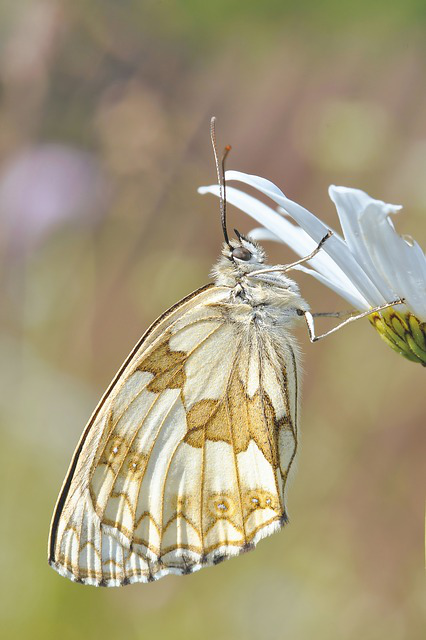

In [15]:
from PIL import Image

Image.open('/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/butterfly/butterfly (1).jpg')

In [16]:
import glob
glob.glob('/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/test/butterfly/*')

[]

# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [17]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!
import torch
import torchvision
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.Resize([64,64]),                                               # 데이터 사이즈 (64,64)
    transforms.ColorJitter(brightness=0.5),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])


transform_test = transforms.Compose([
    transforms.Resize([64,64]),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

(640, 426, 3)


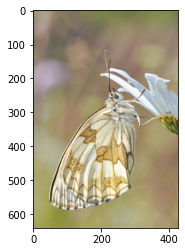

In [19]:
imshow(np.array(Image.open('/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/butterfly/butterfly (1).jpg')))
print(np.array(Image.open('/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/butterfly/butterfly (1).jpg')).shape)

In [20]:
butterfly_img = Image.open('/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train/butterfly/butterfly (1).jpg')
ts_butterfly_img = transform_train(butterfly_img)
ts_butterfly_img

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

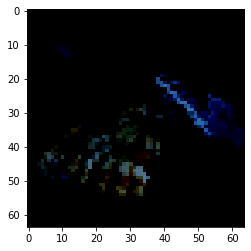

In [21]:
imshow(np.array(ts_butterfly_img).transpose((1,2,0)))

In [22]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언

train_dataset = torchvision.datasets.ImageFolder(
    root = '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train',                      # 불러들인 데이터가 저장되는 디렉터리 위치
    transform = transform_train,    # 적용할 transform function
)

test_dataset = torchvision.datasets.ImageFolder(
    root = '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/test',
    transform = transform_test, 
)

In [23]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 20943
    Root location: /content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/train
    StandardTransform
Transform: Compose(
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=None)
               ColorJitter(brightness=[0.5, 1.5], contrast=None, saturation=None, hue=None)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [24]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 5236
    Root location: /content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10/test
    StandardTransform
Transform: Compose(
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [25]:
test_dataset[0]

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

In [26]:
test_dataset[0][0].shape

torch.Size([3, 64, 64])

In [27]:
# train, test에 대해 DataLoader 정의

trainloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=True,         # train dataloader는 epoch마다 데이터 다시 섞어서 batch 만들고 학습! - 학습 효율 up
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=False,        # test dataloader는 데이터 매번 섞을 이유가 없음 - 어차피 확인 용도
    num_workers=2
)

In [28]:
train_dataset[0][0].shape

torch.Size([3, 64, 64])

In [29]:
import torch.nn as nn

In [30]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding = 1),             # [batch_size,3,64,64] -> [batch_size,16,64,64]
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(in_channels=16, out_channels=32,  kernel_size=3, padding = 1),            # [batch_size,16,64,64] -> [batch_size,32,64,64]
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(0.2), # 0.2 확률로 Dropout
            nn.MaxPool2d(kernel_size=2, stride=2),                                # [batch_size,32,64,64] -> [batch_size,32,32,32]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding = 1), # [batch_size,32,32,32] -> [batch_size,32,32,32] -> padding*2 주의!
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding = 1),            # [batch_size,32,32,32] -> [batch_size,32,32,32]
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2)                                 # [batch_size,32,32,32] -> [batch_size,32,16,16]
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(32*16*16,100),                                                # [batch_size,32*16*16] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,16,5,5] -> [batch_size,16*5*5]
        out = self.fc_layer(out)
        return out

In [31]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
# Device 선언 (GPU 권장)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [33]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기

from torchsummary import summary
test_model = MyModel().to(device) # 모델 객체 선언
summary(test_model, (3,64,64), batch_size=32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 16, 64, 64]             448
              ReLU-2           [32, 16, 64, 64]               0
       BatchNorm2d-3           [32, 16, 64, 64]              32
            Conv2d-4           [32, 32, 64, 64]           4,640
              ReLU-5           [32, 32, 64, 64]               0
       BatchNorm2d-6           [32, 32, 64, 64]              64
           Dropout-7           [32, 32, 64, 64]               0
         MaxPool2d-8           [32, 32, 32, 32]               0
            Conv2d-9           [32, 32, 32, 32]           9,248
             ReLU-10           [32, 32, 32, 32]               0
      BatchNorm2d-11           [32, 32, 32, 32]              64
           Conv2d-12           [32, 32, 32, 32]           9,248
             ReLU-13           [32, 32, 32, 32]               0
      BatchNorm2d-14           [32, 32,

In [34]:
# 모델 객체 선언
mymodel = MyModel().to(device)
mymodel


MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Dropout(p=0.2, inplace=False)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fals

In [35]:
# loss func, optimizer 정의

criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0001) # 보통 Adam의 learning rate로 0.001 사용
                                                                                  # weight_decay = L2 Regularization의 lambda값 (가중치 제한 정도)


In [36]:
with torch.no_grad():
    for i, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        print(inputs.shape)  # batch_size개의 이미지
        print(targets.shape) # batch_size개의 클래스

        outputs = mymodel(inputs)
        print(outputs.shape) # outputs는 32, 10 차원 (32개 data의 확률 10개씩)
        print(targets.shape) # targets는 32차원 (32개 data의 실제 클래스)

        loss = criterion(outputs, targets)  # -> cross entropy 식에 넣을때 이런 형태로 넣으면됨 (outputs, targets의 차원을 맞출 필요가 없음)
        print(loss.item())

        print(outputs.max(1)[1]) # 예측한 클래스
        print(targets) # 실제 클래스
        correct = (outputs.max(1)[1] == targets).sum().item() # 맞게 예측한 클래스 개수
        print(correct)
        break

torch.Size([32, 3, 64, 64])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
2.433511972427368
tensor([7, 7, 2, 7, 7, 7, 7, 1, 4, 7, 1, 2, 2, 2, 7, 2, 7, 2, 7, 8, 2, 7, 4, 2,
        1, 7, 7, 1, 4, 2, 7, 7], device='cuda:0')
tensor([4, 5, 8, 6, 7, 3, 0, 2, 8, 8, 4, 7, 6, 0, 5, 7, 8, 6, 4, 9, 3, 4, 8, 8,
        2, 6, 6, 4, 4, 9, 1, 3], device='cuda:0')
2


In [37]:
# 추후 시각화를 위해 매 epoch마다 loss, accuracy 값을 저장할 리스트
# 이거 빼먹고 train 돌리면...
from tqdm import tqdm

seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [38]:
# train 함수 정의

def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in tqdm(enumerate(trainloader)):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 300 == 299:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 300 batches: {running_loss / 300}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)



In [39]:
# test 함수 정의

def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in tqdm(enumerate(testloader)):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)



In [40]:
# training
num_epoch = 50

for epoch in tqdm(range(0, num_epoch)):
    train(epoch)
    test(epoch)
    torch.save(mymodel.state_dict(), '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0823] CNN/animals10//mymodel.pt')
    print('Model Saved!')

  0%|          | 0/50 [00:00<?, ?it/s]


[ Train epoch: 1 ]



0it [00:00, ?it/s]
1it [00:01,  1.59s/it]
6it [00:01,  4.13it/s]
8it [00:02,  4.81it/s]
10it [00:02,  5.65it/s]
12it [00:02,  6.28it/s]
14it [00:02,  6.79it/s]
16it [00:03,  7.03it/s]
18it [00:03,  7.26it/s]
20it [00:03,  7.58it/s]
22it [00:03,  7.76it/s]
24it [00:04,  8.10it/s]
26it [00:04,  8.46it/s]
27it [00:04,  7.76it/s]
29it [00:04,  8.41it/s]
31it [00:04,  8.44it/s]
33it [00:05,  8.50it/s]
35it [00:05,  8.32it/s]
37it [00:05,  8.32it/s]
38it [00:05,  8.46it/s]
39it [00:05,  8.05it/s]
41it [00:06,  8.14it/s]
42it [00:06,  7.87it/s]
44it [00:06,  7.97it/s]
45it [00:06,  7.51it/s]
46it [00:06,  6.47it/s]
47it [00:07,  6.35it/s]
48it [00:08,  2.09it/s]
50it [00:08,  2.81it/s]
52it [00:09,  3.34it/s]
54it [00:10,  2.90it/s]
56it [00:10,  3.27it/s]
58it [00:10,  4.20it/s]
60it [00:11,  4.40it/s]
62it [00:11,  4.62it/s]
64it [00:11,  4.66it/s]
66it [00:12,  5.21it/s]
67it [00:12,  5.09it/s]
68it [00:12,  4.94it/s]
69it [00:13,  4.23it/s]
71it [00:13,  4.97it/s]
73it [00:14,  4.02it/s]


Current batch: 300
Average train loss of recent 300 batches: 2.026954611539841



301it [00:51,  5.26it/s]
303it [00:51,  5.97it/s]
305it [00:51,  6.65it/s]
307it [00:51,  7.00it/s]
309it [00:52,  5.18it/s]
311it [00:52,  5.85it/s]
313it [00:52,  6.48it/s]
315it [00:53,  7.19it/s]
317it [00:53,  7.18it/s]
319it [00:53,  7.74it/s]
321it [00:53,  8.17it/s]
323it [00:54,  8.56it/s]
325it [00:54,  8.59it/s]
327it [00:54,  6.71it/s]
329it [00:54,  7.15it/s]
331it [00:55,  7.38it/s]
333it [00:55,  7.70it/s]
335it [00:55,  7.82it/s]
337it [00:55,  8.13it/s]
339it [00:56,  7.94it/s]
341it [00:56,  8.15it/s]
343it [00:56,  8.52it/s]
345it [00:57,  5.73it/s]
347it [00:57,  6.38it/s]
349it [00:57,  6.83it/s]
351it [00:57,  7.21it/s]
353it [00:58,  7.47it/s]
355it [00:58,  7.90it/s]
356it [00:58,  6.61it/s]
358it [00:58,  7.16it/s]
360it [00:59,  7.57it/s]
362it [00:59,  7.62it/s]
364it [00:59,  7.83it/s]
366it [00:59,  8.10it/s]
368it [01:00,  8.16it/s]
370it [01:00,  8.03it/s]
372it [01:00,  8.35it/s]
374it [01:00,  8.65it/s]
376it [01:01,  8.70it/s]
378it [01:01,  8.67it/s]


Current batch: 600
Average train loss of recent 300 batches: 1.7386394572257995



601it [01:31,  4.35it/s]
603it [01:31,  5.09it/s]
605it [01:32,  5.67it/s]
607it [01:32,  6.36it/s]
609it [01:32,  6.96it/s]
611it [01:32,  7.59it/s]
613it [01:33,  7.75it/s]
615it [01:33,  8.04it/s]
617it [01:33,  8.22it/s]
619it [01:33,  8.37it/s]
621it [01:33,  8.64it/s]
623it [01:34,  8.79it/s]
625it [01:34,  8.98it/s]
627it [01:34,  9.13it/s]
628it [01:34,  9.07it/s]
629it [01:34,  9.05it/s]
630it [01:34,  8.07it/s]
632it [01:35,  8.15it/s]
634it [01:35,  8.49it/s]
636it [01:35,  8.20it/s]
638it [01:36,  5.29it/s]
640it [01:36,  5.90it/s]
642it [01:36,  6.57it/s]
644it [01:37,  6.94it/s]
646it [01:37,  7.39it/s]
648it [01:37,  7.96it/s]
650it [01:37,  8.24it/s]
652it [01:37,  8.61it/s]
655it [01:38,  6.67it/s]


Total train accuarcy: 34.82786611278232
Total train loss: 1.860551475750581

[ Test epoch: 1 ]




0it [00:00, ?it/s]
1it [00:00,  4.35it/s]
3it [00:00,  7.62it/s]
5it [00:00,  8.36it/s]
7it [00:00,  7.85it/s]
9it [00:01,  7.60it/s]
11it [00:01,  8.40it/s]
13it [00:01,  8.86it/s]
15it [00:01,  9.25it/s]
17it [00:02,  8.37it/s]
19it [00:02,  7.65it/s]
20it [00:04,  2.38it/s]
22it [00:04,  3.23it/s]
24it [00:04,  4.17it/s]
26it [00:04,  5.24it/s]
28it [00:04,  6.03it/s]
30it [00:05,  7.05it/s]
32it [00:05,  7.98it/s]
34it [00:05,  8.67it/s]
36it [00:05,  9.32it/s]
38it [00:05,  9.66it/s]
40it [00:05,  9.93it/s]
42it [00:06, 10.13it/s]
44it [00:06, 10.65it/s]
46it [00:06, 10.88it/s]
48it [00:06, 11.10it/s]
50it [00:06, 10.58it/s]
52it [00:07, 10.94it/s]
54it [00:07, 10.98it/s]
56it [00:07, 11.10it/s]
58it [00:07, 11.21it/s]
60it [00:07, 11.36it/s]
62it [00:07, 10.68it/s]
64it [00:08, 10.99it/s]
66it [00:08, 11.07it/s]
68it [00:08, 11.17it/s]
70it [00:08, 10.79it/s]
72it [00:08, 10.43it/s]
74it [00:09,  9.16it/s]
76it [00:09,  6.63it/s]
78it [00:09,  6.96it/s]
80it [00:10,  7.73it/s]



Test accuarcy: 44.06035141329259
Test average loss: 1.6714249362305897
Model Saved!

[ Train epoch: 2 ]



0it [00:00, ?it/s]
1it [00:00,  4.44it/s]
3it [00:00,  7.01it/s]
5it [00:00,  7.49it/s]
7it [00:00,  7.82it/s]
9it [00:01,  8.41it/s]
11it [00:01,  8.33it/s]
13it [00:01,  8.07it/s]
15it [00:01,  8.69it/s]
17it [00:02,  8.85it/s]
19it [00:02,  8.96it/s]
21it [00:02,  8.66it/s]
23it [00:02,  8.87it/s]
24it [00:03,  6.53it/s]
26it [00:03,  7.23it/s]
28it [00:03,  7.57it/s]
30it [00:04,  6.00it/s]
32it [00:04,  6.77it/s]
34it [00:04,  7.14it/s]
36it [00:04,  7.48it/s]
38it [00:04,  7.87it/s]
40it [00:05,  8.27it/s]
42it [00:05,  8.66it/s]
44it [00:05,  8.28it/s]
46it [00:05,  7.87it/s]
48it [00:06,  8.28it/s]
50it [00:06,  8.40it/s]
52it [00:06,  8.61it/s]
54it [00:06,  8.47it/s]
56it [00:07,  8.70it/s]
58it [00:07,  8.62it/s]
60it [00:07,  8.58it/s]
62it [00:07,  8.57it/s]
64it [00:07,  8.65it/s]
66it [00:08,  8.58it/s]
68it [00:08,  8.85it/s]
70it [00:08,  8.68it/s]
72it [00:08,  8.91it/s]
74it [00:09,  8.98it/s]
76it [00:09,  9.27it/s]
78it [00:09,  8.56it/s]
80it [00:09,  8.55it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 1.5263920907179516



303it [00:40,  7.31it/s]
305it [00:41,  7.66it/s]
307it [00:41,  7.80it/s]
309it [00:41,  8.34it/s]
311it [00:41,  8.53it/s]
313it [00:42,  8.39it/s]
315it [00:42,  8.82it/s]
317it [00:42,  8.68it/s]
319it [00:42,  8.56it/s]
321it [00:42,  8.72it/s]
323it [00:43,  8.49it/s]
325it [00:43,  8.31it/s]
327it [00:43,  8.49it/s]
329it [00:43,  8.41it/s]
331it [00:44,  8.42it/s]
333it [00:44,  7.98it/s]
335it [00:44,  8.28it/s]
337it [00:44,  8.39it/s]
339it [00:45,  8.28it/s]
341it [00:45,  4.83it/s]
343it [00:46,  5.21it/s]
345it [00:46,  4.58it/s]
347it [00:46,  5.40it/s]
349it [00:47,  6.09it/s]
351it [00:47,  6.51it/s]
353it [00:47,  7.07it/s]
355it [00:47,  7.49it/s]
357it [00:48,  7.40it/s]
359it [00:48,  7.39it/s]
361it [00:48,  8.06it/s]
362it [00:48,  7.25it/s]
364it [00:49,  7.83it/s]
366it [00:49,  8.09it/s]
367it [00:49,  8.05it/s]
368it [00:49,  7.36it/s]
369it [00:49,  7.47it/s]
370it [00:49,  7.18it/s]
372it [00:50,  7.62it/s]
374it [00:50,  7.80it/s]
376it [00:50,  7.75it/s]


Current batch: 600
Average train loss of recent 300 batches: 1.4569606898228327



601it [01:21,  8.15it/s]
603it [01:21,  7.89it/s]
605it [01:22,  8.10it/s]
607it [01:22,  8.21it/s]
609it [01:22,  8.41it/s]
611it [01:22,  8.70it/s]
612it [01:23,  5.29it/s]
614it [01:23,  5.97it/s]
616it [01:23,  6.42it/s]
618it [01:24,  6.96it/s]
620it [01:24,  7.29it/s]
622it [01:24,  7.55it/s]
624it [01:24,  7.67it/s]
626it [01:25,  7.66it/s]
628it [01:25,  7.56it/s]
630it [01:25,  7.66it/s]
632it [01:25,  7.96it/s]
634it [01:26,  8.02it/s]
636it [01:26,  8.11it/s]
638it [01:26,  8.05it/s]
640it [01:26,  8.08it/s]
642it [01:27,  6.76it/s]
644it [01:27,  7.21it/s]
646it [01:27,  7.66it/s]
648it [01:27,  7.94it/s]
650it [01:28,  7.93it/s]
652it [01:28,  8.36it/s]
655it [01:28,  7.39it/s]


Total train accuarcy: 48.91371818746121
Total train loss: 1.4853283185995263

[ Test epoch: 2 ]




0it [00:00, ?it/s]
1it [00:00,  4.20it/s]
3it [00:00,  7.41it/s]
5it [00:00,  8.07it/s]
7it [00:00,  7.65it/s]
9it [00:01,  7.46it/s]
11it [00:01,  7.87it/s]
13it [00:01,  8.38it/s]
15it [00:01,  9.02it/s]
17it [00:02,  8.05it/s]
19it [00:02,  7.54it/s]
20it [00:04,  2.46it/s]
22it [00:04,  3.31it/s]
24it [00:04,  4.29it/s]
26it [00:04,  5.27it/s]
28it [00:04,  6.20it/s]
30it [00:05,  7.13it/s]
32it [00:05,  7.79it/s]
34it [00:05,  8.25it/s]
36it [00:05,  8.82it/s]
38it [00:05,  9.27it/s]
40it [00:06,  9.55it/s]
42it [00:06,  9.71it/s]
44it [00:06,  9.84it/s]
46it [00:06, 10.11it/s]
48it [00:06,  9.72it/s]
50it [00:07, 10.11it/s]
52it [00:07, 10.17it/s]
54it [00:07, 10.34it/s]
56it [00:07, 11.00it/s]
58it [00:07, 10.88it/s]
60it [00:07, 10.77it/s]
62it [00:08, 10.70it/s]
64it [00:08, 10.83it/s]
66it [00:08, 10.94it/s]
68it [00:08, 10.99it/s]
70it [00:08, 10.53it/s]
72it [00:09, 10.60it/s]
74it [00:09, 10.46it/s]
76it [00:09, 10.81it/s]
78it [00:09, 10.66it/s]
80it [00:09, 10.39it/s]



Test accuarcy: 47.173414820473646
Test average loss: 1.6494012304195544
Model Saved!

[ Train epoch: 3 ]



0it [00:00, ?it/s]
1it [00:00,  4.71it/s]
3it [00:00,  6.96it/s]
5it [00:01,  3.88it/s]
7it [00:01,  4.97it/s]
9it [00:01,  6.07it/s]
11it [00:01,  6.85it/s]
13it [00:02,  7.17it/s]
15it [00:02,  7.48it/s]
17it [00:02,  7.93it/s]
19it [00:02,  8.22it/s]
21it [00:02,  8.83it/s]
23it [00:03,  6.17it/s]
25it [00:03,  6.61it/s]
27it [00:04,  7.10it/s]
29it [00:04,  7.90it/s]
31it [00:04,  8.25it/s]
32it [00:04,  5.13it/s]
34it [00:05,  6.02it/s]
36it [00:05,  6.64it/s]
38it [00:05,  7.48it/s]
40it [00:05,  8.00it/s]
42it [00:06,  8.27it/s]
44it [00:06,  8.43it/s]
46it [00:06,  8.54it/s]
48it [00:06,  8.22it/s]
50it [00:07,  8.34it/s]
52it [00:07,  8.14it/s]
54it [00:07,  7.98it/s]
56it [00:07,  8.39it/s]
58it [00:07,  8.50it/s]
60it [00:08,  8.28it/s]
62it [00:08,  8.54it/s]
64it [00:08,  8.37it/s]
66it [00:08,  8.65it/s]
68it [00:09,  8.65it/s]
70it [00:09,  8.49it/s]
72it [00:09,  8.38it/s]
74it [00:09,  8.45it/s]
76it [00:10,  8.79it/s]
78it [00:10,  8.59it/s]
80it [00:10,  8.53it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 1.3116805118322372



301it [00:39,  7.96it/s]
303it [00:39,  7.87it/s]
305it [00:40,  7.99it/s]
307it [00:40,  8.07it/s]
309it [00:40,  8.12it/s]
311it [00:40,  8.41it/s]
313it [00:41,  8.23it/s]
315it [00:41,  8.52it/s]
317it [00:41,  8.36it/s]
319it [00:41,  8.20it/s]
321it [00:42,  8.26it/s]
323it [00:42,  7.91it/s]
325it [00:42,  7.69it/s]
327it [00:42,  7.73it/s]
329it [00:43,  7.72it/s]
331it [00:43,  7.95it/s]
333it [00:43,  7.83it/s]
335it [00:43,  8.02it/s]
337it [00:44,  7.76it/s]
339it [00:44,  6.17it/s]
341it [00:44,  6.71it/s]
343it [00:45,  7.15it/s]
345it [00:45,  7.56it/s]
347it [00:45,  7.34it/s]
349it [00:45,  7.62it/s]
351it [00:46,  7.93it/s]
353it [00:46,  7.89it/s]
355it [00:46,  8.09it/s]
357it [00:46,  8.24it/s]
359it [00:47,  8.13it/s]
361it [00:47,  8.14it/s]
363it [00:47,  8.14it/s]
365it [00:47,  8.20it/s]
367it [00:48,  8.03it/s]
369it [00:48,  7.96it/s]
371it [00:48,  8.09it/s]
373it [00:48,  7.99it/s]
375it [00:48,  8.16it/s]
377it [00:49,  8.20it/s]
379it [00:49,  8.18it/s]


Current batch: 600
Average train loss of recent 300 batches: 1.2884659639994303



602it [01:22,  8.87it/s]
603it [01:22,  9.04it/s]
604it [01:22,  8.19it/s]
605it [01:22,  8.51it/s]
606it [01:22,  7.72it/s]
608it [01:23,  8.15it/s]
610it [01:23,  8.45it/s]
611it [01:23,  7.68it/s]
613it [01:23,  7.93it/s]
614it [01:23,  6.14it/s]
616it [01:24,  6.73it/s]
618it [01:24,  7.07it/s]
620it [01:24,  7.44it/s]
622it [01:24,  7.74it/s]
624it [01:25,  7.82it/s]
626it [01:25,  7.84it/s]
628it [01:25,  7.94it/s]
630it [01:25,  8.16it/s]
632it [01:26,  8.31it/s]
634it [01:26,  8.78it/s]
636it [01:26,  8.42it/s]
638it [01:26,  8.60it/s]
640it [01:27,  8.38it/s]
642it [01:27,  8.49it/s]
644it [01:27,  8.35it/s]
646it [01:27,  8.28it/s]
648it [01:28,  8.25it/s]
650it [01:28,  8.13it/s]
652it [01:28,  8.10it/s]
655it [01:29,  7.35it/s]


Total train accuarcy: 55.412309602253735
Total train loss: 1.2963754724000247

[ Test epoch: 3 ]




0it [00:00, ?it/s]
1it [00:00,  4.25it/s]
3it [00:00,  7.29it/s]
5it [00:00,  8.22it/s]
7it [00:00,  7.93it/s]
9it [00:01,  7.75it/s]
11it [00:01,  8.54it/s]
13it [00:01,  8.78it/s]
15it [00:01,  9.28it/s]
17it [00:02,  8.38it/s]
19it [00:02,  7.81it/s]
20it [00:04,  2.39it/s]
22it [00:04,  3.23it/s]
24it [00:04,  4.14it/s]
26it [00:04,  5.10it/s]
28it [00:04,  6.08it/s]
30it [00:05,  6.90it/s]
32it [00:05,  7.63it/s]
34it [00:05,  7.99it/s]
36it [00:05,  8.76it/s]
38it [00:05,  9.50it/s]
40it [00:06,  9.69it/s]
42it [00:06,  9.94it/s]
44it [00:06, 10.04it/s]
46it [00:06, 10.44it/s]
48it [00:06, 10.75it/s]
50it [00:06, 10.54it/s]
52it [00:07, 10.71it/s]
54it [00:07, 10.95it/s]
56it [00:07, 10.67it/s]
58it [00:07, 10.60it/s]
60it [00:07, 10.70it/s]
62it [00:08, 10.55it/s]
64it [00:08, 10.76it/s]
66it [00:08, 10.56it/s]
68it [00:08, 10.62it/s]
70it [00:08, 10.52it/s]
72it [00:09, 10.55it/s]
74it [00:09, 10.68it/s]
76it [00:09, 10.81it/s]
78it [00:09, 10.76it/s]
80it [00:09, 10.40it/s]



Test accuarcy: 53.7624140565317
Test average loss: 1.4176075574828357
Model Saved!

[ Train epoch: 4 ]



0it [00:00, ?it/s]
1it [00:00,  4.27it/s]
3it [00:00,  7.44it/s]
5it [00:00,  8.77it/s]
7it [00:00,  8.95it/s]
8it [00:01,  4.98it/s]
10it [00:01,  6.33it/s]
12it [00:01,  6.69it/s]
14it [00:02,  7.29it/s]
16it [00:02,  7.69it/s]
18it [00:02,  8.30it/s]
20it [00:02,  8.39it/s]
22it [00:02,  8.60it/s]
24it [00:03,  8.51it/s]
26it [00:03,  8.54it/s]
28it [00:03,  8.80it/s]
30it [00:03,  9.12it/s]
32it [00:04,  8.96it/s]
33it [00:04,  7.33it/s]
35it [00:04,  8.07it/s]
37it [00:04,  8.22it/s]
39it [00:04,  8.52it/s]
41it [00:05,  8.76it/s]
43it [00:05,  5.93it/s]
45it [00:05,  6.68it/s]
47it [00:06,  7.29it/s]
49it [00:06,  4.55it/s]
51it [00:07,  5.29it/s]
53it [00:07,  5.91it/s]
55it [00:07,  6.57it/s]
57it [00:07,  7.02it/s]
59it [00:08,  7.38it/s]
60it [00:08,  5.28it/s]
62it [00:08,  6.23it/s]
64it [00:09,  6.98it/s]
66it [00:09,  7.34it/s]
68it [00:09,  7.48it/s]
70it [00:09,  7.82it/s]
72it [00:09,  8.08it/s]
74it [00:10,  8.11it/s]
76it [00:10,  8.00it/s]
78it [00:10,  8.39it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 1.223815099398295



301it [00:41,  7.64it/s]
303it [00:41,  7.87it/s]
305it [00:41,  7.98it/s]
307it [00:42,  5.45it/s]
309it [00:42,  5.96it/s]
311it [00:42,  6.45it/s]
313it [00:42,  7.07it/s]
315it [00:43,  7.34it/s]
317it [00:43,  7.56it/s]
319it [00:43,  7.71it/s]
321it [00:43,  7.80it/s]
323it [00:44,  7.75it/s]
325it [00:44,  5.67it/s]
327it [00:45,  6.24it/s]
329it [00:45,  5.08it/s]
331it [00:45,  5.65it/s]
333it [00:46,  6.28it/s]
335it [00:46,  6.82it/s]
337it [00:46,  7.24it/s]
339it [00:46,  7.38it/s]
341it [00:47,  7.39it/s]
343it [00:47,  7.51it/s]
345it [00:47,  7.75it/s]
347it [00:47,  7.67it/s]
349it [00:48,  8.09it/s]
351it [00:48,  7.93it/s]
353it [00:48,  7.87it/s]
355it [00:48,  8.02it/s]
357it [00:49,  8.12it/s]
359it [00:49,  8.08it/s]
361it [00:49,  8.21it/s]
363it [00:49,  8.19it/s]
365it [00:50,  7.05it/s]
367it [00:50,  7.24it/s]
369it [00:50,  7.67it/s]
371it [00:50,  7.76it/s]
373it [00:51,  7.96it/s]
375it [00:51,  8.26it/s]
377it [00:51,  8.34it/s]
379it [00:51,  8.11it/s]


Current batch: 600
Average train loss of recent 300 batches: 1.163532863855362



602it [01:23,  7.28it/s]
604it [01:23,  7.41it/s]
606it [01:23,  7.83it/s]
608it [01:23,  7.97it/s]
610it [01:24,  8.15it/s]
612it [01:24,  8.38it/s]
614it [01:24,  8.18it/s]
616it [01:24,  8.29it/s]
618it [01:25,  8.27it/s]
620it [01:25,  6.59it/s]
622it [01:25,  7.34it/s]
624it [01:26,  7.46it/s]
626it [01:26,  7.46it/s]
628it [01:26,  7.64it/s]
630it [01:26,  7.69it/s]
632it [01:27,  7.59it/s]
634it [01:27,  7.67it/s]
636it [01:27,  7.94it/s]
637it [01:27,  5.58it/s]
639it [01:28,  6.32it/s]
641it [01:28,  6.65it/s]
643it [01:28,  7.35it/s]
645it [01:28,  7.34it/s]
647it [01:29,  7.52it/s]
649it [01:29,  7.84it/s]
651it [01:29,  8.05it/s]
655it [01:30,  7.27it/s]


Total train accuarcy: 59.68581387575801
Total train loss: 1.1909072566578407

[ Test epoch: 4 ]




0it [00:00, ?it/s]
1it [00:00,  4.38it/s]
3it [00:00,  7.51it/s]
5it [00:00,  8.26it/s]
7it [00:00,  7.78it/s]
9it [00:01,  7.58it/s]
11it [00:01,  8.51it/s]
13it [00:01,  8.87it/s]
15it [00:01,  9.41it/s]
17it [00:02,  7.81it/s]
19it [00:02,  7.35it/s]
20it [00:04,  2.39it/s]
22it [00:04,  3.22it/s]
24it [00:04,  4.17it/s]
26it [00:04,  5.23it/s]
28it [00:04,  6.17it/s]
30it [00:05,  6.93it/s]
32it [00:05,  7.76it/s]
34it [00:05,  7.89it/s]
36it [00:05,  8.61it/s]
38it [00:05,  9.21it/s]
40it [00:06,  9.58it/s]
42it [00:06,  9.55it/s]
44it [00:06, 10.02it/s]
46it [00:06, 10.49it/s]
48it [00:06, 10.51it/s]
50it [00:07, 10.39it/s]
52it [00:07, 10.15it/s]
54it [00:07, 10.54it/s]
56it [00:07, 10.51it/s]
58it [00:07, 10.60it/s]
60it [00:07, 10.61it/s]
62it [00:08, 10.46it/s]
64it [00:08, 10.65it/s]
66it [00:08, 11.23it/s]
68it [00:08, 11.07it/s]
70it [00:08, 10.88it/s]
72it [00:09, 11.10it/s]
74it [00:09, 10.54it/s]
76it [00:09, 10.50it/s]
78it [00:09, 10.63it/s]
80it [00:09, 10.74it/s]



Test accuarcy: 55.65317035905271
Test average loss: 1.4364769251608267
Model Saved!

[ Train epoch: 5 ]



0it [00:00, ?it/s]
1it [00:00,  3.93it/s]
2it [00:00,  3.06it/s]
4it [00:00,  5.25it/s]
6it [00:01,  6.63it/s]
8it [00:01,  7.34it/s]
10it [00:01,  8.05it/s]
12it [00:01,  8.13it/s]
14it [00:01,  8.31it/s]
16it [00:02,  8.29it/s]
18it [00:02,  8.77it/s]
20it [00:02,  8.42it/s]
22it [00:02,  8.51it/s]
24it [00:03,  8.62it/s]
26it [00:03,  8.75it/s]
28it [00:03,  8.26it/s]
30it [00:03,  8.55it/s]
32it [00:04,  8.73it/s]
34it [00:04,  8.88it/s]
36it [00:04,  8.81it/s]
38it [00:04,  8.66it/s]
40it [00:04,  8.67it/s]
41it [00:05,  7.48it/s]
43it [00:05,  7.74it/s]
45it [00:05,  8.12it/s]
47it [00:05,  8.17it/s]
49it [00:06,  8.43it/s]
51it [00:06,  8.49it/s]
53it [00:06,  8.61it/s]
55it [00:06,  8.95it/s]
57it [00:07,  8.85it/s]
59it [00:07,  8.94it/s]
61it [00:07,  8.74it/s]
63it [00:07,  8.72it/s]
65it [00:07,  8.50it/s]
67it [00:08,  8.35it/s]
69it [00:08,  8.55it/s]
71it [00:08,  8.71it/s]
73it [00:08,  8.38it/s]
75it [00:09,  8.51it/s]
77it [00:09,  8.78it/s]
79it [00:09,  8.98it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 1.1227816144625347



302it [00:38,  8.24it/s]
304it [00:38,  5.90it/s]
306it [00:39,  4.23it/s]
308it [00:39,  4.96it/s]
310it [00:40,  5.50it/s]
312it [00:40,  6.07it/s]
314it [00:40,  6.59it/s]
316it [00:40,  7.01it/s]
318it [00:41,  7.28it/s]
320it [00:41,  7.71it/s]
322it [00:41,  8.10it/s]
324it [00:41,  8.04it/s]
326it [00:42,  8.16it/s]
328it [00:42,  8.33it/s]
330it [00:42,  8.40it/s]
332it [00:42,  8.26it/s]
334it [00:42,  8.29it/s]
336it [00:43,  8.28it/s]
338it [00:43,  5.64it/s]
340it [00:44,  6.47it/s]
342it [00:44,  6.93it/s]
344it [00:44,  7.37it/s]
346it [00:44,  7.76it/s]
348it [00:44,  8.02it/s]
350it [00:45,  5.98it/s]
352it [00:45,  6.75it/s]
354it [00:45,  7.10it/s]
356it [00:46,  7.67it/s]
358it [00:46,  7.99it/s]
360it [00:46,  7.94it/s]
362it [00:46,  8.30it/s]
364it [00:47,  8.13it/s]
366it [00:47,  8.13it/s]
368it [00:48,  5.23it/s]
370it [00:48,  6.03it/s]
372it [00:48,  6.75it/s]
374it [00:48,  7.36it/s]
376it [00:48,  7.58it/s]
378it [00:49,  7.83it/s]
380it [00:49,  7.78it/s]


Current batch: 600
Average train loss of recent 300 batches: 1.087078269124031



602it [01:19,  8.34it/s]
604it [01:19,  9.09it/s]
605it [01:20,  6.52it/s]
606it [01:20,  4.71it/s]
608it [01:20,  5.71it/s]
610it [01:21,  6.72it/s]
612it [01:21,  7.51it/s]
614it [01:21,  7.89it/s]
616it [01:21,  8.06it/s]
618it [01:21,  8.40it/s]
620it [01:22,  8.43it/s]
622it [01:22,  8.25it/s]
624it [01:22,  8.67it/s]
626it [01:22,  8.67it/s]
628it [01:23,  8.35it/s]
630it [01:23,  8.55it/s]
632it [01:23,  8.24it/s]
634it [01:23,  8.14it/s]
636it [01:24,  8.05it/s]
638it [01:24,  8.43it/s]
640it [01:24,  7.88it/s]
642it [01:24,  8.56it/s]
644it [01:25,  8.19it/s]
646it [01:25,  8.26it/s]
648it [01:25,  8.64it/s]
650it [01:25,  8.63it/s]
652it [01:25,  8.96it/s]
655it [01:26,  7.60it/s]


Total train accuarcy: 62.1496442725493
Total train loss: 1.1066667268294414

[ Test epoch: 5 ]




0it [00:00, ?it/s]
1it [00:00,  4.43it/s]
3it [00:00,  7.57it/s]
5it [00:00,  8.41it/s]
7it [00:00,  8.01it/s]
9it [00:01,  7.64it/s]
11it [00:01,  8.46it/s]
13it [00:01,  8.73it/s]
15it [00:01,  9.25it/s]
17it [00:02,  8.26it/s]
19it [00:02,  7.65it/s]
20it [00:04,  2.40it/s]
22it [00:04,  3.23it/s]
24it [00:04,  4.21it/s]
26it [00:04,  5.26it/s]
28it [00:04,  6.33it/s]
30it [00:05,  7.27it/s]
32it [00:05,  8.24it/s]
34it [00:05,  8.78it/s]
36it [00:05,  8.97it/s]
38it [00:05,  9.55it/s]
40it [00:05,  9.76it/s]
42it [00:06,  9.92it/s]
44it [00:06,  9.95it/s]
46it [00:06, 10.35it/s]
48it [00:06, 10.53it/s]
50it [00:06, 10.76it/s]
52it [00:07, 10.75it/s]
54it [00:07, 10.62it/s]
56it [00:07, 10.43it/s]
58it [00:07, 10.63it/s]
60it [00:07, 10.33it/s]
62it [00:08, 10.28it/s]
64it [00:08, 10.56it/s]
66it [00:08, 10.65it/s]
68it [00:08, 10.77it/s]
70it [00:08, 10.65it/s]
72it [00:08, 10.75it/s]
74it [00:09, 10.73it/s]
76it [00:09, 10.67it/s]
78it [00:09, 10.56it/s]
80it [00:09, 11.00it/s]



Test accuarcy: 59.6829640947288
Test average loss: 1.2921683442120144
Model Saved!

[ Train epoch: 6 ]



0it [00:00, ?it/s]
1it [00:00,  5.02it/s]
3it [00:00,  7.47it/s]
5it [00:00,  8.29it/s]
7it [00:00,  8.69it/s]
8it [00:01,  5.39it/s]
10it [00:01,  6.24it/s]
12it [00:01,  6.99it/s]
14it [00:01,  7.62it/s]
16it [00:02,  7.84it/s]
18it [00:02,  8.29it/s]
20it [00:02,  8.56it/s]
22it [00:02,  8.50it/s]
24it [00:03,  8.46it/s]
26it [00:03,  8.70it/s]
28it [00:03,  8.68it/s]
30it [00:03,  8.80it/s]
32it [00:03,  9.21it/s]
34it [00:04,  8.82it/s]
36it [00:04,  9.20it/s]
38it [00:04,  9.27it/s]
40it [00:04,  8.73it/s]
42it [00:05,  8.38it/s]
44it [00:05,  8.48it/s]
45it [00:05,  7.60it/s]
47it [00:05,  7.76it/s]
49it [00:06,  7.96it/s]
51it [00:06,  8.15it/s]
53it [00:06,  8.23it/s]
55it [00:06,  8.44it/s]
57it [00:07,  8.01it/s]
59it [00:07,  8.57it/s]
61it [00:07,  8.37it/s]
63it [00:07,  8.63it/s]
65it [00:07,  8.62it/s]
66it [00:08,  5.80it/s]
68it [00:08,  6.58it/s]
70it [00:08,  7.19it/s]
72it [00:09,  7.44it/s]
74it [00:09,  7.63it/s]
76it [00:09,  7.68it/s]
78it [00:09,  7.87it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 1.0569882121682168



302it [00:39,  8.41it/s]
304it [00:40,  8.17it/s]
306it [00:40,  7.99it/s]
308it [00:40,  8.20it/s]
310it [00:40,  8.18it/s]
312it [00:41,  8.12it/s]
314it [00:41,  8.20it/s]
316it [00:41,  8.26it/s]
318it [00:41,  8.35it/s]
320it [00:42,  7.92it/s]
322it [00:42,  8.09it/s]
324it [00:42,  8.19it/s]
326it [00:42,  8.47it/s]
328it [00:43,  8.16it/s]
330it [00:43,  8.50it/s]
332it [00:43,  8.09it/s]
334it [00:43,  8.18it/s]
336it [00:44,  5.20it/s]
338it [00:44,  5.99it/s]
340it [00:44,  6.39it/s]
342it [00:45,  7.03it/s]
344it [00:45,  7.56it/s]
346it [00:45,  7.90it/s]
348it [00:45,  8.04it/s]
350it [00:46,  8.15it/s]
352it [00:46,  8.21it/s]
354it [00:46,  8.32it/s]
356it [00:46,  8.15it/s]
358it [00:47,  5.29it/s]
360it [00:47,  5.12it/s]
362it [00:48,  5.78it/s]
364it [00:48,  6.45it/s]
366it [00:48,  6.94it/s]
368it [00:48,  7.41it/s]
370it [00:49,  7.69it/s]
372it [00:49,  7.46it/s]
374it [00:49,  7.75it/s]
376it [00:50,  6.12it/s]
378it [00:50,  6.73it/s]
380it [00:50,  7.26it/s]


Current batch: 600
Average train loss of recent 300 batches: 1.0431962291399637



601it [01:18,  7.36it/s]
602it [01:19,  4.33it/s]
604it [01:19,  5.22it/s]
606it [01:19,  6.03it/s]
608it [01:20,  6.48it/s]
610it [01:20,  7.04it/s]
612it [01:20,  7.50it/s]
614it [01:20,  7.68it/s]
616it [01:21,  5.36it/s]
618it [01:21,  6.07it/s]
620it [01:21,  6.56it/s]
622it [01:22,  7.09it/s]
623it [01:22,  4.78it/s]
625it [01:22,  5.68it/s]
627it [01:23,  6.26it/s]
629it [01:23,  6.70it/s]
631it [01:23,  7.18it/s]
633it [01:23,  7.83it/s]
635it [01:24,  8.08it/s]
636it [01:24,  5.47it/s]
638it [01:24,  6.27it/s]
640it [01:25,  6.82it/s]
642it [01:25,  7.41it/s]
643it [01:25,  5.45it/s]
645it [01:25,  6.30it/s]
647it [01:26,  6.79it/s]
649it [01:26,  7.50it/s]
651it [01:26,  7.63it/s]
653it [01:26,  7.94it/s]
655it [01:27,  7.52it/s]


Total train accuarcy: 64.19806140476531
Total train loss: 1.0501479669836642

[ Test epoch: 6 ]




0it [00:00, ?it/s]
1it [00:00,  4.22it/s]
3it [00:00,  7.25it/s]
5it [00:00,  8.18it/s]
7it [00:00,  7.68it/s]
9it [00:01,  7.50it/s]
11it [00:01,  8.11it/s]
13it [00:01,  8.34it/s]
15it [00:01,  9.12it/s]
17it [00:02,  7.98it/s]
19it [00:02,  7.25it/s]
20it [00:04,  2.44it/s]
22it [00:04,  3.24it/s]
24it [00:04,  4.16it/s]
26it [00:04,  5.20it/s]
28it [00:04,  6.20it/s]
30it [00:05,  7.17it/s]
32it [00:05,  8.05it/s]
34it [00:05,  8.66it/s]
36it [00:05,  9.30it/s]
38it [00:05,  9.61it/s]
40it [00:06,  9.95it/s]
42it [00:06,  9.65it/s]
44it [00:06, 10.06it/s]
46it [00:06, 10.20it/s]
48it [00:06, 10.27it/s]
50it [00:06, 10.56it/s]
52it [00:07, 10.61it/s]
54it [00:07, 10.83it/s]
56it [00:07, 10.54it/s]
58it [00:07, 10.71it/s]
60it [00:07, 10.74it/s]
62it [00:08, 10.30it/s]
64it [00:08, 10.47it/s]
66it [00:08, 10.33it/s]
68it [00:08, 10.35it/s]
70it [00:08, 10.16it/s]
72it [00:09, 10.24it/s]
74it [00:09, 10.33it/s]
76it [00:09, 10.12it/s]
78it [00:09, 10.10it/s]
80it [00:09, 10.19it/s]



Test accuarcy: 59.56837280366692
Test average loss: 1.3944578833151153
Model Saved!

[ Train epoch: 7 ]



0it [00:00, ?it/s]
1it [00:00,  4.03it/s]
3it [00:00,  7.73it/s]
5it [00:01,  3.82it/s]
7it [00:01,  5.02it/s]
9it [00:01,  5.99it/s]
11it [00:01,  6.75it/s]
13it [00:02,  7.17it/s]
15it [00:02,  7.87it/s]
17it [00:02,  8.22it/s]
19it [00:02,  8.10it/s]
21it [00:02,  8.71it/s]
23it [00:03,  8.17it/s]
25it [00:03,  8.35it/s]
27it [00:03,  7.33it/s]
29it [00:04,  7.69it/s]
31it [00:04,  8.04it/s]
33it [00:04,  8.16it/s]
35it [00:04,  8.41it/s]
37it [00:04,  8.72it/s]
38it [00:05,  5.54it/s]
40it [00:06,  4.02it/s]
42it [00:06,  4.90it/s]
44it [00:06,  5.71it/s]
46it [00:06,  6.35it/s]
48it [00:07,  6.80it/s]
50it [00:07,  7.24it/s]
52it [00:07,  7.77it/s]
54it [00:07,  8.17it/s]
56it [00:08,  8.51it/s]
57it [00:08,  8.26it/s]
58it [00:08,  7.82it/s]
59it [00:08,  5.19it/s]
61it [00:08,  6.31it/s]
63it [00:09,  7.29it/s]
64it [00:09,  5.12it/s]
66it [00:09,  6.22it/s]
68it [00:10,  6.88it/s]
70it [00:10,  7.29it/s]
72it [00:10,  7.79it/s]
74it [00:10,  8.17it/s]
76it [00:11,  5.86it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 1.0009561545650165



302it [00:42,  7.41it/s]
304it [00:43,  7.58it/s]
306it [00:43,  7.55it/s]
308it [00:43,  7.39it/s]
310it [00:43,  7.63it/s]
312it [00:44,  8.01it/s]
314it [00:44,  8.17it/s]
316it [00:44,  8.28it/s]
318it [00:44,  8.16it/s]
320it [00:44,  8.78it/s]
322it [00:45,  8.67it/s]
323it [00:45,  8.56it/s]
324it [00:45,  8.51it/s]
325it [00:45,  8.16it/s]
327it [00:45,  7.89it/s]
329it [00:46,  5.01it/s]
331it [00:46,  5.91it/s]
333it [00:46,  6.50it/s]
335it [00:47,  6.76it/s]
337it [00:47,  7.35it/s]
339it [00:47,  7.38it/s]
341it [00:47,  7.73it/s]
343it [00:48,  7.63it/s]
345it [00:48,  7.92it/s]
347it [00:48,  8.38it/s]
349it [00:48,  8.29it/s]
351it [00:49,  8.40it/s]
353it [00:49,  8.14it/s]
355it [00:49,  8.19it/s]
357it [00:49,  8.16it/s]
359it [00:50,  7.91it/s]
361it [00:50,  7.87it/s]
363it [00:50,  7.87it/s]
365it [00:50,  7.84it/s]
367it [00:51,  7.94it/s]
369it [00:51,  7.86it/s]
371it [00:51,  7.89it/s]
373it [00:51,  7.92it/s]
375it [00:52,  7.94it/s]
377it [00:52,  8.07it/s]


Current batch: 600
Average train loss of recent 300 batches: 1.0070262304941813


601it [01:22,  6.74it/s]
603it [01:23,  7.14it/s]
605it [01:23,  7.54it/s]
607it [01:23,  7.85it/s]
609it [01:23,  8.18it/s]
611it [01:24,  8.08it/s]
613it [01:24,  8.27it/s]
615it [01:24,  8.45it/s]
617it [01:24,  8.60it/s]
619it [01:24,  8.78it/s]
621it [01:25,  8.54it/s]
623it [01:25,  8.65it/s]
625it [01:25,  8.65it/s]
627it [01:25,  8.91it/s]
629it [01:26,  8.84it/s]
630it [01:26,  6.37it/s]
632it [01:26,  7.04it/s]
634it [01:26,  7.78it/s]
636it [01:27,  5.78it/s]
638it [01:27,  6.59it/s]
640it [01:27,  7.58it/s]
641it [01:28,  5.34it/s]
643it [01:28,  6.43it/s]
645it [01:28,  7.08it/s]
647it [01:28,  7.42it/s]
649it [01:29,  7.62it/s]
651it [01:29,  8.01it/s]
655it [01:29,  7.31it/s]


Total train accuarcy: 66.15575609989018
Total train loss: 1.0021650131877142

[ Test epoch: 7 ]




0it [00:00, ?it/s]
1it [00:00,  4.30it/s]
3it [00:00,  7.36it/s]
5it [00:00,  8.45it/s]
7it [00:00,  7.80it/s]
9it [00:01,  7.69it/s]
11it [00:01,  8.42it/s]
13it [00:01,  8.85it/s]
15it [00:01,  9.41it/s]
16it [00:01,  9.50it/s]
17it [00:02,  7.88it/s]
19it [00:02,  7.11it/s]
20it [00:04,  2.13it/s]
22it [00:04,  2.99it/s]
24it [00:04,  3.97it/s]
26it [00:04,  5.00it/s]
28it [00:04,  5.70it/s]
30it [00:05,  6.66it/s]
32it [00:05,  7.32it/s]
34it [00:05,  7.87it/s]
36it [00:05,  8.45it/s]
38it [00:05,  9.00it/s]
40it [00:06,  9.24it/s]
42it [00:06,  9.54it/s]
44it [00:06,  9.71it/s]
46it [00:06, 10.06it/s]
48it [00:06, 10.31it/s]
50it [00:07, 10.58it/s]
52it [00:07, 10.65it/s]
54it [00:07, 10.46it/s]
56it [00:07, 10.16it/s]
58it [00:07, 10.28it/s]
60it [00:08, 10.46it/s]
62it [00:08, 10.35it/s]
64it [00:08, 10.68it/s]
66it [00:08, 10.65it/s]
68it [00:08, 10.49it/s]
70it [00:09, 10.26it/s]
72it [00:09, 10.07it/s]
74it [00:09,  9.63it/s]
76it [00:09,  9.53it/s]
78it [00:09,  9.93it/s]



Test accuarcy: 60.08403361344538
Test average loss: 1.4899824543787938
Model Saved!

[ Train epoch: 8 ]



0it [00:00, ?it/s]
1it [00:00,  4.21it/s]
2it [00:00,  2.91it/s]
4it [00:00,  5.05it/s]
6it [00:01,  6.50it/s]
8it [00:01,  7.47it/s]
10it [00:01,  7.88it/s]
12it [00:01,  8.61it/s]
14it [00:01,  8.86it/s]
15it [00:02,  5.51it/s]
17it [00:02,  6.17it/s]
19it [00:03,  4.88it/s]
21it [00:03,  5.73it/s]
23it [00:03,  6.32it/s]
25it [00:03,  6.89it/s]
27it [00:04,  7.57it/s]
29it [00:04,  7.66it/s]
31it [00:04,  8.04it/s]
33it [00:04,  8.16it/s]
35it [00:05,  8.10it/s]
37it [00:05,  8.32it/s]
39it [00:05,  5.79it/s]
41it [00:06,  6.35it/s]
43it [00:06,  6.92it/s]
45it [00:06,  7.47it/s]
47it [00:06,  7.95it/s]
49it [00:07,  8.19it/s]
51it [00:07,  8.59it/s]
53it [00:07,  8.60it/s]
55it [00:07,  8.62it/s]
57it [00:07,  8.68it/s]
59it [00:08,  8.45it/s]
61it [00:08,  8.63it/s]
63it [00:08,  8.95it/s]
65it [00:08,  8.98it/s]
67it [00:09,  8.83it/s]
69it [00:09,  8.73it/s]
71it [00:09,  8.91it/s]
73it [00:09,  9.26it/s]
75it [00:09,  9.01it/s]
77it [00:10,  8.66it/s]
79it [00:10,  8.52it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.9560565905769666



302it [00:40,  6.32it/s]
304it [00:40,  7.02it/s]
306it [00:40,  7.42it/s]
308it [00:41,  7.46it/s]
310it [00:41,  7.50it/s]
312it [00:41,  6.21it/s]
314it [00:42,  6.02it/s]
316it [00:42,  6.28it/s]
317it [00:42,  5.31it/s]
318it [00:42,  5.84it/s]
319it [00:43,  4.57it/s]
321it [00:43,  4.84it/s]
323it [00:43,  5.05it/s]
325it [00:44,  5.01it/s]
327it [00:44,  5.54it/s]
329it [00:44,  5.51it/s]
331it [00:45,  5.97it/s]
333it [00:45,  6.47it/s]
335it [00:45,  7.10it/s]
337it [00:45,  7.37it/s]
339it [00:46,  7.60it/s]
340it [00:46,  5.62it/s]
342it [00:46,  6.49it/s]
344it [00:47,  7.26it/s]
346it [00:47,  7.54it/s]
348it [00:47,  8.14it/s]
350it [00:47,  8.38it/s]
352it [00:47,  8.19it/s]
354it [00:48,  5.18it/s]
356it [00:48,  5.90it/s]
358it [00:49,  6.56it/s]
360it [00:49,  6.98it/s]
362it [00:49,  7.71it/s]
364it [00:49,  7.80it/s]
366it [00:50,  8.05it/s]
368it [00:50,  8.44it/s]
370it [00:50,  8.59it/s]
372it [00:50,  9.16it/s]
374it [00:50,  8.98it/s]
376it [00:51,  8.55it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.9647913793722789



602it [01:20,  7.46it/s]
604it [01:20,  7.97it/s]
605it [01:21,  6.33it/s]
607it [01:21,  6.80it/s]
609it [01:21,  5.28it/s]
611it [01:22,  6.20it/s]
613it [01:22,  6.95it/s]
615it [01:22,  7.47it/s]
617it [01:22,  7.71it/s]
619it [01:22,  8.04it/s]
621it [01:23,  8.59it/s]
623it [01:23,  8.75it/s]
625it [01:23,  8.98it/s]
627it [01:23,  8.62it/s]
629it [01:24,  8.91it/s]
631it [01:24,  8.95it/s]
633it [01:24,  8.65it/s]
635it [01:24,  8.93it/s]
637it [01:24,  9.05it/s]
639it [01:25,  6.95it/s]
641it [01:25,  7.60it/s]
643it [01:25,  7.83it/s]
645it [01:25,  8.48it/s]
647it [01:26,  8.59it/s]
649it [01:26,  8.41it/s]
651it [01:26,  8.84it/s]
655it [01:26,  7.53it/s]


Total train accuarcy: 67.17757723344316
Total train loss: 0.9605038000882127

[ Test epoch: 8 ]




0it [00:00, ?it/s]
1it [00:00,  4.74it/s]
3it [00:00,  7.20it/s]
5it [00:00,  8.14it/s]
7it [00:00,  7.52it/s]
9it [00:01,  7.42it/s]
11it [00:01,  8.18it/s]
13it [00:01,  8.68it/s]
15it [00:01,  9.25it/s]
17it [00:02,  8.37it/s]
19it [00:02,  7.71it/s]
20it [00:04,  2.42it/s]
22it [00:04,  3.22it/s]
24it [00:04,  4.17it/s]
26it [00:04,  5.27it/s]
28it [00:04,  6.25it/s]
30it [00:05,  7.17it/s]
32it [00:05,  7.81it/s]
34it [00:05,  8.47it/s]
36it [00:05,  9.11it/s]
38it [00:05,  9.53it/s]
40it [00:06,  9.80it/s]
42it [00:06,  9.94it/s]
44it [00:06, 10.13it/s]
46it [00:06, 10.51it/s]
48it [00:06, 10.59it/s]
50it [00:06, 10.62it/s]
52it [00:07, 10.80it/s]
54it [00:07, 10.61it/s]
56it [00:07, 10.68it/s]
58it [00:07, 10.41it/s]
60it [00:07, 10.26it/s]
62it [00:08, 10.39it/s]
64it [00:08, 10.38it/s]
66it [00:08, 10.61it/s]
68it [00:08, 10.49it/s]
70it [00:08, 10.19it/s]
72it [00:09, 10.36it/s]
74it [00:09, 10.61it/s]
76it [00:09, 10.23it/s]
78it [00:09, 10.42it/s]
80it [00:09, 10.34it/s]



Test accuarcy: 64.5912910618793
Test average loss: 1.21216253354782
Model Saved!

[ Train epoch: 9 ]



0it [00:00, ?it/s]
1it [00:00,  4.01it/s]
3it [00:00,  6.67it/s]
5it [00:00,  7.95it/s]
7it [00:00,  8.65it/s]
9it [00:01,  8.47it/s]
11it [00:01,  8.88it/s]
13it [00:01,  8.89it/s]
15it [00:01,  8.94it/s]
16it [00:02,  5.08it/s]
18it [00:02,  5.96it/s]
20it [00:02,  6.83it/s]
22it [00:03,  6.99it/s]
23it [00:03,  6.69it/s]
25it [00:03,  7.51it/s]
26it [00:03,  7.87it/s]
27it [00:03,  7.53it/s]
28it [00:03,  7.72it/s]
29it [00:03,  7.95it/s]
30it [00:04,  7.65it/s]
31it [00:04,  8.04it/s]
32it [00:04,  7.86it/s]
34it [00:04,  8.49it/s]
35it [00:04,  8.62it/s]
36it [00:04,  8.27it/s]
37it [00:04,  8.46it/s]
38it [00:05,  7.15it/s]
40it [00:05,  7.24it/s]
42it [00:05,  7.50it/s]
44it [00:06,  5.01it/s]
46it [00:06,  5.92it/s]
48it [00:06,  6.25it/s]
50it [00:06,  6.91it/s]
51it [00:07,  6.26it/s]
53it [00:07,  6.97it/s]
55it [00:07,  7.38it/s]
57it [00:07,  7.68it/s]
59it [00:08,  7.82it/s]
61it [00:08,  8.08it/s]
63it [00:08,  8.35it/s]
65it [00:08,  8.48it/s]
67it [00:09,  8.38it/s]
6


Current batch: 300
Average train loss of recent 300 batches: 0.920213427444299



302it [00:40,  7.08it/s]
304it [00:40,  7.18it/s]
306it [00:40,  7.55it/s]
308it [00:41,  8.06it/s]
310it [00:41,  8.11it/s]
312it [00:41,  7.65it/s]
314it [00:41,  7.98it/s]
316it [00:42,  5.62it/s]
318it [00:42,  6.22it/s]
320it [00:42,  6.82it/s]
322it [00:43,  7.12it/s]
324it [00:43,  7.37it/s]
326it [00:43,  7.56it/s]
328it [00:44,  6.33it/s]
330it [00:44,  6.97it/s]
332it [00:44,  7.53it/s]
333it [00:44,  5.24it/s]
335it [00:45,  6.15it/s]
336it [00:45,  6.55it/s]
337it [00:45,  6.63it/s]
338it [00:45,  7.05it/s]
339it [00:45,  6.71it/s]
340it [00:45,  6.78it/s]
341it [00:46,  7.25it/s]
342it [00:46,  6.91it/s]
343it [00:46,  6.28it/s]
345it [00:46,  6.90it/s]
346it [00:46,  7.18it/s]
347it [00:46,  6.99it/s]
348it [00:47,  7.38it/s]
349it [00:47,  7.43it/s]
350it [00:47,  7.40it/s]
352it [00:47,  7.91it/s]
353it [00:47,  8.30it/s]
354it [00:47,  7.50it/s]
356it [00:48,  7.49it/s]
358it [00:48,  7.87it/s]
360it [00:48,  8.11it/s]
362it [00:48,  7.92it/s]
364it [00:49,  8.09it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.9222090158859889



603it [01:23,  7.19it/s]
605it [01:24,  7.58it/s]
607it [01:24,  8.05it/s]
609it [01:24,  8.19it/s]
611it [01:24,  8.09it/s]
613it [01:25,  8.30it/s]
615it [01:25,  8.49it/s]
617it [01:25,  8.33it/s]
619it [01:25,  8.63it/s]
621it [01:25,  8.54it/s]
623it [01:26,  8.58it/s]
625it [01:26,  8.21it/s]
627it [01:26,  8.56it/s]
629it [01:26,  8.56it/s]
631it [01:27,  8.68it/s]
633it [01:27,  8.65it/s]
635it [01:27,  8.62it/s]
637it [01:27,  8.63it/s]
639it [01:28,  8.64it/s]
641it [01:28,  8.95it/s]
643it [01:28,  9.40it/s]
645it [01:28,  9.03it/s]
647it [01:28,  9.18it/s]
649it [01:29,  9.15it/s]
651it [01:29,  9.33it/s]
653it [01:29,  8.88it/s]
655it [01:30,  7.27it/s]


Total train accuarcy: 68.74373298954305
Total train loss: 0.9210136788946982

[ Test epoch: 9 ]




0it [00:00, ?it/s]
1it [00:00,  4.49it/s]
3it [00:00,  7.53it/s]
5it [00:00,  8.08it/s]
7it [00:00,  7.57it/s]
9it [00:01,  7.50it/s]
11it [00:01,  8.22it/s]
13it [00:01,  8.64it/s]
15it [00:01,  9.10it/s]
17it [00:02,  8.28it/s]
19it [00:02,  7.82it/s]
20it [00:04,  2.42it/s]
22it [00:04,  3.25it/s]
24it [00:04,  4.15it/s]
26it [00:04,  5.17it/s]
28it [00:04,  6.06it/s]
30it [00:05,  7.06it/s]
32it [00:05,  7.77it/s]
34it [00:05,  8.30it/s]
36it [00:05,  8.86it/s]
38it [00:05,  8.90it/s]
40it [00:06,  9.46it/s]
42it [00:06,  9.61it/s]
44it [00:06,  9.99it/s]
46it [00:06,  9.98it/s]
48it [00:06,  9.65it/s]
50it [00:07,  9.97it/s]
52it [00:07, 10.20it/s]
54it [00:07, 10.39it/s]
56it [00:07, 10.33it/s]
58it [00:07, 10.36it/s]
60it [00:08, 10.44it/s]
62it [00:08, 10.35it/s]
64it [00:08, 10.42it/s]
66it [00:08, 10.36it/s]
68it [00:08, 10.68it/s]
70it [00:08, 10.43it/s]
72it [00:09, 10.73it/s]
74it [00:09, 10.26it/s]
76it [00:09, 10.13it/s]
78it [00:09, 10.11it/s]
80it [00:09, 10.15it/s]



Test accuarcy: 63.78915202444614
Test average loss: 1.2640571556531075
Model Saved!

[ Train epoch: 10 ]



0it [00:00, ?it/s]
1it [00:00,  3.90it/s]
3it [00:00,  7.29it/s]
5it [00:00,  7.99it/s]
7it [00:00,  8.67it/s]
9it [00:01,  8.16it/s]
11it [00:01,  8.27it/s]
13it [00:01,  8.54it/s]
15it [00:01,  8.90it/s]
17it [00:02,  8.96it/s]
19it [00:02,  8.75it/s]
20it [00:02,  6.45it/s]
22it [00:02,  7.15it/s]
24it [00:03,  7.61it/s]
26it [00:03,  8.14it/s]
28it [00:03,  8.70it/s]
30it [00:04,  5.67it/s]
32it [00:04,  6.21it/s]
34it [00:04,  6.94it/s]
36it [00:04,  7.21it/s]
38it [00:05,  7.58it/s]
40it [00:05,  8.07it/s]
42it [00:05,  8.24it/s]
44it [00:05,  8.48it/s]
46it [00:06,  6.23it/s]
48it [00:06,  6.94it/s]
50it [00:06,  7.49it/s]
52it [00:06,  7.60it/s]
54it [00:07,  8.08it/s]
56it [00:07,  8.13it/s]
58it [00:07,  8.18it/s]
60it [00:07,  8.11it/s]
62it [00:08,  8.37it/s]
64it [00:08,  8.06it/s]
65it [00:08,  6.29it/s]
67it [00:08,  7.06it/s]
68it [00:09,  5.04it/s]
70it [00:09,  6.09it/s]
72it [00:09,  6.65it/s]
74it [00:09,  7.18it/s]
76it [00:10,  7.61it/s]
78it [00:10,  7.87it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.8753281048933665



301it [00:42,  6.53it/s]
303it [00:42,  7.00it/s]
305it [00:42,  7.19it/s]
307it [00:42,  7.42it/s]
309it [00:43,  7.61it/s]
311it [00:43,  7.65it/s]
313it [00:43,  7.81it/s]
315it [00:43,  8.09it/s]
317it [00:44,  8.06it/s]
319it [00:44,  6.44it/s]
321it [00:44,  7.15it/s]
323it [00:45,  7.27it/s]
325it [00:45,  7.75it/s]
327it [00:45,  8.24it/s]
329it [00:45,  8.32it/s]
331it [00:46,  6.40it/s]
333it [00:46,  4.71it/s]
335it [00:47,  5.47it/s]
337it [00:47,  6.09it/s]
339it [00:47,  6.48it/s]
341it [00:47,  6.89it/s]
343it [00:48,  7.32it/s]
345it [00:48,  7.51it/s]
347it [00:48,  7.80it/s]
349it [00:48,  7.88it/s]
351it [00:49,  8.14it/s]
353it [00:49,  7.92it/s]
355it [00:49,  6.03it/s]
357it [00:50,  6.62it/s]
359it [00:50,  7.08it/s]
361it [00:50,  7.42it/s]
363it [00:50,  7.77it/s]
365it [00:51,  7.85it/s]
367it [00:51,  7.54it/s]
369it [00:51,  7.81it/s]
371it [00:51,  7.78it/s]
373it [00:52,  8.16it/s]
375it [00:52,  8.04it/s]
377it [00:52,  6.59it/s]
379it [00:53,  7.06it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.9063693069418272



602it [01:22,  7.92it/s]
604it [01:22,  7.93it/s]
606it [01:22,  8.01it/s]
608it [01:23,  7.90it/s]
610it [01:23,  8.19it/s]
612it [01:23,  8.46it/s]
614it [01:23,  7.92it/s]
616it [01:24,  7.88it/s]
618it [01:24,  7.88it/s]
620it [01:24,  8.03it/s]
622it [01:24,  7.99it/s]
624it [01:25,  7.99it/s]
626it [01:25,  8.11it/s]
628it [01:25,  8.14it/s]
630it [01:25,  8.22it/s]
631it [01:26,  7.37it/s]
632it [01:26,  7.75it/s]
633it [01:26,  7.34it/s]
634it [01:26,  7.10it/s]
635it [01:26,  7.55it/s]
636it [01:26,  7.14it/s]
637it [01:26,  7.45it/s]
638it [01:27,  6.84it/s]
639it [01:27,  7.41it/s]
640it [01:27,  4.20it/s]
642it [01:27,  5.41it/s]
644it [01:28,  6.07it/s]
646it [01:28,  6.81it/s]
648it [01:28,  7.03it/s]
650it [01:29,  5.82it/s]
652it [01:29,  6.58it/s]
655it [01:29,  7.31it/s]


Total train accuarcy: 70.12844387146063
Total train loss: 0.8897920080268656

[ Test epoch: 10 ]




0it [00:00, ?it/s]
1it [00:00,  4.22it/s]
3it [00:00,  7.33it/s]
5it [00:00,  8.09it/s]
7it [00:00,  7.48it/s]
9it [00:01,  7.49it/s]
11it [00:01,  8.26it/s]
13it [00:01,  8.67it/s]
15it [00:01,  9.08it/s]
16it [00:01,  9.20it/s]
17it [00:02,  7.72it/s]
19it [00:02,  7.14it/s]
20it [00:04,  2.13it/s]
22it [00:04,  3.00it/s]
24it [00:04,  3.74it/s]
26it [00:04,  4.48it/s]
28it [00:05,  5.20it/s]
30it [00:05,  5.59it/s]
32it [00:05,  5.76it/s]
34it [00:06,  5.76it/s]
36it [00:06,  6.38it/s]
38it [00:06,  6.52it/s]
40it [00:06,  6.49it/s]
42it [00:07,  6.41it/s]
44it [00:07,  6.79it/s]
46it [00:07,  7.09it/s]
48it [00:08,  6.90it/s]
50it [00:08,  6.83it/s]
52it [00:08,  7.62it/s]
54it [00:08,  8.35it/s]
56it [00:08,  8.91it/s]
58it [00:09,  9.34it/s]
60it [00:09,  9.53it/s]
62it [00:09,  9.67it/s]
64it [00:09,  9.80it/s]
66it [00:09, 10.04it/s]
68it [00:10,  9.84it/s]
70it [00:10, 10.14it/s]
72it [00:10, 10.48it/s]
74it [00:10, 10.46it/s]
76it [00:10, 10.44it/s]
78it [00:11, 10.56it/s]



Test accuarcy: 63.311688311688314
Test average loss: 1.348510666318783
Model Saved!

[ Train epoch: 11 ]



0it [00:00, ?it/s]
1it [00:00,  4.41it/s]
3it [00:00,  7.17it/s]
5it [00:00,  8.05it/s]
7it [00:00,  8.29it/s]
9it [00:01,  8.19it/s]
11it [00:01,  8.42it/s]
13it [00:01,  6.67it/s]
15it [00:01,  7.45it/s]
17it [00:02,  7.92it/s]
19it [00:02,  8.23it/s]
21it [00:02,  8.61it/s]
23it [00:02,  8.41it/s]
25it [00:03,  8.30it/s]
27it [00:03,  8.70it/s]
29it [00:03,  8.67it/s]
31it [00:03,  8.79it/s]
33it [00:04,  9.10it/s]
35it [00:04,  8.84it/s]
37it [00:04,  8.73it/s]
39it [00:04,  8.76it/s]
41it [00:04,  8.37it/s]
43it [00:05,  8.61it/s]
45it [00:05,  8.67it/s]
47it [00:05,  8.71it/s]
49it [00:05,  8.88it/s]
51it [00:06,  8.83it/s]
53it [00:06,  8.91it/s]
55it [00:06,  8.79it/s]
57it [00:06,  8.91it/s]
59it [00:06,  9.09it/s]
61it [00:07,  9.03it/s]
63it [00:07,  9.09it/s]
65it [00:07,  9.11it/s]
66it [00:07,  6.52it/s]
68it [00:08,  7.19it/s]
70it [00:08,  7.73it/s]
72it [00:08,  8.28it/s]
74it [00:08,  8.58it/s]
76it [00:09,  8.58it/s]
78it [00:09,  9.03it/s]
80it [00:09,  7.73it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.8671546559532484



301it [00:41,  4.54it/s]
303it [00:41,  5.41it/s]
305it [00:41,  5.94it/s]
307it [00:42,  6.43it/s]
309it [00:42,  6.90it/s]
311it [00:42,  7.44it/s]
313it [00:42,  7.45it/s]
315it [00:43,  7.83it/s]
317it [00:43,  8.15it/s]
319it [00:43,  7.96it/s]
320it [00:43,  7.11it/s]
322it [00:43,  7.20it/s]
324it [00:44,  7.60it/s]
326it [00:44,  7.83it/s]
328it [00:44,  8.09it/s]
330it [00:44,  7.57it/s]
332it [00:45,  7.66it/s]
334it [00:45,  7.55it/s]
336it [00:45,  7.66it/s]
338it [00:46,  7.45it/s]
340it [00:46,  7.34it/s]
342it [00:46,  7.54it/s]
344it [00:46,  7.64it/s]
345it [00:46,  7.52it/s]
346it [00:47,  7.57it/s]
347it [00:47,  7.67it/s]
348it [00:47,  7.57it/s]
349it [00:47,  7.51it/s]
350it [00:47,  7.72it/s]
351it [00:47,  7.75it/s]
352it [00:47,  7.39it/s]
353it [00:48,  7.66it/s]
354it [00:48,  7.34it/s]
356it [00:48,  7.37it/s]
358it [00:48,  7.77it/s]
360it [00:48,  7.56it/s]
362it [00:49,  7.92it/s]
364it [00:49,  7.75it/s]
366it [00:49,  7.98it/s]
368it [00:49,  7.65it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.8512785348296166



601it [01:22,  6.90it/s]
603it [01:22,  7.22it/s]
605it [01:22,  7.43it/s]
607it [01:23,  5.33it/s]
609it [01:23,  5.92it/s]
611it [01:23,  6.59it/s]
613it [01:23,  7.04it/s]
615it [01:24,  7.29it/s]
617it [01:24,  7.40it/s]
619it [01:24,  7.77it/s]
621it [01:24,  7.68it/s]
623it [01:25,  7.50it/s]
625it [01:25,  7.50it/s]
627it [01:25,  7.80it/s]
629it [01:25,  8.05it/s]
631it [01:26,  7.86it/s]
633it [01:26,  8.07it/s]
635it [01:26,  7.76it/s]
637it [01:26,  7.77it/s]
639it [01:27,  7.58it/s]
641it [01:27,  7.62it/s]
643it [01:27,  8.04it/s]
645it [01:27,  7.87it/s]
647it [01:28,  7.91it/s]
649it [01:28,  8.10it/s]
651it [01:28,  8.06it/s]
655it [01:29,  7.36it/s]


Total train accuarcy: 70.87809769374014
Total train loss: 0.8587444779527096

[ Test epoch: 11 ]




0it [00:00, ?it/s]
1it [00:00,  4.33it/s]
3it [00:00,  7.68it/s]
5it [00:00,  7.77it/s]
7it [00:00,  7.31it/s]
9it [00:01,  7.32it/s]
11it [00:01,  8.09it/s]
13it [00:01,  8.34it/s]
15it [00:01,  8.93it/s]
17it [00:02,  7.97it/s]
19it [00:02,  7.47it/s]
20it [00:04,  2.43it/s]
22it [00:04,  3.24it/s]
24it [00:04,  4.15it/s]
26it [00:04,  5.15it/s]
28it [00:04,  6.10it/s]
30it [00:05,  6.99it/s]
32it [00:05,  7.79it/s]
34it [00:05,  8.48it/s]
36it [00:05,  9.15it/s]
38it [00:05,  9.54it/s]
40it [00:06,  9.62it/s]
42it [00:06,  9.74it/s]
44it [00:06,  9.71it/s]
46it [00:06, 10.00it/s]
48it [00:06,  9.94it/s]
50it [00:07, 10.12it/s]
52it [00:07, 10.13it/s]
54it [00:07, 10.18it/s]
56it [00:07, 10.36it/s]
58it [00:07, 10.58it/s]
60it [00:08, 10.78it/s]
62it [00:08, 10.23it/s]
64it [00:08, 10.51it/s]
66it [00:08, 10.98it/s]
68it [00:08, 10.38it/s]
70it [00:08, 10.27it/s]
72it [00:09, 10.54it/s]
74it [00:09, 10.58it/s]
76it [00:09, 10.58it/s]
78it [00:09, 10.46it/s]
80it [00:09, 10.22it/s]



Test accuarcy: 65.08785332314744
Test average loss: 1.2902964120730758
Model Saved!

[ Train epoch: 12 ]



0it [00:00, ?it/s]
1it [00:00,  4.49it/s]
2it [00:01,  1.76it/s]
4it [00:01,  3.53it/s]
6it [00:01,  4.86it/s]
8it [00:01,  5.85it/s]
10it [00:01,  7.02it/s]
12it [00:02,  7.19it/s]
14it [00:02,  7.31it/s]
16it [00:02,  7.59it/s]
18it [00:02,  7.65it/s]
20it [00:03,  5.64it/s]
22it [00:03,  6.28it/s]
24it [00:03,  6.94it/s]
26it [00:04,  4.77it/s]
28it [00:04,  5.65it/s]
30it [00:05,  6.21it/s]
32it [00:05,  6.62it/s]
34it [00:05,  7.17it/s]
36it [00:05,  7.49it/s]
38it [00:06,  7.72it/s]
40it [00:06,  8.16it/s]
42it [00:06,  8.49it/s]
44it [00:06,  8.64it/s]
46it [00:06,  8.68it/s]
48it [00:07,  8.52it/s]
50it [00:07,  8.62it/s]
52it [00:07,  8.46it/s]
54it [00:07,  8.55it/s]
56it [00:08,  8.53it/s]
58it [00:08,  8.73it/s]
60it [00:08,  8.44it/s]
62it [00:08,  8.35it/s]
64it [00:09,  8.52it/s]
66it [00:09,  8.49it/s]
68it [00:09,  8.76it/s]
69it [00:09,  6.62it/s]
71it [00:10,  6.45it/s]
73it [00:10,  6.20it/s]
75it [00:10,  5.77it/s]
76it [00:11,  5.31it/s]
77it [00:11,  5.57it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.8245596244931221



302it [00:43,  7.81it/s]
304it [00:44,  7.90it/s]
306it [00:44,  8.02it/s]
308it [00:44,  8.19it/s]
310it [00:44,  7.85it/s]
312it [00:45,  7.71it/s]
314it [00:45,  8.20it/s]
316it [00:45,  8.24it/s]
318it [00:45,  7.91it/s]
320it [00:46,  8.02it/s]
322it [00:46,  6.94it/s]
324it [00:46,  7.25it/s]
326it [00:47,  7.61it/s]
328it [00:47,  7.60it/s]
330it [00:47,  8.06it/s]
331it [00:47,  7.68it/s]
332it [00:47,  7.73it/s]
333it [00:48,  7.21it/s]
334it [00:48,  7.68it/s]
335it [00:48,  7.31it/s]
337it [00:48,  7.94it/s]
338it [00:48,  7.80it/s]
340it [00:48,  7.47it/s]
342it [00:49,  7.69it/s]
344it [00:49,  7.56it/s]
346it [00:49,  7.26it/s]
348it [00:50,  7.36it/s]
350it [00:50,  7.43it/s]
352it [00:50,  7.75it/s]
354it [00:50,  7.98it/s]
356it [00:50,  8.08it/s]
358it [00:51,  7.98it/s]
360it [00:51,  8.14it/s]
362it [00:51,  8.13it/s]
364it [00:51,  8.17it/s]
366it [00:52,  7.99it/s]
368it [00:52,  8.16it/s]
370it [00:52,  7.89it/s]
372it [00:52,  7.67it/s]
374it [00:53,  7.90it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.8521648686130842



602it [01:25,  5.25it/s]
604it [01:25,  5.94it/s]
606it [01:25,  6.55it/s]
608it [01:26,  7.09it/s]
610it [01:26,  7.58it/s]
612it [01:26,  7.97it/s]
614it [01:26,  7.86it/s]
616it [01:27,  7.70it/s]
618it [01:27,  5.71it/s]
620it [01:27,  6.20it/s]
622it [01:28,  6.93it/s]
624it [01:28,  7.60it/s]
626it [01:28,  7.64it/s]
628it [01:28,  8.14it/s]
630it [01:29,  8.29it/s]
632it [01:29,  8.61it/s]
633it [01:29,  5.39it/s]
635it [01:30,  6.05it/s]
637it [01:30,  6.53it/s]
639it [01:30,  7.04it/s]
641it [01:30,  7.45it/s]
643it [01:31,  7.68it/s]
645it [01:31,  8.03it/s]
647it [01:31,  7.89it/s]
649it [01:31,  8.15it/s]
651it [01:31,  8.35it/s]
655it [01:32,  7.10it/s]


Total train accuarcy: 71.89991882729313
Total train loss: 0.8383381548728651

[ Test epoch: 12 ]




0it [00:00, ?it/s]
1it [00:00,  4.36it/s]
3it [00:00,  7.61it/s]
5it [00:00,  7.87it/s]
7it [00:00,  7.59it/s]
9it [00:01,  7.24it/s]
11it [00:01,  7.98it/s]
13it [00:01,  8.23it/s]
15it [00:01,  9.05it/s]
17it [00:02,  8.12it/s]
19it [00:02,  7.67it/s]
20it [00:04,  2.42it/s]
22it [00:04,  3.24it/s]
24it [00:04,  4.17it/s]
26it [00:04,  5.12it/s]
28it [00:04,  5.99it/s]
30it [00:05,  6.89it/s]
32it [00:05,  7.90it/s]
34it [00:05,  8.70it/s]
36it [00:05,  8.98it/s]
38it [00:05,  9.46it/s]
40it [00:06,  9.64it/s]
42it [00:06,  9.75it/s]
44it [00:06,  9.97it/s]
46it [00:06, 10.30it/s]
48it [00:06, 10.12it/s]
50it [00:07, 10.37it/s]
52it [00:07, 10.39it/s]
54it [00:07, 10.52it/s]
56it [00:07, 10.18it/s]
58it [00:07,  9.96it/s]
60it [00:08, 10.16it/s]
62it [00:08, 10.17it/s]
64it [00:08, 10.37it/s]
66it [00:08, 10.42it/s]
68it [00:08, 10.35it/s]
70it [00:08, 10.36it/s]
72it [00:09, 10.30it/s]
74it [00:09, 10.23it/s]
76it [00:09, 10.08it/s]
78it [00:09, 10.23it/s]
80it [00:09,  9.93it/s]



Test accuarcy: 61.84110007639419
Test average loss: 1.533987201091538
Model Saved!

[ Train epoch: 13 ]



0it [00:00, ?it/s]
1it [00:00,  4.16it/s]
3it [00:00,  7.45it/s]
5it [00:00,  8.21it/s]
7it [00:00,  8.00it/s]
9it [00:01,  8.45it/s]
10it [00:01,  4.45it/s]
12it [00:02,  5.33it/s]
14it [00:02,  6.16it/s]
16it [00:02,  6.62it/s]
18it [00:02,  7.33it/s]
19it [00:02,  7.37it/s]
21it [00:03,  4.00it/s]
23it [00:04,  4.79it/s]
25it [00:04,  5.48it/s]
27it [00:04,  6.16it/s]
29it [00:04,  6.34it/s]
31it [00:05,  5.42it/s]
33it [00:05,  6.03it/s]
35it [00:05,  6.46it/s]
37it [00:06,  6.56it/s]
39it [00:06,  7.04it/s]
41it [00:06,  7.25it/s]
43it [00:06,  7.48it/s]
45it [00:07,  7.72it/s]
47it [00:07,  7.78it/s]
49it [00:07,  7.83it/s]
51it [00:07,  8.06it/s]
53it [00:08,  8.04it/s]
55it [00:08,  8.01it/s]
57it [00:08,  7.85it/s]
59it [00:08,  8.23it/s]
61it [00:09,  8.33it/s]
63it [00:09,  8.05it/s]
65it [00:09,  8.18it/s]
67it [00:09,  8.17it/s]
69it [00:10,  7.66it/s]
71it [00:10,  7.38it/s]
73it [00:10,  7.58it/s]
75it [00:10,  7.82it/s]
77it [00:11,  7.70it/s]
79it [00:11,  7.61it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.7989865078528722



301it [00:45,  7.26it/s]
303it [00:45,  7.42it/s]
305it [00:46,  7.39it/s]
307it [00:46,  7.60it/s]
308it [00:46,  6.94it/s]
309it [00:47,  3.98it/s]
311it [00:47,  4.93it/s]
313it [00:47,  5.82it/s]
315it [00:48,  6.26it/s]
317it [00:48,  6.74it/s]
319it [00:48,  6.97it/s]
321it [00:48,  7.40it/s]
323it [00:49,  7.34it/s]
325it [00:49,  7.44it/s]
327it [00:49,  7.39it/s]
329it [00:50,  5.67it/s]
331it [00:50,  6.35it/s]
333it [00:50,  6.88it/s]
335it [00:51,  5.68it/s]
337it [00:51,  6.28it/s]
339it [00:51,  6.86it/s]
341it [00:51,  7.22it/s]
343it [00:52,  7.89it/s]
345it [00:52,  7.78it/s]
347it [00:52,  7.65it/s]
349it [00:52,  7.87it/s]
351it [00:53,  7.74it/s]
353it [00:53,  7.77it/s]
355it [00:53,  7.81it/s]
357it [00:53,  7.83it/s]
359it [00:54,  7.90it/s]
361it [00:54,  7.48it/s]
363it [00:54,  7.84it/s]
365it [00:54,  7.77it/s]
367it [00:55,  7.78it/s]
369it [00:55,  5.88it/s]
371it [00:55,  6.46it/s]
373it [00:56,  7.22it/s]
375it [00:56,  7.30it/s]
377it [00:56,  7.40it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.8169281432032585



602it [01:27,  7.57it/s]
604it [01:27,  7.68it/s]
606it [01:27,  7.62it/s]
608it [01:28,  7.49it/s]
610it [01:28,  7.58it/s]
612it [01:28,  7.59it/s]
614it [01:28,  7.67it/s]
616it [01:29,  7.66it/s]
618it [01:29,  7.90it/s]
620it [01:29,  7.86it/s]
622it [01:29,  7.93it/s]
624it [01:30,  7.88it/s]
626it [01:30,  7.88it/s]
628it [01:30,  8.25it/s]
630it [01:30,  7.89it/s]
632it [01:31,  7.53it/s]
634it [01:31,  7.74it/s]
636it [01:31,  7.75it/s]
638it [01:31,  7.78it/s]
640it [01:32,  7.74it/s]
642it [01:32,  5.51it/s]
644it [01:33,  6.06it/s]
646it [01:33,  6.60it/s]
648it [01:33,  6.62it/s]
650it [01:33,  7.02it/s]
652it [01:34,  5.35it/s]
655it [01:34,  6.92it/s]


Total train accuarcy: 72.62092345891229
Total train loss: 0.8104110838802716

[ Test epoch: 13 ]




0it [00:00, ?it/s]
1it [00:00,  4.37it/s]
3it [00:00,  7.44it/s]
5it [00:00,  8.25it/s]
7it [00:00,  7.93it/s]
9it [00:01,  7.26it/s]
11it [00:01,  8.01it/s]
13it [00:01,  8.35it/s]
15it [00:01,  9.01it/s]
17it [00:02,  8.09it/s]
19it [00:02,  7.43it/s]
20it [00:04,  2.40it/s]
22it [00:04,  3.21it/s]
24it [00:04,  4.17it/s]
26it [00:04,  5.20it/s]
28it [00:04,  6.07it/s]
30it [00:05,  6.98it/s]
32it [00:05,  7.81it/s]
34it [00:05,  8.31it/s]
36it [00:05,  9.25it/s]
38it [00:05,  9.70it/s]
40it [00:06,  9.90it/s]
42it [00:06,  9.63it/s]
44it [00:06, 10.09it/s]
46it [00:06, 10.17it/s]
48it [00:06,  9.87it/s]
50it [00:07,  9.91it/s]
52it [00:07, 10.12it/s]
54it [00:07, 10.35it/s]
56it [00:07, 10.21it/s]
58it [00:07, 10.12it/s]
60it [00:08, 10.38it/s]
62it [00:08, 10.29it/s]
64it [00:08, 10.41it/s]
66it [00:08, 10.64it/s]
68it [00:08, 10.65it/s]
70it [00:08, 10.53it/s]
72it [00:09, 10.38it/s]
74it [00:09, 10.56it/s]
76it [00:09, 10.49it/s]
78it [00:09, 10.11it/s]
80it [00:09, 10.24it/s]



Test accuarcy: 65.27883880825057
Test average loss: 1.3134690922934835
Model Saved!

[ Train epoch: 14 ]



0it [00:00, ?it/s]
1it [00:00,  4.09it/s]
3it [00:00,  7.11it/s]
5it [00:00,  7.51it/s]
7it [00:00,  8.29it/s]
9it [00:01,  8.75it/s]
11it [00:01,  8.56it/s]
13it [00:01,  8.84it/s]
15it [00:01,  8.87it/s]
17it [00:02,  9.15it/s]
19it [00:02,  8.82it/s]
21it [00:02,  8.73it/s]
23it [00:02,  9.04it/s]
25it [00:02,  8.61it/s]
27it [00:03,  8.65it/s]
29it [00:03,  9.04it/s]
31it [00:04,  5.73it/s]
33it [00:04,  6.38it/s]
35it [00:04,  7.05it/s]
37it [00:04,  7.49it/s]
39it [00:04,  7.77it/s]
41it [00:05,  8.09it/s]
43it [00:05,  8.13it/s]
45it [00:05,  7.46it/s]
47it [00:05,  7.56it/s]
49it [00:06,  7.72it/s]
51it [00:06,  7.85it/s]
53it [00:06,  8.26it/s]
55it [00:07,  7.40it/s]
57it [00:07,  7.39it/s]
59it [00:07,  7.86it/s]
61it [00:07,  8.07it/s]
63it [00:07,  8.38it/s]
65it [00:08,  8.52it/s]
67it [00:08,  8.38it/s]
69it [00:08,  8.33it/s]
71it [00:08,  8.05it/s]
73it [00:09,  7.92it/s]
75it [00:09,  7.83it/s]
77it [00:09,  8.27it/s]
79it [00:09,  8.60it/s]
81it [00:10,  8.29it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.7927605885267258



302it [00:39,  8.26it/s]
303it [00:40,  8.17it/s]
304it [00:40,  8.04it/s]
305it [00:40,  8.23it/s]
306it [00:40,  6.65it/s]
307it [00:40,  7.20it/s]
308it [00:40,  6.59it/s]
310it [00:41,  7.16it/s]
311it [00:41,  4.79it/s]
313it [00:41,  5.87it/s]
315it [00:41,  6.57it/s]
317it [00:42,  7.03it/s]
319it [00:42,  7.14it/s]
321it [00:42,  7.24it/s]
323it [00:43,  7.44it/s]
325it [00:43,  7.67it/s]
327it [00:43,  5.54it/s]
329it [00:44,  6.15it/s]
331it [00:44,  6.65it/s]
333it [00:44,  6.90it/s]
335it [00:44,  6.97it/s]
337it [00:45,  7.15it/s]
339it [00:45,  7.21it/s]
341it [00:45,  7.59it/s]
343it [00:45,  7.73it/s]
344it [00:46,  6.22it/s]
346it [00:46,  6.69it/s]
348it [00:46,  7.13it/s]
350it [00:47,  5.79it/s]
352it [00:47,  6.58it/s]
354it [00:47,  7.05it/s]
356it [00:47,  7.06it/s]
358it [00:48,  7.58it/s]
360it [00:48,  7.83it/s]
361it [00:48,  6.90it/s]
363it [00:48,  7.20it/s]
365it [00:49,  4.87it/s]
367it [00:49,  5.55it/s]
369it [00:50,  6.01it/s]
371it [00:50,  6.58it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.7706008137265841



602it [01:23,  7.46it/s]
604it [01:23,  7.65it/s]
606it [01:23,  7.78it/s]
608it [01:24,  7.75it/s]
609it [01:24,  5.30it/s]
611it [01:24,  5.93it/s]
613it [01:24,  6.48it/s]
615it [01:25,  7.05it/s]
617it [01:25,  7.28it/s]
619it [01:25,  7.75it/s]
621it [01:25,  7.54it/s]
623it [01:26,  7.69it/s]
625it [01:26,  7.93it/s]
626it [01:26,  7.43it/s]
628it [01:26,  7.56it/s]
630it [01:27,  8.06it/s]
631it [01:27,  7.96it/s]
632it [01:27,  7.85it/s]
634it [01:27,  8.03it/s]
635it [01:28,  5.28it/s]
636it [01:28,  4.31it/s]
638it [01:28,  5.44it/s]
640it [01:28,  6.11it/s]
642it [01:29,  6.70it/s]
644it [01:29,  7.12it/s]
646it [01:29,  7.60it/s]
647it [01:29,  6.87it/s]
649it [01:30,  4.66it/s]
651it [01:30,  5.41it/s]
655it [01:31,  7.19it/s]


Total train accuarcy: 73.59977080647472
Total train loss: 0.7803525497440164

[ Test epoch: 14 ]




0it [00:00, ?it/s]
1it [00:00,  4.68it/s]
3it [00:00,  7.63it/s]
5it [00:00,  8.52it/s]
7it [00:00,  7.88it/s]
9it [00:01,  7.34it/s]
11it [00:01,  8.04it/s]
13it [00:01,  8.41it/s]
15it [00:01,  8.98it/s]
17it [00:02,  7.72it/s]
19it [00:02,  7.24it/s]
20it [00:04,  2.39it/s]
22it [00:04,  3.17it/s]
24it [00:04,  4.10it/s]
26it [00:04,  5.09it/s]
28it [00:04,  6.13it/s]
30it [00:05,  7.02it/s]
32it [00:05,  7.66it/s]
34it [00:05,  8.23it/s]
36it [00:05,  8.93it/s]
38it [00:05,  9.40it/s]
40it [00:06,  9.62it/s]
42it [00:06,  9.53it/s]
44it [00:06, 10.11it/s]
46it [00:06, 10.14it/s]
48it [00:06, 10.08it/s]
50it [00:07, 10.31it/s]
52it [00:07, 10.36it/s]
54it [00:07, 10.45it/s]
56it [00:07, 10.10it/s]
58it [00:07, 10.02it/s]
60it [00:08,  9.90it/s]
62it [00:08, 10.04it/s]
64it [00:08, 10.54it/s]
66it [00:08, 10.55it/s]
68it [00:08, 10.09it/s]
70it [00:09, 10.38it/s]
72it [00:09, 10.42it/s]
74it [00:09, 10.33it/s]
76it [00:09, 10.37it/s]
78it [00:09, 10.44it/s]
80it [00:10, 10.29it/s]



Test accuarcy: 63.42627960275019
Test average loss: 1.4442220657564155
Model Saved!

[ Train epoch: 15 ]



0it [00:00, ?it/s]
1it [00:00,  4.20it/s]
3it [00:00,  6.99it/s]
5it [00:00,  7.65it/s]
7it [00:00,  8.40it/s]
9it [00:01,  8.13it/s]
11it [00:01,  8.39it/s]
13it [00:01,  8.32it/s]
15it [00:01,  8.48it/s]
17it [00:02,  8.81it/s]
19it [00:02,  5.72it/s]
20it [00:02,  5.84it/s]
22it [00:03,  6.44it/s]
24it [00:03,  6.92it/s]
26it [00:03,  7.07it/s]
28it [00:03,  7.39it/s]
29it [00:04,  6.01it/s]
31it [00:04,  6.74it/s]
33it [00:04,  7.30it/s]
35it [00:04,  7.75it/s]
37it [00:05,  7.88it/s]
39it [00:05,  8.15it/s]
41it [00:05,  8.20it/s]
43it [00:05,  8.23it/s]
45it [00:06,  8.40it/s]
46it [00:06,  4.70it/s]
48it [00:06,  5.49it/s]
50it [00:07,  4.98it/s]
52it [00:07,  5.69it/s]
54it [00:07,  6.34it/s]
56it [00:08,  7.01it/s]
58it [00:08,  7.37it/s]
60it [00:08,  7.37it/s]
62it [00:08,  7.49it/s]
64it [00:09,  7.59it/s]
66it [00:09,  7.86it/s]
68it [00:09,  8.39it/s]
70it [00:09,  8.02it/s]
72it [00:10,  8.34it/s]
74it [00:10,  8.23it/s]
76it [00:10,  8.15it/s]
78it [00:10,  8.30it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.7504884395996729



302it [00:41,  7.71it/s]
303it [00:41,  8.05it/s]
304it [00:41,  7.16it/s]
306it [00:41,  7.64it/s]
307it [00:41,  8.04it/s]
308it [00:41,  7.16it/s]
309it [00:42,  7.71it/s]
310it [00:42,  6.71it/s]
312it [00:42,  7.21it/s]
314it [00:42,  7.46it/s]
315it [00:42,  7.85it/s]
316it [00:43,  7.10it/s]
318it [00:43,  7.25it/s]
320it [00:43,  7.48it/s]
322it [00:43,  7.60it/s]
324it [00:44,  7.77it/s]
326it [00:44,  7.80it/s]
328it [00:44,  8.15it/s]
330it [00:44,  8.19it/s]
332it [00:45,  8.03it/s]
334it [00:45,  7.70it/s]
336it [00:45,  8.02it/s]
338it [00:45,  7.93it/s]
340it [00:46,  7.89it/s]
342it [00:46,  7.70it/s]
344it [00:46,  7.75it/s]
346it [00:46,  7.59it/s]
348it [00:47,  7.61it/s]
350it [00:47,  5.94it/s]
352it [00:47,  6.53it/s]
354it [00:48,  6.58it/s]
356it [00:48,  6.76it/s]
358it [00:48,  7.05it/s]
360it [00:49,  6.92it/s]
362it [00:49,  7.38it/s]
364it [00:49,  7.51it/s]
366it [00:49,  7.87it/s]
368it [00:49,  8.16it/s]
370it [00:50,  8.11it/s]
372it [00:50,  8.19it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.7777894913156828



602it [01:24,  8.20it/s]
604it [01:24,  8.18it/s]
606it [01:24,  8.21it/s]
607it [01:25,  6.44it/s]
609it [01:25,  7.00it/s]
611it [01:25,  7.20it/s]
613it [01:25,  7.51it/s]
615it [01:26,  7.90it/s]
617it [01:26,  8.32it/s]
618it [01:26,  8.22it/s]
619it [01:26,  8.47it/s]
620it [01:26,  7.75it/s]
621it [01:26,  8.09it/s]
622it [01:26,  7.04it/s]
624it [01:27,  7.22it/s]
626it [01:27,  7.72it/s]
628it [01:27,  7.42it/s]
630it [01:28,  7.61it/s]
632it [01:28,  7.60it/s]
634it [01:28,  7.82it/s]
636it [01:28,  7.38it/s]
638it [01:29,  7.51it/s]
640it [01:29,  7.71it/s]
642it [01:29,  7.59it/s]
644it [01:30,  5.45it/s]
646it [01:30,  6.06it/s]
648it [01:30,  6.52it/s]
650it [01:30,  6.71it/s]
652it [01:31,  7.14it/s]
655it [01:31,  7.16it/s]


Total train accuarcy: 74.40672301007497
Total train loss: 0.7603246484548991

[ Test epoch: 15 ]




0it [00:00, ?it/s]
1it [00:00,  4.38it/s]
3it [00:00,  7.32it/s]
5it [00:00,  8.11it/s]
7it [00:00,  7.62it/s]
9it [00:01,  7.48it/s]
11it [00:01,  8.17it/s]
13it [00:01,  8.72it/s]
15it [00:01,  9.24it/s]
17it [00:02,  8.10it/s]
19it [00:02,  7.26it/s]
20it [00:04,  2.38it/s]
22it [00:04,  3.16it/s]
24it [00:04,  4.06it/s]
26it [00:04,  5.02it/s]
28it [00:04,  5.92it/s]
30it [00:05,  6.73it/s]
32it [00:05,  7.54it/s]
34it [00:05,  7.99it/s]
36it [00:05,  8.48it/s]
38it [00:06,  8.90it/s]
40it [00:06,  9.17it/s]
42it [00:06,  9.26it/s]
44it [00:06,  9.51it/s]
46it [00:06,  9.85it/s]
48it [00:07,  9.66it/s]
50it [00:07,  9.81it/s]
52it [00:07,  9.97it/s]
54it [00:07,  9.68it/s]
56it [00:07,  9.66it/s]
58it [00:08,  9.74it/s]
60it [00:08,  9.91it/s]
62it [00:08,  9.72it/s]
64it [00:08,  9.73it/s]
66it [00:08, 10.00it/s]
68it [00:09, 10.23it/s]
70it [00:09, 10.03it/s]
72it [00:09, 10.13it/s]
74it [00:09, 10.08it/s]
76it [00:09, 10.22it/s]
78it [00:10,  9.92it/s]
80it [00:10, 10.10it/s]



Test accuarcy: 65.46982429335371
Test average loss: 1.3639622448330246
Model Saved!

[ Train epoch: 16 ]



0it [00:00, ?it/s]
1it [00:00,  3.96it/s]
3it [00:00,  7.11it/s]
5it [00:00,  7.26it/s]
7it [00:00,  8.19it/s]
9it [00:01,  8.56it/s]
11it [00:01,  5.01it/s]
13it [00:02,  5.73it/s]
15it [00:02,  6.29it/s]
17it [00:02,  6.74it/s]
19it [00:02,  7.26it/s]
21it [00:03,  7.66it/s]
23it [00:03,  7.71it/s]
25it [00:03,  5.54it/s]
27it [00:04,  6.09it/s]
29it [00:04,  5.14it/s]
31it [00:04,  5.65it/s]
33it [00:05,  6.29it/s]
35it [00:05,  6.66it/s]
37it [00:05,  6.98it/s]
39it [00:05,  7.22it/s]
41it [00:06,  7.39it/s]
43it [00:06,  7.47it/s]
45it [00:06,  7.66it/s]
47it [00:06,  8.04it/s]
49it [00:07,  7.97it/s]
51it [00:07,  8.24it/s]
53it [00:07,  8.39it/s]
55it [00:07,  8.16it/s]
57it [00:08,  8.29it/s]
59it [00:08,  8.43it/s]
61it [00:08,  8.13it/s]
63it [00:08,  8.20it/s]
65it [00:09,  8.00it/s]
67it [00:09,  8.31it/s]
69it [00:09,  8.13it/s]
71it [00:09,  8.12it/s]
73it [00:10,  7.95it/s]
75it [00:10,  8.15it/s]
77it [00:10,  7.94it/s]
79it [00:10,  8.10it/s]
81it [00:11,  8.00it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.722986832310756



301it [00:40,  7.70it/s]
303it [00:40,  7.87it/s]
305it [00:41,  7.71it/s]
307it [00:41,  7.63it/s]
309it [00:41,  8.06it/s]
310it [00:42,  5.67it/s]
312it [00:42,  6.24it/s]
314it [00:42,  4.88it/s]
316it [00:43,  3.71it/s]
318it [00:43,  4.38it/s]
320it [00:44,  5.10it/s]
322it [00:44,  5.80it/s]
324it [00:44,  6.30it/s]
326it [00:44,  6.67it/s]
328it [00:45,  7.13it/s]
330it [00:45,  5.30it/s]
332it [00:46,  5.93it/s]
334it [00:46,  6.37it/s]
336it [00:46,  6.57it/s]
338it [00:46,  7.07it/s]
340it [00:47,  7.40it/s]
341it [00:47,  7.44it/s]
342it [00:47,  7.54it/s]
343it [00:47,  6.81it/s]
345it [00:47,  7.32it/s]
347it [00:48,  4.49it/s]
349it [00:49,  4.11it/s]
351it [00:49,  5.09it/s]
353it [00:49,  5.93it/s]
355it [00:49,  6.59it/s]
357it [00:49,  7.30it/s]
359it [00:50,  7.91it/s]
361it [00:50,  7.95it/s]
363it [00:50,  8.07it/s]
364it [00:50,  8.32it/s]
365it [00:50,  8.33it/s]
366it [00:51,  4.04it/s]
368it [00:51,  5.01it/s]
370it [00:52,  5.83it/s]
372it [00:52,  6.57it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.7577463155984878



602it [01:24,  8.29it/s]
604it [01:24,  8.15it/s]
606it [01:24,  8.28it/s]
608it [01:24,  8.17it/s]
610it [01:25,  8.13it/s]
612it [01:25,  7.91it/s]
614it [01:25,  8.27it/s]
616it [01:25,  8.22it/s]
618it [01:26,  8.15it/s]
620it [01:26,  8.02it/s]
622it [01:26,  8.42it/s]
624it [01:26,  8.34it/s]
626it [01:27,  8.49it/s]
628it [01:27,  6.86it/s]
630it [01:27,  7.04it/s]
632it [01:28,  7.16it/s]
634it [01:28,  7.38it/s]
636it [01:28,  7.45it/s]
638it [01:28,  7.71it/s]
640it [01:29,  7.90it/s]
642it [01:29,  7.67it/s]
644it [01:29,  7.77it/s]
646it [01:29,  7.95it/s]
648it [01:30,  7.99it/s]
650it [01:30,  7.92it/s]
652it [01:30,  8.42it/s]
655it [01:30,  7.21it/s]


Total train accuarcy: 75.43809387384806
Total train loss: 0.740656159056052

[ Test epoch: 16 ]




0it [00:00, ?it/s]
1it [00:00,  4.34it/s]
3it [00:00,  7.84it/s]
5it [00:00,  8.54it/s]
7it [00:00,  7.98it/s]
8it [00:01,  7.87it/s]
9it [00:01,  7.10it/s]
11it [00:01,  8.05it/s]
13it [00:01,  8.47it/s]
15it [00:01,  9.21it/s]
16it [00:01,  8.70it/s]
17it [00:02,  7.29it/s]
19it [00:02,  6.76it/s]
20it [00:04,  2.04it/s]
22it [00:04,  2.91it/s]
24it [00:04,  3.87it/s]
26it [00:04,  4.93it/s]
28it [00:05,  5.79it/s]
30it [00:05,  6.61it/s]
32it [00:05,  7.40it/s]
34it [00:05,  8.05it/s]
36it [00:05,  8.51it/s]
38it [00:06,  8.95it/s]
40it [00:06,  9.18it/s]
42it [00:06,  8.63it/s]
44it [00:06,  8.88it/s]
46it [00:06,  9.18it/s]
48it [00:07,  9.43it/s]
50it [00:07,  9.79it/s]
52it [00:07,  9.92it/s]
54it [00:07, 10.07it/s]
56it [00:07, 10.06it/s]
58it [00:08,  9.90it/s]
60it [00:08, 10.06it/s]
62it [00:08, 10.03it/s]
64it [00:08, 10.03it/s]
66it [00:08, 10.03it/s]
68it [00:09,  9.97it/s]
70it [00:09,  9.63it/s]
72it [00:09,  9.80it/s]
74it [00:09,  9.78it/s]
76it [00:09,  9.97it/s]
7


Test accuarcy: 66.23376623376623
Test average loss: 1.3189353587605603
Model Saved!

[ Train epoch: 17 ]



0it [00:00, ?it/s]
1it [00:00,  4.19it/s]
3it [00:00,  6.73it/s]
5it [00:00,  7.75it/s]
7it [00:00,  8.42it/s]
9it [00:01,  8.26it/s]
11it [00:01,  8.70it/s]
13it [00:01,  9.01it/s]
15it [00:01,  9.02it/s]
17it [00:02,  8.92it/s]
19it [00:02,  9.04it/s]
20it [00:02,  6.17it/s]
22it [00:02,  6.95it/s]
24it [00:03,  7.34it/s]
26it [00:03,  7.50it/s]
27it [00:03,  5.54it/s]
29it [00:03,  6.17it/s]
31it [00:04,  6.49it/s]
33it [00:04,  7.26it/s]
35it [00:04,  7.60it/s]
37it [00:04,  7.94it/s]
39it [00:05,  8.35it/s]
41it [00:05,  8.14it/s]
43it [00:05,  8.51it/s]
45it [00:05,  8.64it/s]
47it [00:06,  8.67it/s]
49it [00:06,  8.83it/s]
51it [00:06,  8.32it/s]
53it [00:06,  8.62it/s]
55it [00:06,  8.79it/s]
57it [00:07,  8.39it/s]
59it [00:07,  8.19it/s]
61it [00:07,  8.22it/s]
63it [00:08,  8.13it/s]
65it [00:08,  8.13it/s]
67it [00:08,  6.49it/s]
69it [00:08,  7.08it/s]
71it [00:09,  7.50it/s]
73it [00:09,  7.51it/s]
75it [00:09,  8.15it/s]
77it [00:09,  7.91it/s]
79it [00:10,  5.93it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.6956957841912905



302it [00:41,  4.52it/s]
304it [00:41,  5.01it/s]
306it [00:41,  5.45it/s]
308it [00:42,  5.83it/s]
310it [00:42,  6.17it/s]
312it [00:42,  6.53it/s]
314it [00:43,  6.37it/s]
316it [00:43,  6.77it/s]
318it [00:43,  6.97it/s]
320it [00:43,  7.11it/s]
322it [00:44,  7.01it/s]
324it [00:44,  6.87it/s]
326it [00:44,  6.99it/s]
328it [00:45,  5.73it/s]
330it [00:45,  6.13it/s]
332it [00:45,  6.24it/s]
334it [00:46,  6.61it/s]
336it [00:46,  6.67it/s]
338it [00:46,  6.72it/s]
340it [00:46,  6.69it/s]
342it [00:47,  6.84it/s]
344it [00:47,  6.77it/s]
346it [00:47,  6.98it/s]
348it [00:48,  7.00it/s]
350it [00:48,  6.99it/s]
352it [00:48,  7.24it/s]
354it [00:48,  7.32it/s]
356it [00:49,  7.33it/s]
358it [00:49,  7.22it/s]
360it [00:49,  7.17it/s]
362it [00:50,  7.09it/s]
363it [00:50,  6.35it/s]
364it [00:50,  6.81it/s]
365it [00:50,  6.78it/s]
366it [00:50,  6.71it/s]
368it [00:50,  6.69it/s]
370it [00:51,  6.93it/s]
372it [00:51,  6.93it/s]
374it [00:51,  7.06it/s]
376it [00:52,  6.85it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.730571740269661



601it [01:28,  6.40it/s]
603it [01:28,  6.85it/s]
605it [01:28,  7.23it/s]
607it [01:29,  7.21it/s]
609it [01:29,  7.12it/s]
610it [01:29,  7.21it/s]
611it [01:29,  4.59it/s]
613it [01:30,  5.00it/s]
615it [01:30,  5.64it/s]
617it [01:30,  6.00it/s]
618it [01:31,  4.96it/s]
620it [01:31,  5.59it/s]
622it [01:31,  6.03it/s]
624it [01:32,  6.12it/s]
626it [01:32,  6.20it/s]
628it [01:32,  6.58it/s]
630it [01:32,  6.90it/s]
632it [01:33,  7.03it/s]
634it [01:33,  6.95it/s]
636it [01:33,  7.20it/s]
638it [01:34,  7.22it/s]
640it [01:34,  7.06it/s]
642it [01:34,  7.31it/s]
643it [01:34,  6.94it/s]
644it [01:34,  7.12it/s]
645it [01:35,  7.00it/s]
646it [01:35,  6.48it/s]
647it [01:35,  6.64it/s]
648it [01:35,  5.70it/s]
650it [01:35,  6.18it/s]
652it [01:36,  6.58it/s]
653it [01:36,  6.59it/s]
655it [01:36,  6.78it/s]


Total train accuarcy: 75.748460106002
Total train loss: 0.7170716108711621

[ Test epoch: 17 ]




0it [00:00, ?it/s]
1it [00:00,  3.81it/s]
3it [00:00,  6.62it/s]
5it [00:00,  7.33it/s]
7it [00:01,  7.04it/s]
9it [00:01,  6.93it/s]
11it [00:01,  7.87it/s]
13it [00:01,  7.96it/s]
15it [00:01,  8.54it/s]
17it [00:02,  7.75it/s]
19it [00:02,  7.23it/s]
20it [00:04,  2.32it/s]
22it [00:04,  3.08it/s]
24it [00:04,  3.88it/s]
26it [00:05,  4.82it/s]
28it [00:05,  5.80it/s]
30it [00:05,  6.64it/s]
32it [00:05,  7.46it/s]
34it [00:05,  8.09it/s]
36it [00:06,  8.47it/s]
38it [00:06,  8.81it/s]
40it [00:06,  9.05it/s]
42it [00:06,  9.05it/s]
44it [00:06,  9.06it/s]
46it [00:07,  9.12it/s]
48it [00:07,  9.23it/s]
50it [00:07,  9.32it/s]
52it [00:07,  9.10it/s]
54it [00:07,  9.16it/s]
56it [00:08,  9.01it/s]
58it [00:08,  9.38it/s]
60it [00:08,  9.55it/s]
62it [00:08,  9.55it/s]
64it [00:08,  9.79it/s]
66it [00:09,  9.99it/s]
68it [00:09,  9.69it/s]
70it [00:09,  9.55it/s]
72it [00:09,  9.92it/s]
74it [00:10,  9.69it/s]
76it [00:10,  9.66it/s]
78it [00:10,  9.23it/s]
80it [00:10,  9.45it/s]



Test accuarcy: 65.75630252100841
Test average loss: 1.3411385092441357
Model Saved!

[ Train epoch: 18 ]



0it [00:00, ?it/s]
1it [00:00,  4.43it/s]
2it [00:00,  2.25it/s]
4it [00:01,  4.28it/s]
6it [00:01,  5.48it/s]
8it [00:01,  6.29it/s]
10it [00:01,  6.96it/s]
12it [00:02,  7.12it/s]
14it [00:02,  7.46it/s]
16it [00:02,  7.78it/s]
18it [00:02,  8.09it/s]
20it [00:02,  8.21it/s]
22it [00:03,  8.33it/s]
24it [00:03,  8.04it/s]
26it [00:03,  7.91it/s]
28it [00:03,  8.43it/s]
30it [00:04,  8.52it/s]
31it [00:04,  5.55it/s]
33it [00:04,  6.11it/s]
35it [00:05,  6.66it/s]
37it [00:05,  7.23it/s]
39it [00:05,  7.75it/s]
41it [00:05,  8.03it/s]
42it [00:05,  7.94it/s]
43it [00:06,  7.16it/s]
45it [00:06,  7.17it/s]
47it [00:06,  7.25it/s]
49it [00:06,  7.12it/s]
51it [00:07,  7.53it/s]
53it [00:07,  7.25it/s]
55it [00:07,  6.49it/s]
57it [00:08,  4.09it/s]
59it [00:09,  4.32it/s]
61it [00:09,  4.55it/s]
63it [00:10,  4.59it/s]
65it [00:10,  4.91it/s]
67it [00:10,  4.80it/s]
69it [00:11,  4.99it/s]
71it [00:11,  5.08it/s]
73it [00:11,  5.84it/s]
75it [00:11,  6.56it/s]
77it [00:12,  6.95it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.6847513358791669



301it [00:42,  7.58it/s]
303it [00:42,  7.67it/s]
305it [00:43,  7.47it/s]
307it [00:43,  7.54it/s]
308it [00:43,  7.63it/s]
309it [00:43,  7.34it/s]
310it [00:43,  7.30it/s]
311it [00:44,  6.85it/s]
313it [00:44,  7.46it/s]
314it [00:44,  7.75it/s]
315it [00:44,  7.78it/s]
316it [00:44,  7.47it/s]
317it [00:45,  4.41it/s]
319it [00:45,  5.58it/s]
321it [00:45,  6.39it/s]
323it [00:45,  6.71it/s]
325it [00:46,  6.96it/s]
327it [00:46,  7.40it/s]
329it [00:46,  7.66it/s]
331it [00:46,  7.71it/s]
333it [00:47,  7.87it/s]
335it [00:47,  7.96it/s]
337it [00:47,  8.00it/s]
339it [00:47,  7.94it/s]
341it [00:48,  7.97it/s]
343it [00:48,  7.82it/s]
345it [00:48,  7.62it/s]
347it [00:49,  7.70it/s]
349it [00:49,  7.79it/s]
351it [00:49,  7.97it/s]
353it [00:49,  8.06it/s]
355it [00:50,  5.83it/s]
357it [00:50,  6.38it/s]
359it [00:50,  6.87it/s]
361it [00:51,  7.01it/s]
363it [00:51,  7.02it/s]
365it [00:51,  7.30it/s]
367it [00:51,  7.42it/s]
369it [00:52,  7.59it/s]
371it [00:52,  7.59it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.6973852947851022



602it [01:25,  7.95it/s]
604it [01:25,  8.18it/s]
606it [01:25,  8.39it/s]
608it [01:25,  8.37it/s]
610it [01:25,  8.81it/s]
612it [01:26,  9.19it/s]
614it [01:26,  9.10it/s]
615it [01:26,  8.00it/s]
617it [01:26,  7.88it/s]
619it [01:27,  8.00it/s]
621it [01:27,  8.13it/s]
623it [01:27,  5.98it/s]
625it [01:28,  6.70it/s]
627it [01:28,  6.98it/s]
629it [01:28,  7.24it/s]
631it [01:28,  7.17it/s]
633it [01:29,  7.43it/s]
635it [01:29,  7.51it/s]
637it [01:29,  7.76it/s]
639it [01:29,  7.63it/s]
641it [01:30,  7.73it/s]
643it [01:30,  7.85it/s]
645it [01:30,  7.80it/s]
647it [01:30,  8.04it/s]
649it [01:31,  7.97it/s]
651it [01:31,  7.70it/s]
655it [01:31,  7.14it/s]


Total train accuarcy: 76.5983860955928
Total train loss: 0.6962556112586087

[ Test epoch: 18 ]




0it [00:00, ?it/s]
1it [00:00,  4.23it/s]
3it [00:00,  7.46it/s]
5it [00:00,  8.08it/s]
7it [00:00,  7.65it/s]
9it [00:01,  7.40it/s]
11it [00:01,  8.16it/s]
13it [00:01,  8.48it/s]
15it [00:01,  8.67it/s]
17it [00:02,  7.61it/s]
19it [00:02,  7.00it/s]
20it [00:04,  2.39it/s]
22it [00:04,  3.16it/s]
24it [00:04,  4.07it/s]
26it [00:04,  5.12it/s]
28it [00:04,  6.15it/s]
30it [00:05,  6.96it/s]
32it [00:05,  7.72it/s]
34it [00:05,  8.42it/s]
36it [00:05,  9.12it/s]
38it [00:05,  9.18it/s]
40it [00:06,  9.36it/s]
42it [00:06,  9.46it/s]
44it [00:06,  9.74it/s]
46it [00:06,  9.81it/s]
48it [00:06, 10.17it/s]
50it [00:07, 10.26it/s]
52it [00:07,  9.96it/s]
54it [00:07,  9.75it/s]
56it [00:07, 10.04it/s]
58it [00:07, 10.25it/s]
60it [00:08,  9.71it/s]
62it [00:08,  9.37it/s]
64it [00:08,  9.75it/s]
66it [00:08, 10.01it/s]
68it [00:08, 10.36it/s]
70it [00:09, 10.07it/s]
72it [00:09, 10.02it/s]
74it [00:09, 10.12it/s]
76it [00:09, 10.10it/s]
78it [00:09, 10.01it/s]
80it [00:10,  9.97it/s]



Test accuarcy: 67.41787624140565
Test average loss: 1.2356675405327866
Model Saved!

[ Train epoch: 19 ]



0it [00:00, ?it/s]
1it [00:00,  4.78it/s]
3it [00:00,  7.17it/s]
5it [00:01,  2.87it/s]
7it [00:01,  3.99it/s]
9it [00:02,  4.84it/s]
11it [00:02,  5.71it/s]
12it [00:02,  4.70it/s]
14it [00:02,  5.57it/s]
16it [00:03,  6.22it/s]
18it [00:03,  6.85it/s]
20it [00:03,  5.02it/s]
22it [00:04,  5.79it/s]
24it [00:04,  6.58it/s]
26it [00:04,  7.14it/s]
28it [00:04,  7.50it/s]
30it [00:05,  7.46it/s]
32it [00:05,  7.60it/s]
34it [00:05,  7.59it/s]
36it [00:05,  7.59it/s]
38it [00:06,  7.69it/s]
40it [00:06,  7.75it/s]
42it [00:06,  8.02it/s]
44it [00:06,  8.06it/s]
46it [00:07,  7.98it/s]
48it [00:07,  8.19it/s]
50it [00:07,  8.06it/s]
52it [00:07,  8.30it/s]
54it [00:08,  8.27it/s]
56it [00:08,  8.31it/s]
57it [00:08,  6.85it/s]
58it [00:09,  3.87it/s]
60it [00:09,  4.61it/s]
62it [00:09,  5.34it/s]
64it [00:10,  6.14it/s]
66it [00:10,  6.58it/s]
68it [00:10,  6.93it/s]
70it [00:10,  7.56it/s]
71it [00:11,  4.33it/s]
73it [00:11,  5.13it/s]
75it [00:11,  5.97it/s]
77it [00:12,  6.71it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.6565785074730714



302it [00:46,  5.03it/s]
304it [00:46,  5.70it/s]
306it [00:46,  6.24it/s]
308it [00:46,  6.76it/s]
310it [00:47,  7.05it/s]
312it [00:47,  7.33it/s]
314it [00:47,  7.24it/s]
316it [00:47,  7.38it/s]
318it [00:48,  7.62it/s]
320it [00:48,  7.71it/s]
322it [00:48,  7.90it/s]
324it [00:48,  7.72it/s]
326it [00:49,  7.65it/s]
328it [00:49,  7.71it/s]
330it [00:49,  7.94it/s]
331it [00:49,  7.33it/s]
333it [00:50,  7.26it/s]
335it [00:50,  6.99it/s]
337it [00:50,  7.17it/s]
339it [00:50,  7.58it/s]
340it [00:51,  5.04it/s]
342it [00:51,  5.96it/s]
344it [00:51,  6.47it/s]
346it [00:52,  7.38it/s]
347it [00:52,  5.84it/s]
349it [00:52,  6.41it/s]
351it [00:52,  6.92it/s]
353it [00:53,  7.25it/s]
355it [00:53,  7.34it/s]
356it [00:53,  6.49it/s]
358it [00:53,  7.23it/s]
359it [00:53,  7.60it/s]
360it [00:54,  5.06it/s]
362it [00:54,  6.14it/s]
364it [00:54,  6.74it/s]
366it [00:55,  7.26it/s]
368it [00:55,  7.95it/s]
370it [00:55,  7.97it/s]
372it [00:55,  8.36it/s]
374it [00:55,  8.21it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.7064200634757678



602it [01:27,  7.06it/s]
604it [01:27,  7.22it/s]
606it [01:28,  7.21it/s]
608it [01:28,  7.76it/s]
609it [01:28,  5.71it/s]
611it [01:29,  6.09it/s]
613it [01:29,  6.33it/s]
615it [01:29,  6.58it/s]
617it [01:29,  7.07it/s]
619it [01:30,  7.14it/s]
621it [01:30,  7.29it/s]
623it [01:30,  7.31it/s]
625it [01:30,  7.34it/s]
627it [01:31,  7.27it/s]
629it [01:31,  5.33it/s]
631it [01:32,  5.81it/s]
633it [01:32,  6.28it/s]
635it [01:32,  6.51it/s]
637it [01:32,  6.89it/s]
639it [01:33,  6.99it/s]
641it [01:33,  7.27it/s]
643it [01:33,  7.31it/s]
645it [01:33,  6.88it/s]
647it [01:34,  7.14it/s]
649it [01:34,  7.06it/s]
651it [01:34,  7.16it/s]
653it [01:35,  7.56it/s]
655it [01:35,  6.88it/s]


Total train accuarcy: 76.83235448598577
Total train loss: 0.6833189353460574

[ Test epoch: 19 ]




0it [00:00, ?it/s]
1it [00:00,  4.29it/s]
3it [00:00,  7.51it/s]
5it [00:00,  8.11it/s]
7it [00:00,  7.80it/s]
9it [00:01,  7.51it/s]
11it [00:01,  8.25it/s]
13it [00:01,  8.31it/s]
15it [00:01,  8.91it/s]
17it [00:02,  7.83it/s]
19it [00:02,  7.41it/s]
20it [00:04,  2.41it/s]
22it [00:04,  3.23it/s]
24it [00:04,  4.10it/s]
26it [00:04,  5.11it/s]
28it [00:04,  6.18it/s]
30it [00:05,  7.06it/s]
32it [00:05,  7.83it/s]
34it [00:05,  8.24it/s]
36it [00:05,  8.77it/s]
38it [00:05,  9.36it/s]
40it [00:06,  9.13it/s]
42it [00:06,  9.41it/s]
44it [00:06, 10.08it/s]
46it [00:06,  9.88it/s]
48it [00:06, 10.03it/s]
50it [00:07, 10.03it/s]
52it [00:07, 10.13it/s]
54it [00:07, 10.32it/s]
56it [00:07, 10.09it/s]
58it [00:07, 10.23it/s]
60it [00:08, 10.07it/s]
62it [00:08, 10.02it/s]
64it [00:08, 10.06it/s]
66it [00:08, 10.36it/s]
68it [00:08,  9.65it/s]
70it [00:09,  9.60it/s]
72it [00:09,  9.63it/s]
74it [00:09,  9.72it/s]
76it [00:09,  9.78it/s]
78it [00:09,  9.90it/s]
80it [00:10,  9.88it/s]



Test accuarcy: 67.99083269671505
Test average loss: 1.2567081769882906
Model Saved!

[ Train epoch: 20 ]



0it [00:00, ?it/s]
1it [00:00,  1.79it/s]
3it [00:00,  4.47it/s]
5it [00:01,  5.77it/s]
7it [00:01,  6.40it/s]
9it [00:01,  6.96it/s]
11it [00:01,  7.51it/s]
13it [00:02,  7.27it/s]
15it [00:02,  7.09it/s]
17it [00:02,  7.58it/s]
19it [00:02,  7.74it/s]
21it [00:03,  7.81it/s]
23it [00:03,  7.97it/s]
25it [00:03,  7.48it/s]
27it [00:03,  8.13it/s]
29it [00:04,  8.24it/s]
31it [00:04,  7.88it/s]
33it [00:04,  8.05it/s]
35it [00:04,  8.14it/s]
37it [00:05,  8.11it/s]
39it [00:05,  8.01it/s]
41it [00:05,  8.26it/s]
43it [00:05,  8.84it/s]
44it [00:06,  5.44it/s]
46it [00:06,  6.21it/s]
48it [00:06,  6.71it/s]
50it [00:06,  6.93it/s]
52it [00:07,  7.22it/s]
54it [00:07,  7.40it/s]
56it [00:07,  7.24it/s]
58it [00:08,  7.52it/s]
60it [00:08,  7.44it/s]
62it [00:08,  7.76it/s]
64it [00:09,  5.78it/s]
66it [00:09,  6.48it/s]
68it [00:09,  7.03it/s]
70it [00:09,  7.25it/s]
72it [00:10,  7.32it/s]
74it [00:10,  7.41it/s]
76it [00:10,  7.88it/s]
78it [00:10,  7.98it/s]
80it [00:11,  7.88it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.6527713060875734



303it [00:42,  7.04it/s]
305it [00:42,  7.53it/s]
307it [00:43,  7.67it/s]
309it [00:43,  8.06it/s]
311it [00:43,  8.11it/s]
313it [00:43,  8.01it/s]
315it [00:44,  7.71it/s]
317it [00:44,  7.59it/s]
319it [00:44,  7.75it/s]
321it [00:44,  7.60it/s]
323it [00:45,  6.10it/s]
325it [00:45,  6.43it/s]
327it [00:45,  6.81it/s]
329it [00:46,  6.88it/s]
331it [00:46,  5.99it/s]
333it [00:46,  6.44it/s]
335it [00:47,  6.71it/s]
337it [00:47,  6.70it/s]
339it [00:47,  6.92it/s]
341it [00:47,  7.27it/s]
343it [00:48,  7.41it/s]
345it [00:48,  7.70it/s]
347it [00:48,  7.85it/s]
349it [00:48,  7.96it/s]
351it [00:49,  7.57it/s]
353it [00:49,  6.67it/s]
355it [00:50,  5.65it/s]
357it [00:50,  5.72it/s]
359it [00:50,  5.51it/s]
361it [00:51,  5.45it/s]
363it [00:51,  5.13it/s]
365it [00:52,  5.05it/s]
367it [00:52,  5.12it/s]
369it [00:52,  4.78it/s]
370it [00:53,  3.99it/s]
372it [00:53,  3.93it/s]
374it [00:54,  4.63it/s]
376it [00:54,  5.29it/s]
378it [00:54,  5.84it/s]
380it [00:55,  5.00it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.6788991271952788



601it [01:27,  6.87it/s]
603it [01:27,  7.08it/s]
605it [01:27,  7.06it/s]
607it [01:28,  7.48it/s]
608it [01:28,  6.05it/s]
610it [01:28,  6.63it/s]
612it [01:28,  6.74it/s]
614it [01:29,  7.18it/s]
616it [01:29,  7.38it/s]
618it [01:29,  7.63it/s]
620it [01:29,  7.52it/s]
622it [01:30,  7.71it/s]
624it [01:30,  7.10it/s]
626it [01:30,  7.41it/s]
628it [01:30,  7.75it/s]
630it [01:31,  7.86it/s]
632it [01:31,  8.17it/s]
634it [01:31,  7.76it/s]
636it [01:31,  8.05it/s]
638it [01:32,  7.68it/s]
640it [01:32,  7.51it/s]
642it [01:32,  7.75it/s]
644it [01:32,  7.87it/s]
646it [01:33,  7.67it/s]
648it [01:33,  7.95it/s]
650it [01:33,  7.74it/s]
652it [01:33,  7.70it/s]
655it [01:34,  6.95it/s]


Total train accuarcy: 77.61065749892566
Total train loss: 0.6696844555949437

[ Test epoch: 20 ]




0it [00:00, ?it/s]
1it [00:00,  4.65it/s]
3it [00:00,  8.05it/s]
5it [00:00,  8.61it/s]
7it [00:00,  7.08it/s]
9it [00:01,  7.17it/s]
11it [00:01,  8.18it/s]
13it [00:01,  8.17it/s]
15it [00:01,  8.63it/s]
17it [00:02,  7.75it/s]
19it [00:02,  7.27it/s]
20it [00:04,  2.41it/s]
22it [00:04,  3.24it/s]
24it [00:04,  4.13it/s]
26it [00:04,  5.03it/s]
28it [00:04,  5.96it/s]
30it [00:05,  6.88it/s]
32it [00:05,  7.51it/s]
34it [00:05,  7.96it/s]
36it [00:05,  8.40it/s]
38it [00:06,  8.37it/s]
40it [00:06,  8.92it/s]
42it [00:06,  8.93it/s]
44it [00:06,  9.36it/s]
46it [00:06,  9.51it/s]
48it [00:07,  9.80it/s]
50it [00:07,  9.89it/s]
52it [00:07,  9.91it/s]
54it [00:07,  9.87it/s]
56it [00:07,  9.84it/s]
58it [00:08,  9.94it/s]
60it [00:08, 10.25it/s]
62it [00:08,  9.74it/s]
64it [00:08,  9.79it/s]
66it [00:08,  9.87it/s]
68it [00:09,  9.72it/s]
70it [00:09,  9.72it/s]
72it [00:09,  9.69it/s]
74it [00:09,  9.82it/s]
76it [00:09, 10.00it/s]
78it [00:10, 10.09it/s]
80it [00:10,  9.99it/s]



Test accuarcy: 68.44919786096257
Test average loss: 1.2200701334286572
Model Saved!

[ Train epoch: 21 ]



0it [00:00, ?it/s]
1it [00:00,  3.44it/s]
3it [00:00,  6.90it/s]
5it [00:00,  7.74it/s]
7it [00:00,  8.18it/s]
9it [00:01,  8.33it/s]
11it [00:01,  8.48it/s]
13it [00:02,  4.40it/s]
15it [00:02,  5.32it/s]
17it [00:02,  6.00it/s]
19it [00:02,  6.54it/s]
21it [00:03,  6.78it/s]
23it [00:03,  7.26it/s]
25it [00:03,  7.33it/s]
27it [00:04,  7.52it/s]
29it [00:04,  7.32it/s]
31it [00:04,  7.62it/s]
33it [00:04,  7.85it/s]
35it [00:05,  7.94it/s]
37it [00:05,  8.08it/s]
39it [00:05,  8.50it/s]
40it [00:05,  6.96it/s]
42it [00:05,  7.47it/s]
44it [00:06,  8.19it/s]
46it [00:06,  7.80it/s]
48it [00:06,  8.07it/s]
50it [00:06,  8.24it/s]
52it [00:07,  8.25it/s]
54it [00:07,  8.13it/s]
56it [00:07,  8.46it/s]
57it [00:07,  8.36it/s]
58it [00:07,  7.98it/s]
59it [00:08,  7.23it/s]
61it [00:08,  7.54it/s]
63it [00:08,  7.71it/s]
64it [00:09,  4.69it/s]
66it [00:09,  5.75it/s]
68it [00:09,  6.73it/s]
70it [00:09,  7.50it/s]
72it [00:09,  7.83it/s]
74it [00:10,  8.05it/s]
76it [00:10,  8.33it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.6333603329956532



301it [00:41,  7.10it/s]
303it [00:41,  7.51it/s]
305it [00:41,  7.48it/s]
307it [00:42,  7.34it/s]
309it [00:42,  7.37it/s]
311it [00:42,  7.26it/s]
313it [00:42,  7.39it/s]
315it [00:43,  7.69it/s]
317it [00:43,  8.16it/s]
319it [00:43,  8.10it/s]
320it [00:43,  6.86it/s]
322it [00:43,  7.34it/s]
324it [00:44,  7.64it/s]
326it [00:44,  7.40it/s]
328it [00:44,  7.71it/s]
330it [00:45,  7.86it/s]
332it [00:45,  7.75it/s]
334it [00:45,  7.70it/s]
336it [00:45,  7.61it/s]
338it [00:46,  7.70it/s]
340it [00:46,  7.58it/s]
342it [00:46,  7.54it/s]
344it [00:46,  8.09it/s]
346it [00:47,  7.80it/s]
348it [00:47,  7.98it/s]
349it [00:47,  5.60it/s]
351it [00:47,  6.41it/s]
353it [00:48,  6.84it/s]
355it [00:48,  7.35it/s]
357it [00:48,  7.50it/s]
359it [00:48,  8.09it/s]
360it [00:49,  6.52it/s]
362it [00:49,  6.81it/s]
364it [00:49,  7.20it/s]
366it [00:50,  5.65it/s]
368it [00:50,  6.29it/s]
370it [00:50,  6.62it/s]
372it [00:50,  7.10it/s]
374it [00:51,  7.25it/s]
376it [00:51,  7.54it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.6739828367034594



602it [01:26,  7.67it/s]
604it [01:26,  7.46it/s]
606it [01:27,  7.65it/s]
608it [01:27,  7.64it/s]
610it [01:27,  7.83it/s]
612it [01:27,  7.95it/s]
614it [01:28,  5.79it/s]
616it [01:28,  6.04it/s]
618it [01:28,  6.38it/s]
620it [01:29,  6.88it/s]
622it [01:29,  7.18it/s]
624it [01:29,  7.55it/s]
626it [01:29,  7.65it/s]
628it [01:30,  8.00it/s]
629it [01:30,  8.28it/s]
630it [01:30,  7.32it/s]
632it [01:30,  7.50it/s]
634it [01:30,  7.84it/s]
636it [01:31,  5.83it/s]
638it [01:31,  6.32it/s]
640it [01:32,  6.78it/s]
642it [01:32,  6.93it/s]
644it [01:32,  7.05it/s]
646it [01:32,  6.78it/s]
648it [01:33,  6.99it/s]
650it [01:33,  7.03it/s]
652it [01:33,  7.75it/s]
655it [01:33,  6.98it/s]


Total train accuarcy: 78.14544239125244
Total train loss: 0.6520769529215252

[ Test epoch: 21 ]




0it [00:00, ?it/s]
1it [00:00,  4.35it/s]
3it [00:00,  7.50it/s]
5it [00:00,  7.88it/s]
7it [00:00,  7.63it/s]
9it [00:01,  7.47it/s]
11it [00:01,  8.38it/s]
13it [00:01,  8.89it/s]
15it [00:01,  9.51it/s]
17it [00:02,  8.05it/s]
19it [00:02,  7.61it/s]
20it [00:04,  2.43it/s]
22it [00:04,  3.20it/s]
24it [00:04,  4.13it/s]
26it [00:04,  5.11it/s]
28it [00:04,  6.05it/s]
30it [00:05,  6.77it/s]
32it [00:05,  7.63it/s]
34it [00:05,  8.29it/s]
36it [00:05,  8.93it/s]
38it [00:05,  9.31it/s]
40it [00:06,  9.34it/s]
42it [00:06,  9.41it/s]
44it [00:06,  9.75it/s]
46it [00:06, 10.01it/s]
48it [00:06, 10.18it/s]
50it [00:07, 10.05it/s]
52it [00:07,  9.69it/s]
54it [00:07,  9.96it/s]
56it [00:07, 10.00it/s]
58it [00:07, 10.72it/s]
60it [00:08, 10.22it/s]
62it [00:08,  9.66it/s]
64it [00:08,  9.75it/s]
66it [00:08,  9.95it/s]
68it [00:08,  9.92it/s]
70it [00:09,  9.83it/s]
72it [00:09,  9.94it/s]
74it [00:09, 10.04it/s]
76it [00:09,  9.99it/s]
78it [00:09, 10.04it/s]
80it [00:10,  9.82it/s]



Test accuarcy: 69.74789915966386
Test average loss: 1.1686653527885493
Model Saved!

[ Train epoch: 22 ]



0it [00:00, ?it/s]
1it [00:00,  4.28it/s]
3it [00:00,  6.94it/s]
5it [00:00,  8.27it/s]
7it [00:00,  8.46it/s]
9it [00:01,  9.01it/s]
11it [00:01,  9.11it/s]
13it [00:01,  8.75it/s]
15it [00:01,  8.90it/s]
17it [00:02,  6.29it/s]
19it [00:02,  6.82it/s]
21it [00:02,  7.59it/s]
23it [00:02,  7.98it/s]
25it [00:03,  6.16it/s]
27it [00:03,  6.78it/s]
29it [00:03,  7.05it/s]
31it [00:04,  7.14it/s]
33it [00:04,  7.67it/s]
35it [00:04,  7.83it/s]
37it [00:04,  8.09it/s]
39it [00:05,  8.17it/s]
41it [00:05,  8.17it/s]
43it [00:05,  7.98it/s]
45it [00:05,  8.26it/s]
47it [00:06,  8.16it/s]
49it [00:06,  8.08it/s]
51it [00:06,  8.51it/s]
53it [00:06,  8.38it/s]
55it [00:07,  8.25it/s]
57it [00:07,  8.61it/s]
59it [00:07,  8.52it/s]
60it [00:07,  5.56it/s]
62it [00:08,  6.39it/s]
64it [00:08,  6.32it/s]
66it [00:08,  6.53it/s]
68it [00:09,  7.05it/s]
70it [00:09,  7.34it/s]
72it [00:09,  7.34it/s]
74it [00:10,  5.36it/s]
76it [00:10,  6.05it/s]
78it [00:10,  6.79it/s]
79it [00:11,  5.05it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.6248581959803899



302it [00:43,  6.80it/s]
304it [00:43,  6.94it/s]
306it [00:43,  7.19it/s]
308it [00:44,  7.15it/s]
310it [00:44,  7.30it/s]
312it [00:44,  7.54it/s]
314it [00:44,  7.41it/s]
316it [00:45,  7.76it/s]
318it [00:45,  7.68it/s]
320it [00:45,  7.62it/s]
322it [00:45,  7.68it/s]
324it [00:46,  7.45it/s]
326it [00:46,  7.56it/s]
328it [00:46,  7.73it/s]
330it [00:46,  7.78it/s]
332it [00:47,  7.92it/s]
334it [00:47,  7.37it/s]
336it [00:47,  7.65it/s]
338it [00:47,  7.56it/s]
340it [00:48,  7.67it/s]
342it [00:48,  7.82it/s]
344it [00:48,  7.79it/s]
346it [00:48,  7.74it/s]
348it [00:49,  7.68it/s]
350it [00:49,  7.68it/s]
352it [00:49,  7.61it/s]
354it [00:50,  7.43it/s]
356it [00:50,  7.49it/s]
358it [00:50,  7.17it/s]
360it [00:50,  7.55it/s]
362it [00:51,  6.04it/s]
364it [00:51,  6.48it/s]
366it [00:51,  7.04it/s]
368it [00:52,  7.11it/s]
370it [00:52,  7.03it/s]
372it [00:52,  7.14it/s]
374it [00:52,  7.60it/s]
376it [00:53,  5.86it/s]
378it [00:53,  6.47it/s]
380it [00:53,  6.80it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.6458098171154658



602it [01:26,  7.89it/s]
604it [01:26,  7.56it/s]
606it [01:27,  7.49it/s]
608it [01:27,  7.54it/s]
610it [01:27,  7.65it/s]
612it [01:27,  7.71it/s]
614it [01:28,  7.82it/s]
616it [01:28,  7.81it/s]
618it [01:28,  8.20it/s]
620it [01:28,  8.13it/s]
622it [01:29,  8.02it/s]
624it [01:29,  8.11it/s]
626it [01:29,  8.25it/s]
628it [01:29,  8.62it/s]
630it [01:29,  8.43it/s]
632it [01:30,  8.31it/s]
634it [01:30,  8.08it/s]
636it [01:30,  8.13it/s]
638it [01:31,  7.89it/s]
639it [01:31,  5.09it/s]
641it [01:31,  5.37it/s]
643it [01:32,  5.46it/s]
645it [01:32,  5.08it/s]
647it [01:33,  4.87it/s]
649it [01:33,  4.58it/s]
651it [01:34,  4.76it/s]
653it [01:34,  4.99it/s]
655it [01:34,  6.93it/s]


Total train accuarcy: 78.53698133027741
Total train loss: 0.6389113624587314

[ Test epoch: 22 ]




0it [00:00, ?it/s]
1it [00:00,  2.00it/s]
3it [00:00,  3.91it/s]
5it [00:01,  5.28it/s]
7it [00:01,  6.03it/s]
9it [00:01,  6.42it/s]
11it [00:01,  7.35it/s]
13it [00:02,  7.75it/s]
15it [00:02,  8.54it/s]
17it [00:02,  7.52it/s]
19it [00:02,  7.22it/s]
20it [00:04,  2.43it/s]
22it [00:04,  3.25it/s]
24it [00:04,  4.17it/s]
26it [00:05,  5.11it/s]
28it [00:05,  6.01it/s]
30it [00:05,  6.61it/s]
32it [00:05,  7.49it/s]
34it [00:05,  8.20it/s]
36it [00:06,  8.70it/s]
38it [00:06,  9.16it/s]
40it [00:06,  9.31it/s]
42it [00:06,  9.50it/s]
44it [00:06,  9.81it/s]
46it [00:07,  9.88it/s]
48it [00:07, 10.02it/s]
50it [00:07,  9.95it/s]
52it [00:07,  9.95it/s]
54it [00:07, 10.54it/s]
56it [00:08,  9.93it/s]
58it [00:08, 10.13it/s]
60it [00:08, 10.02it/s]
62it [00:08,  9.97it/s]
64it [00:08, 10.25it/s]
66it [00:09, 10.23it/s]
68it [00:09, 10.13it/s]
70it [00:09,  9.58it/s]
72it [00:09,  9.37it/s]
74it [00:09,  9.48it/s]
76it [00:10,  9.43it/s]
78it [00:10,  9.61it/s]
80it [00:10,  9.67it/s]



Test accuarcy: 68.50649350649351
Test average loss: 1.2435317635309042
Model Saved!

[ Train epoch: 23 ]



0it [00:00, ?it/s]
1it [00:00,  3.97it/s]
3it [00:00,  3.89it/s]
5it [00:01,  5.42it/s]
7it [00:01,  6.31it/s]
9it [00:01,  7.14it/s]
11it [00:01,  7.94it/s]
13it [00:01,  7.75it/s]
15it [00:02,  8.03it/s]
17it [00:02,  8.33it/s]
19it [00:02,  8.23it/s]
21it [00:02,  8.33it/s]
23it [00:03,  8.21it/s]
25it [00:03,  8.39it/s]
27it [00:03,  8.67it/s]
29it [00:03,  8.77it/s]
31it [00:04,  8.60it/s]
33it [00:04,  8.67it/s]
35it [00:04,  8.77it/s]
37it [00:04,  8.63it/s]
39it [00:04,  8.50it/s]
41it [00:05,  8.49it/s]
43it [00:05,  8.56it/s]
45it [00:05,  8.61it/s]
46it [00:05,  7.28it/s]
48it [00:06,  7.63it/s]
50it [00:06,  8.02it/s]
52it [00:06,  8.38it/s]
54it [00:06,  8.31it/s]
56it [00:07,  8.07it/s]
58it [00:07,  8.11it/s]
60it [00:07,  7.66it/s]
62it [00:07,  7.71it/s]
64it [00:08,  8.21it/s]
65it [00:08,  6.17it/s]
67it [00:08,  6.96it/s]
69it [00:08,  7.41it/s]
71it [00:09,  7.48it/s]
73it [00:09,  7.90it/s]
75it [00:09,  7.99it/s]
77it [00:09,  8.14it/s]
79it [00:10,  7.74it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.6099050943056742



301it [00:41,  6.70it/s]
303it [00:41,  7.36it/s]
305it [00:42,  7.74it/s]
307it [00:42,  7.04it/s]
309it [00:42,  7.06it/s]
311it [00:43,  7.24it/s]
313it [00:43,  7.35it/s]
315it [00:43,  6.52it/s]
317it [00:43,  6.55it/s]
319it [00:44,  6.85it/s]
321it [00:44,  7.09it/s]
323it [00:44,  7.23it/s]
325it [00:44,  7.60it/s]
327it [00:45,  7.41it/s]
329it [00:45,  7.50it/s]
331it [00:45,  7.08it/s]
333it [00:46,  7.10it/s]
335it [00:46,  7.37it/s]
337it [00:46,  7.20it/s]
339it [00:46,  7.20it/s]
341it [00:47,  7.15it/s]
343it [00:47,  7.27it/s]
345it [00:47,  7.33it/s]
347it [00:48,  7.19it/s]
349it [00:48,  7.54it/s]
351it [00:48,  7.61it/s]
353it [00:48,  7.63it/s]
355it [00:49,  7.41it/s]
357it [00:49,  7.42it/s]
359it [00:49,  7.39it/s]
361it [00:49,  7.37it/s]
363it [00:50,  7.26it/s]
365it [00:50,  5.64it/s]
367it [00:51,  6.12it/s]
369it [00:51,  6.59it/s]
371it [00:51,  7.00it/s]
373it [00:51,  7.15it/s]
375it [00:52,  5.45it/s]
377it [00:52,  5.98it/s]
379it [00:52,  6.32it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.6294106834630171



601it [01:25,  5.98it/s]
603it [01:26,  6.30it/s]
605it [01:26,  6.74it/s]
607it [01:27,  5.01it/s]
609it [01:27,  5.55it/s]
611it [01:27,  5.92it/s]
613it [01:27,  6.19it/s]
615it [01:28,  6.31it/s]
617it [01:28,  6.73it/s]
619it [01:28,  7.32it/s]
620it [01:29,  5.79it/s]
622it [01:29,  6.54it/s]
624it [01:29,  6.84it/s]
626it [01:29,  7.31it/s]
628it [01:29,  7.49it/s]
630it [01:30,  7.51it/s]
632it [01:30,  7.66it/s]
634it [01:30,  7.78it/s]
635it [01:30,  7.86it/s]
636it [01:31,  7.67it/s]
637it [01:31,  7.33it/s]
638it [01:31,  7.04it/s]
639it [01:31,  7.22it/s]
640it [01:31,  7.42it/s]
641it [01:31,  7.02it/s]
642it [01:31,  7.19it/s]
643it [01:32,  6.88it/s]
644it [01:32,  7.43it/s]
645it [01:32,  6.56it/s]
647it [01:32,  7.42it/s]
648it [01:32,  7.74it/s]
649it [01:32,  6.98it/s]
650it [01:32,  7.45it/s]
651it [01:33,  7.25it/s]
652it [01:33,  7.47it/s]
653it [01:33,  7.01it/s]
655it [01:33,  7.00it/s]


Total train accuarcy: 78.87122188798166
Total train loss: 0.6226509578582895

[ Test epoch: 23 ]




0it [00:00, ?it/s]
1it [00:00,  3.88it/s]
3it [00:00,  6.95it/s]
5it [00:00,  8.03it/s]
7it [00:00,  7.48it/s]
9it [00:01,  7.03it/s]
11it [00:01,  7.94it/s]
13it [00:01,  8.39it/s]
15it [00:01,  8.95it/s]
17it [00:02,  7.60it/s]
19it [00:02,  7.08it/s]
20it [00:04,  2.45it/s]
22it [00:04,  3.21it/s]
24it [00:04,  4.13it/s]
26it [00:04,  5.13it/s]
28it [00:05,  5.94it/s]
30it [00:05,  6.71it/s]
32it [00:05,  7.66it/s]
34it [00:05,  8.30it/s]
36it [00:05,  8.93it/s]
38it [00:06,  9.08it/s]
40it [00:06,  9.36it/s]
42it [00:06,  9.19it/s]
44it [00:06,  9.76it/s]
46it [00:06, 10.00it/s]
48it [00:06, 10.53it/s]
50it [00:07, 10.10it/s]
52it [00:07,  9.85it/s]
54it [00:07,  9.79it/s]
56it [00:07, 10.02it/s]
58it [00:07, 10.22it/s]
60it [00:08, 10.38it/s]
62it [00:08, 10.18it/s]
64it [00:08, 10.40it/s]
66it [00:08, 10.69it/s]
68it [00:08, 10.37it/s]
70it [00:09, 10.26it/s]
72it [00:09, 10.44it/s]
74it [00:09, 10.37it/s]
76it [00:09, 10.36it/s]
78it [00:09, 10.33it/s]
80it [00:10, 10.54it/s]



Test accuarcy: 67.22689075630252
Test average loss: 1.2919073966218204
Model Saved!

[ Train epoch: 24 ]



0it [00:00, ?it/s]
1it [00:01,  1.06s/it]
3it [00:01,  2.37it/s]
5it [00:01,  3.29it/s]
7it [00:02,  3.95it/s]
9it [00:02,  4.49it/s]
11it [00:03,  4.53it/s]
13it [00:03,  5.17it/s]
15it [00:03,  4.80it/s]
17it [00:04,  4.81it/s]
19it [00:04,  5.39it/s]
21it [00:04,  6.02it/s]
23it [00:04,  6.49it/s]
25it [00:05,  6.90it/s]
27it [00:05,  7.16it/s]
29it [00:05,  7.52it/s]
31it [00:05,  7.67it/s]
33it [00:06,  7.83it/s]
34it [00:06,  7.16it/s]
36it [00:06,  7.40it/s]
38it [00:06,  7.22it/s]
40it [00:07,  8.02it/s]
42it [00:07,  8.22it/s]
44it [00:07,  8.34it/s]
45it [00:07,  8.09it/s]
46it [00:07,  8.25it/s]
47it [00:07,  7.93it/s]
49it [00:08,  7.84it/s]
51it [00:08,  7.86it/s]
53it [00:08,  7.75it/s]
55it [00:09,  5.74it/s]
57it [00:09,  6.35it/s]
59it [00:09,  6.81it/s]
61it [00:09,  7.25it/s]
63it [00:10,  7.52it/s]
65it [00:10,  6.02it/s]
67it [00:10,  6.56it/s]
69it [00:11,  6.82it/s]
71it [00:11,  7.11it/s]
73it [00:11,  7.67it/s]
75it [00:11,  7.71it/s]
77it [00:12,  8.14it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.5938566714028517



301it [00:44,  7.68it/s]
302it [00:44,  5.91it/s]
304it [00:45,  6.12it/s]
306it [00:45,  6.70it/s]
308it [00:45,  7.35it/s]
310it [00:45,  7.91it/s]
312it [00:46,  7.98it/s]
314it [00:46,  8.11it/s]
316it [00:46,  8.16it/s]
318it [00:46,  7.91it/s]
320it [00:47,  7.53it/s]
322it [00:47,  7.53it/s]
324it [00:47,  7.74it/s]
326it [00:47,  7.80it/s]
328it [00:48,  7.98it/s]
330it [00:48,  7.97it/s]
332it [00:48,  7.52it/s]
334it [00:49,  7.45it/s]
336it [00:49,  7.29it/s]
338it [00:49,  7.45it/s]
340it [00:49,  8.02it/s]
342it [00:50,  7.81it/s]
344it [00:50,  7.85it/s]
345it [00:50,  5.75it/s]
347it [00:50,  6.42it/s]
349it [00:51,  5.29it/s]
351it [00:51,  6.13it/s]
353it [00:51,  6.84it/s]
355it [00:52,  7.28it/s]
357it [00:52,  7.49it/s]
359it [00:52,  7.60it/s]
361it [00:52,  8.28it/s]
363it [00:53,  8.58it/s]
365it [00:53,  8.23it/s]
367it [00:53,  8.18it/s]
369it [00:53,  8.10it/s]
371it [00:54,  8.05it/s]
373it [00:54,  7.90it/s]
375it [00:54,  5.85it/s]
377it [00:55,  6.19it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.643756825675567



601it [01:27,  7.08it/s]
603it [01:28,  7.22it/s]
605it [01:28,  7.19it/s]
607it [01:28,  7.31it/s]
609it [01:28,  7.34it/s]
611it [01:29,  7.28it/s]
613it [01:29,  7.14it/s]
615it [01:29,  7.18it/s]
617it [01:29,  7.30it/s]
619it [01:30,  7.46it/s]
621it [01:30,  7.48it/s]
623it [01:30,  7.46it/s]
625it [01:31,  7.50it/s]
627it [01:31,  7.48it/s]
629it [01:31,  7.63it/s]
631it [01:31,  7.89it/s]
633it [01:32,  8.01it/s]
635it [01:32,  7.56it/s]
637it [01:32,  7.65it/s]
639it [01:32,  7.69it/s]
641it [01:33,  7.95it/s]
643it [01:33,  8.11it/s]
645it [01:33,  7.76it/s]
647it [01:33,  7.87it/s]
649it [01:34,  7.83it/s]
651it [01:34,  7.85it/s]
653it [01:34,  8.70it/s]
655it [01:34,  6.92it/s]


Total train accuarcy: 78.85212242754142
Total train loss: 0.6175829873512719

[ Test epoch: 24 ]




0it [00:00, ?it/s]
1it [00:00,  4.04it/s]
3it [00:00,  7.37it/s]
5it [00:00,  7.75it/s]
7it [00:00,  7.63it/s]
9it [00:01,  7.39it/s]
11it [00:01,  8.05it/s]
13it [00:01,  8.32it/s]
15it [00:01,  9.09it/s]
17it [00:02,  7.93it/s]
19it [00:02,  7.14it/s]
20it [00:04,  2.40it/s]
22it [00:04,  3.26it/s]
24it [00:04,  4.17it/s]
26it [00:04,  5.15it/s]
28it [00:04,  5.94it/s]
30it [00:05,  6.66it/s]
32it [00:05,  7.46it/s]
34it [00:05,  8.05it/s]
36it [00:05,  8.30it/s]
38it [00:06,  8.64it/s]
40it [00:06,  8.85it/s]
42it [00:06,  8.94it/s]
44it [00:06,  9.05it/s]
46it [00:06,  9.20it/s]
48it [00:07,  9.27it/s]
50it [00:07,  9.34it/s]
52it [00:07,  9.29it/s]
54it [00:07,  9.48it/s]
56it [00:07,  9.34it/s]
58it [00:08,  9.58it/s]
60it [00:08,  9.50it/s]
62it [00:08,  9.38it/s]
64it [00:08,  9.93it/s]
66it [00:08,  9.53it/s]
68it [00:09,  9.36it/s]
70it [00:09,  9.34it/s]
72it [00:09,  9.34it/s]
74it [00:09,  8.92it/s]
76it [00:10,  9.15it/s]
78it [00:10,  9.28it/s]
80it [00:10,  9.27it/s]



Test accuarcy: 67.9335370511841
Test average loss: 1.3013924496907106
Model Saved!

[ Train epoch: 25 ]



0it [00:00, ?it/s]
1it [00:00,  4.03it/s]
3it [00:00,  6.36it/s]
5it [00:00,  7.56it/s]
7it [00:00,  7.94it/s]
9it [00:01,  8.10it/s]
11it [00:01,  8.31it/s]
13it [00:01,  6.09it/s]
15it [00:02,  6.62it/s]
17it [00:02,  7.27it/s]
19it [00:02,  7.71it/s]
21it [00:02,  7.76it/s]
23it [00:03,  7.52it/s]
25it [00:03,  8.05it/s]
27it [00:03,  8.25it/s]
29it [00:03,  8.16it/s]
31it [00:04,  7.43it/s]
33it [00:04,  7.63it/s]
35it [00:05,  5.48it/s]
37it [00:05,  6.07it/s]
39it [00:05,  6.63it/s]
41it [00:05,  7.05it/s]
43it [00:05,  7.48it/s]
45it [00:06,  7.39it/s]
47it [00:06,  7.92it/s]
48it [00:06,  5.27it/s]
50it [00:07,  5.91it/s]
52it [00:07,  6.31it/s]
54it [00:07,  6.89it/s]
56it [00:07,  6.99it/s]
58it [00:08,  6.96it/s]
60it [00:08,  7.14it/s]
62it [00:08,  7.31it/s]
64it [00:09,  7.40it/s]
66it [00:09,  7.35it/s]
68it [00:09,  8.10it/s]
70it [00:09,  8.51it/s]
72it [00:10,  8.04it/s]
74it [00:10,  7.97it/s]
75it [00:10,  8.01it/s]
76it [00:10,  7.80it/s]
77it [00:10,  7.25it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.5795366308093071



302it [00:46,  7.38it/s]
304it [00:46,  7.49it/s]
306it [00:47,  7.41it/s]
308it [00:47,  7.47it/s]
310it [00:47,  7.60it/s]
312it [00:47,  7.76it/s]
314it [00:48,  7.74it/s]
315it [00:48,  8.06it/s]
316it [00:48,  7.25it/s]
317it [00:48,  6.87it/s]
318it [00:48,  6.96it/s]
319it [00:48,  7.02it/s]
320it [00:49,  6.57it/s]
321it [00:49,  6.97it/s]
322it [00:49,  6.57it/s]
323it [00:49,  6.72it/s]
324it [00:49,  6.41it/s]
325it [00:49,  6.58it/s]
326it [00:49,  6.51it/s]
327it [00:50,  6.30it/s]
328it [00:50,  6.90it/s]
329it [00:50,  6.27it/s]
330it [00:50,  6.97it/s]
331it [00:50,  6.31it/s]
333it [00:51,  6.80it/s]
334it [00:51,  7.36it/s]
335it [00:51,  6.38it/s]
336it [00:51,  6.75it/s]
337it [00:51,  7.27it/s]
338it [00:51,  6.61it/s]
339it [00:51,  6.69it/s]
340it [00:52,  6.69it/s]
341it [00:52,  6.97it/s]
342it [00:52,  6.67it/s]
343it [00:52,  7.25it/s]
344it [00:52,  6.54it/s]
345it [00:52,  7.27it/s]
346it [00:52,  6.09it/s]
348it [00:53,  6.96it/s]
350it [00:53,  7.05it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.5937707674006621



602it [01:30,  7.17it/s]
604it [01:30,  4.76it/s]
606it [01:31,  5.29it/s]
608it [01:31,  5.86it/s]
610it [01:31,  6.34it/s]
612it [01:31,  6.55it/s]
614it [01:32,  6.60it/s]
616it [01:32,  6.57it/s]
618it [01:32,  6.81it/s]
620it [01:33,  6.88it/s]
622it [01:33,  6.78it/s]
624it [01:33,  6.88it/s]
626it [01:34,  5.84it/s]
628it [01:34,  6.07it/s]
630it [01:34,  6.58it/s]
631it [01:35,  5.80it/s]
633it [01:35,  6.33it/s]
634it [01:36,  3.48it/s]
636it [01:36,  4.14it/s]
638it [01:36,  4.21it/s]
640it [01:37,  4.96it/s]
642it [01:37,  5.67it/s]
644it [01:37,  5.92it/s]
645it [01:37,  6.28it/s]
646it [01:38,  5.90it/s]
648it [01:38,  6.39it/s]
650it [01:38,  6.67it/s]
652it [01:38,  6.62it/s]
655it [01:39,  6.60it/s]


Total train accuarcy: 80.1174616817075
Total train loss: 0.5875831644726164

[ Test epoch: 25 ]




0it [00:00, ?it/s]
1it [00:00,  3.78it/s]
3it [00:00,  6.89it/s]
5it [00:00,  7.38it/s]
7it [00:01,  7.15it/s]
9it [00:01,  6.94it/s]
11it [00:01,  7.64it/s]
13it [00:01,  8.11it/s]
15it [00:01,  8.53it/s]
17it [00:02,  7.55it/s]
19it [00:02,  6.95it/s]
20it [00:04,  2.36it/s]
22it [00:04,  3.15it/s]
24it [00:04,  4.07it/s]
26it [00:04,  5.09it/s]
28it [00:05,  5.95it/s]
30it [00:05,  6.60it/s]
32it [00:05,  7.31it/s]
34it [00:05,  7.64it/s]
36it [00:05,  8.25it/s]
38it [00:06,  8.88it/s]
40it [00:06,  8.88it/s]
42it [00:06,  8.54it/s]
44it [00:06,  9.00it/s]
46it [00:07,  9.27it/s]
48it [00:07,  9.37it/s]
50it [00:07,  9.58it/s]
52it [00:07,  9.75it/s]
54it [00:07,  9.88it/s]
56it [00:08,  9.91it/s]
58it [00:08, 10.08it/s]
60it [00:08,  9.72it/s]
62it [00:08,  9.54it/s]
64it [00:08,  8.87it/s]
66it [00:09,  8.65it/s]
68it [00:09,  8.60it/s]
70it [00:09,  8.96it/s]
72it [00:09,  9.17it/s]
74it [00:10,  9.23it/s]
76it [00:10,  8.74it/s]
78it [00:10,  8.82it/s]
80it [00:10,  8.39it/s]



Test accuarcy: 67.20779220779221
Test average loss: 1.3707268863416664
Model Saved!

[ Train epoch: 26 ]



0it [00:00, ?it/s]
1it [00:00,  3.98it/s]
3it [00:00,  6.51it/s]
5it [00:00,  7.11it/s]
7it [00:00,  7.77it/s]
9it [00:01,  8.08it/s]
11it [00:01,  8.31it/s]
13it [00:01,  8.34it/s]
15it [00:01,  8.22it/s]
17it [00:02,  8.45it/s]
19it [00:02,  7.97it/s]
21it [00:02,  8.30it/s]
23it [00:02,  8.22it/s]
25it [00:03,  8.33it/s]
27it [00:03,  8.34it/s]
29it [00:03,  8.42it/s]
31it [00:03,  8.52it/s]
33it [00:04,  8.67it/s]
35it [00:04,  8.57it/s]
37it [00:04,  8.52it/s]
39it [00:04,  8.53it/s]
41it [00:04,  8.61it/s]
43it [00:05,  8.75it/s]
45it [00:05,  8.32it/s]
47it [00:05,  8.47it/s]
48it [00:06,  5.12it/s]
50it [00:06,  5.79it/s]
52it [00:06,  6.38it/s]
54it [00:07,  6.85it/s]
56it [00:07,  7.22it/s]
58it [00:07,  7.29it/s]
60it [00:07,  7.58it/s]
62it [00:08,  7.71it/s]
64it [00:08,  8.03it/s]
66it [00:08,  8.08it/s]
67it [00:08,  5.87it/s]
69it [00:09,  6.61it/s]
71it [00:09,  6.83it/s]
73it [00:09,  7.00it/s]
75it [00:09,  7.28it/s]
77it [00:10,  6.26it/s]
79it [00:10,  6.48it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.5804230105876923



302it [00:44,  4.45it/s]
304it [00:45,  4.46it/s]
306it [00:45,  4.28it/s]
308it [00:46,  4.77it/s]
310it [00:46,  5.10it/s]
312it [00:46,  4.59it/s]
314it [00:47,  5.14it/s]
316it [00:47,  5.57it/s]
318it [00:47,  6.18it/s]
320it [00:48,  6.55it/s]
321it [00:48,  6.74it/s]
322it [00:48,  6.26it/s]
323it [00:48,  3.98it/s]
325it [00:49,  4.91it/s]
327it [00:49,  5.72it/s]
329it [00:49,  6.20it/s]
331it [00:49,  6.65it/s]
333it [00:50,  6.98it/s]
335it [00:50,  6.76it/s]
336it [00:50,  5.69it/s]
338it [00:51,  5.96it/s]
340it [00:51,  6.55it/s]
342it [00:51,  6.73it/s]
344it [00:51,  7.07it/s]
346it [00:52,  6.85it/s]
348it [00:52,  6.99it/s]
350it [00:52,  6.94it/s]
352it [00:53,  7.14it/s]
354it [00:53,  7.18it/s]
356it [00:53,  6.87it/s]
358it [00:53,  7.02it/s]
360it [00:54,  7.10it/s]
362it [00:54,  7.09it/s]
364it [00:54,  7.14it/s]
366it [00:55,  7.38it/s]
367it [00:55,  4.98it/s]
369it [00:55,  5.67it/s]
371it [00:56,  5.96it/s]
373it [00:56,  6.32it/s]
375it [00:56,  6.53it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.5775164880851904



602it [01:29,  7.40it/s]
603it [01:29,  7.52it/s]
604it [01:30,  7.53it/s]
605it [01:30,  6.97it/s]
607it [01:30,  4.37it/s]
609it [01:31,  5.09it/s]
611it [01:31,  5.67it/s]
613it [01:31,  5.98it/s]
615it [01:32,  6.49it/s]
617it [01:32,  6.83it/s]
619it [01:32,  6.77it/s]
621it [01:32,  7.12it/s]
623it [01:33,  7.26it/s]
625it [01:33,  7.38it/s]
626it [01:33,  5.51it/s]
628it [01:33,  6.51it/s]
630it [01:34,  7.01it/s]
632it [01:34,  7.56it/s]
633it [01:34,  7.08it/s]
634it [01:34,  7.48it/s]
635it [01:34,  7.04it/s]
636it [01:34,  7.33it/s]
637it [01:35,  6.98it/s]
639it [01:35,  6.83it/s]
641it [01:35,  6.98it/s]
643it [01:35,  7.15it/s]
645it [01:36,  6.87it/s]
647it [01:36,  4.78it/s]
649it [01:37,  5.37it/s]
651it [01:37,  5.79it/s]
653it [01:37,  6.57it/s]
655it [01:37,  6.69it/s]


Total train accuarcy: 80.12701141192761
Total train loss: 0.5827417579543499

[ Test epoch: 26 ]




0it [00:00, ?it/s]
1it [00:00,  4.12it/s]
3it [00:00,  7.26it/s]
5it [00:00,  7.66it/s]
7it [00:00,  7.34it/s]
9it [00:01,  7.16it/s]
11it [00:01,  7.55it/s]
13it [00:01,  7.95it/s]
15it [00:01,  8.54it/s]
17it [00:02,  7.67it/s]
19it [00:02,  7.29it/s]
20it [00:04,  2.35it/s]
22it [00:04,  3.10it/s]
24it [00:04,  3.95it/s]
26it [00:04,  4.97it/s]
28it [00:05,  5.90it/s]
30it [00:05,  6.82it/s]
32it [00:05,  7.77it/s]
34it [00:05,  7.68it/s]
36it [00:05,  8.29it/s]
38it [00:06,  8.75it/s]
40it [00:06,  9.25it/s]
42it [00:06,  9.51it/s]
44it [00:06,  9.60it/s]
46it [00:06,  9.20it/s]
48it [00:07,  9.38it/s]
50it [00:07,  9.65it/s]
52it [00:07,  9.61it/s]
54it [00:07,  9.69it/s]
56it [00:08,  9.47it/s]
58it [00:08,  9.81it/s]
60it [00:08,  9.64it/s]
62it [00:08,  9.14it/s]
64it [00:08,  9.62it/s]
66it [00:09,  9.91it/s]
68it [00:09,  9.79it/s]
70it [00:09,  9.74it/s]
72it [00:09,  9.96it/s]
74it [00:09,  9.63it/s]
76it [00:10,  9.63it/s]
78it [00:10,  9.68it/s]
80it [00:10,  9.57it/s]



Test accuarcy: 68.44919786096257
Test average loss: 1.3149349040965117
Model Saved!

[ Train epoch: 27 ]



0it [00:00, ?it/s]
1it [00:00,  4.22it/s]
3it [00:00,  7.03it/s]
5it [00:00,  7.75it/s]
7it [00:01,  3.60it/s]
9it [00:01,  4.47it/s]
11it [00:02,  5.36it/s]
13it [00:02,  6.19it/s]
15it [00:02,  6.63it/s]
17it [00:02,  7.00it/s]
19it [00:03,  7.31it/s]
20it [00:03,  5.21it/s]
22it [00:03,  5.74it/s]
24it [00:04,  6.40it/s]
26it [00:04,  6.59it/s]
28it [00:04,  6.78it/s]
30it [00:04,  6.96it/s]
32it [00:05,  7.43it/s]
34it [00:05,  7.25it/s]
36it [00:05,  7.50it/s]
38it [00:05,  7.43it/s]
40it [00:06,  7.46it/s]
42it [00:06,  7.67it/s]
44it [00:06,  7.43it/s]
46it [00:07,  7.42it/s]
48it [00:07,  7.64it/s]
50it [00:07,  7.88it/s]
52it [00:07,  8.02it/s]
54it [00:08,  7.28it/s]
56it [00:08,  5.86it/s]
58it [00:08,  6.40it/s]
60it [00:09,  6.96it/s]
61it [00:09,  6.46it/s]
63it [00:09,  6.69it/s]
65it [00:09,  6.91it/s]
67it [00:10,  6.99it/s]
69it [00:10,  7.04it/s]
71it [00:10,  7.14it/s]
73it [00:10,  7.20it/s]
75it [00:11,  7.32it/s]
77it [00:11,  7.35it/s]
79it [00:11,  7.53it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.5494467979172866



302it [00:42,  7.29it/s]
304it [00:43,  7.53it/s]
306it [00:43,  7.27it/s]
308it [00:43,  7.10it/s]
310it [00:43,  7.40it/s]
312it [00:44,  7.58it/s]
314it [00:44,  7.53it/s]
316it [00:44,  7.42it/s]
318it [00:45,  7.57it/s]
320it [00:45,  7.96it/s]
322it [00:45,  8.06it/s]
324it [00:45,  8.11it/s]
326it [00:46,  5.59it/s]
328it [00:46,  6.02it/s]
330it [00:46,  6.51it/s]
331it [00:47,  6.01it/s]
333it [00:47,  6.63it/s]
335it [00:47,  7.19it/s]
337it [00:48,  5.58it/s]
339it [00:48,  6.21it/s]
341it [00:48,  6.34it/s]
343it [00:48,  6.77it/s]
345it [00:49,  7.16it/s]
347it [00:50,  4.30it/s]
349it [00:50,  5.18it/s]
351it [00:50,  5.82it/s]
353it [00:50,  6.52it/s]
355it [00:50,  7.02it/s]
357it [00:51,  7.49it/s]
359it [00:51,  7.52it/s]
361it [00:51,  7.98it/s]
363it [00:51,  8.02it/s]
364it [00:51,  8.14it/s]
365it [00:52,  8.03it/s]
366it [00:52,  7.49it/s]
367it [00:52,  7.94it/s]
368it [00:52,  6.96it/s]
370it [00:52,  7.12it/s]
372it [00:53,  7.12it/s]
374it [00:53,  7.39it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.5994349738458792



603it [01:28,  7.46it/s]
605it [01:28,  7.93it/s]
607it [01:28,  7.82it/s]
608it [01:29,  7.81it/s]
609it [01:29,  7.98it/s]
610it [01:29,  7.18it/s]
612it [01:30,  4.59it/s]
614it [01:30,  5.54it/s]
616it [01:30,  6.08it/s]
618it [01:30,  6.54it/s]
620it [01:31,  6.97it/s]
622it [01:31,  7.29it/s]
624it [01:31,  7.80it/s]
626it [01:31,  7.83it/s]
628it [01:32,  7.86it/s]
630it [01:32,  7.82it/s]
632it [01:32,  8.16it/s]
633it [01:32,  7.27it/s]
635it [01:32,  7.41it/s]
637it [01:33,  8.03it/s]
639it [01:33,  8.47it/s]
641it [01:33,  8.74it/s]
642it [01:33,  8.43it/s]
643it [01:33,  8.27it/s]
644it [01:33,  8.26it/s]
645it [01:34,  7.39it/s]
647it [01:34,  7.72it/s]
648it [01:34,  8.04it/s]
649it [01:34,  7.74it/s]
650it [01:34,  7.88it/s]
651it [01:34,  7.84it/s]
652it [01:35,  7.76it/s]
653it [01:35,  7.19it/s]
655it [01:35,  6.87it/s]


Total train accuarcy: 80.6379219787041
Total train loss: 0.5740288441872778

[ Test epoch: 27 ]




0it [00:00, ?it/s]
1it [00:00,  4.21it/s]
3it [00:00,  7.37it/s]
5it [00:00,  8.19it/s]
7it [00:00,  7.67it/s]
9it [00:01,  7.43it/s]
11it [00:01,  8.30it/s]
13it [00:01,  8.45it/s]
15it [00:01,  8.69it/s]
17it [00:02,  8.06it/s]
19it [00:02,  7.32it/s]
20it [00:04,  2.40it/s]
22it [00:04,  3.24it/s]
24it [00:04,  4.18it/s]
26it [00:04,  5.20it/s]
28it [00:04,  6.18it/s]
30it [00:05,  7.09it/s]
32it [00:05,  7.92it/s]
34it [00:05,  8.47it/s]
36it [00:05,  8.88it/s]
38it [00:05,  9.03it/s]
40it [00:06,  9.54it/s]
42it [00:06,  9.57it/s]
44it [00:06,  9.89it/s]
46it [00:06,  9.97it/s]
48it [00:06, 10.13it/s]
50it [00:07,  9.81it/s]
52it [00:07,  9.90it/s]
54it [00:07, 10.02it/s]
56it [00:07,  9.76it/s]
58it [00:07,  9.93it/s]
60it [00:08, 10.13it/s]
62it [00:08,  9.85it/s]
64it [00:08,  9.98it/s]
66it [00:08,  9.87it/s]
68it [00:08, 10.07it/s]
70it [00:09, 10.09it/s]
72it [00:09, 10.23it/s]
74it [00:09, 10.24it/s]
76it [00:09, 10.35it/s]
78it [00:09, 10.14it/s]
80it [00:10,  9.58it/s]



Test accuarcy: 67.89533995416349
Test average loss: 1.3444279104289485
Model Saved!

[ Train epoch: 28 ]



0it [00:00, ?it/s]
1it [00:00,  3.91it/s]
3it [00:00,  6.55it/s]
5it [00:00,  7.64it/s]
7it [00:00,  8.20it/s]
9it [00:01,  8.24it/s]
11it [00:01,  8.08it/s]
13it [00:01,  8.26it/s]
15it [00:01,  8.39it/s]
17it [00:02,  8.35it/s]
19it [00:02,  8.57it/s]
21it [00:02,  8.49it/s]
23it [00:02,  8.52it/s]
25it [00:03,  8.63it/s]
27it [00:03,  8.62it/s]
29it [00:03,  8.38it/s]
31it [00:03,  8.41it/s]
33it [00:03,  8.81it/s]
35it [00:04,  8.99it/s]
37it [00:04,  8.62it/s]
39it [00:04,  8.33it/s]
41it [00:04,  8.45it/s]
43it [00:05,  8.68it/s]
44it [00:05,  7.07it/s]
46it [00:05,  7.47it/s]
48it [00:05,  7.45it/s]
50it [00:06,  7.82it/s]
52it [00:06,  7.96it/s]
54it [00:06,  8.01it/s]
56it [00:06,  7.95it/s]
58it [00:07,  8.33it/s]
60it [00:07,  8.22it/s]
62it [00:07,  8.37it/s]
64it [00:07,  8.46it/s]
65it [00:08,  5.50it/s]
67it [00:08,  5.12it/s]
69it [00:08,  5.82it/s]
71it [00:09,  6.56it/s]
73it [00:09,  6.80it/s]
75it [00:09,  7.17it/s]
77it [00:09,  7.42it/s]
79it [00:10,  7.86it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.5447356715798378



301it [00:42,  7.75it/s]
303it [00:42,  7.87it/s]
305it [00:42,  7.79it/s]
307it [00:42,  7.61it/s]
309it [00:43,  7.60it/s]
311it [00:43,  7.82it/s]
313it [00:43,  7.96it/s]
315it [00:43,  8.14it/s]
317it [00:44,  7.85it/s]
319it [00:44,  7.56it/s]
321it [00:44,  7.45it/s]
323it [00:45,  7.77it/s]
325it [00:45,  5.23it/s]
327it [00:45,  6.00it/s]
329it [00:46,  6.73it/s]
331it [00:46,  7.22it/s]
333it [00:46,  7.51it/s]
334it [00:47,  4.54it/s]
335it [00:47,  4.79it/s]
336it [00:47,  5.27it/s]
337it [00:47,  5.40it/s]
338it [00:47,  5.78it/s]
339it [00:47,  6.32it/s]
340it [00:48,  6.43it/s]
341it [00:48,  6.77it/s]
342it [00:48,  6.99it/s]
343it [00:48,  6.77it/s]
344it [00:48,  7.39it/s]
345it [00:49,  4.07it/s]
347it [00:49,  5.54it/s]
349it [00:49,  5.03it/s]
351it [00:49,  6.06it/s]
353it [00:50,  6.74it/s]
354it [00:50,  6.59it/s]
355it [00:50,  4.21it/s]
357it [00:51,  5.26it/s]
359it [00:51,  6.15it/s]
361it [00:51,  6.49it/s]
363it [00:51,  6.89it/s]
365it [00:52,  7.40it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.5723946473002434



602it [01:27,  3.99it/s]
604it [01:27,  4.11it/s]
606it [01:28,  4.96it/s]
608it [01:28,  5.63it/s]
610it [01:28,  6.03it/s]
612it [01:28,  6.41it/s]
614it [01:29,  6.83it/s]
616it [01:29,  7.11it/s]
618it [01:29,  7.26it/s]
620it [01:29,  7.60it/s]
622it [01:30,  7.76it/s]
624it [01:30,  7.82it/s]
626it [01:30,  7.68it/s]
628it [01:30,  7.89it/s]
630it [01:31,  7.78it/s]
632it [01:31,  7.73it/s]
634it [01:31,  7.66it/s]
636it [01:31,  7.50it/s]
638it [01:32,  7.48it/s]
640it [01:32,  7.85it/s]
642it [01:32,  7.96it/s]
644it [01:33,  5.53it/s]
646it [01:33,  6.08it/s]
648it [01:33,  6.59it/s]
650it [01:33,  6.98it/s]
652it [01:34,  7.51it/s]
655it [01:34,  6.93it/s]


Total train accuarcy: 81.19180633147114
Total train loss: 0.5605642246381017

[ Test epoch: 28 ]




0it [00:00, ?it/s]
1it [00:00,  4.47it/s]
3it [00:00,  7.19it/s]
5it [00:00,  7.45it/s]
7it [00:00,  7.27it/s]
9it [00:01,  7.12it/s]
11it [00:01,  7.84it/s]
13it [00:01,  8.33it/s]
15it [00:01,  8.66it/s]
17it [00:02,  7.81it/s]
19it [00:02,  7.45it/s]
20it [00:04,  2.48it/s]
22it [00:04,  3.31it/s]
24it [00:04,  4.21it/s]
26it [00:04,  5.22it/s]
28it [00:04,  6.04it/s]
30it [00:05,  6.77it/s]
32it [00:05,  7.36it/s]
34it [00:05,  7.79it/s]
36it [00:05,  8.32it/s]
38it [00:06,  8.80it/s]
40it [00:06,  8.85it/s]
42it [00:06,  9.04it/s]
44it [00:06,  9.44it/s]
46it [00:06,  9.73it/s]
48it [00:07,  9.81it/s]
50it [00:07,  9.67it/s]
52it [00:07,  9.91it/s]
54it [00:07, 10.21it/s]
56it [00:07, 10.12it/s]
58it [00:08, 10.21it/s]
60it [00:08,  9.71it/s]
62it [00:08,  9.75it/s]
64it [00:08,  9.94it/s]
66it [00:08, 10.21it/s]
68it [00:09,  9.97it/s]
70it [00:09,  9.78it/s]
72it [00:09,  9.85it/s]
74it [00:09,  9.74it/s]
76it [00:09,  9.72it/s]
78it [00:10,  9.86it/s]
80it [00:10,  9.82it/s]



Test accuarcy: 67.99083269671505
Test average loss: 1.3480502941259525
Model Saved!

[ Train epoch: 29 ]



0it [00:00, ?it/s]
1it [00:00,  3.92it/s]
3it [00:00,  6.47it/s]
5it [00:00,  7.44it/s]
6it [00:01,  3.89it/s]
8it [00:01,  5.06it/s]
10it [00:01,  5.96it/s]
12it [00:02,  6.55it/s]
14it [00:02,  7.10it/s]
16it [00:02,  7.40it/s]
17it [00:03,  4.88it/s]
19it [00:03,  5.89it/s]
21it [00:03,  6.43it/s]
22it [00:03,  5.36it/s]
24it [00:04,  5.88it/s]
26it [00:04,  6.46it/s]
28it [00:04,  7.11it/s]
30it [00:04,  7.36it/s]
32it [00:05,  7.30it/s]
34it [00:05,  7.46it/s]
36it [00:05,  7.68it/s]
38it [00:05,  7.93it/s]
40it [00:06,  8.01it/s]
42it [00:06,  8.16it/s]
44it [00:06,  8.18it/s]
46it [00:06,  8.32it/s]
48it [00:06,  8.79it/s]
50it [00:07,  8.67it/s]
52it [00:07,  8.57it/s]
54it [00:07,  8.52it/s]
56it [00:07,  8.06it/s]
58it [00:08,  7.96it/s]
59it [00:08,  7.02it/s]
61it [00:08,  7.62it/s]
62it [00:08,  7.93it/s]
63it [00:08,  7.43it/s]
65it [00:09,  7.62it/s]
67it [00:09,  7.77it/s]
69it [00:09,  7.94it/s]
70it [00:09,  8.03it/s]
71it [00:09,  7.74it/s]
72it [00:10,  7.63it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.5194696974754334



301it [00:43,  4.70it/s]
303it [00:44,  5.63it/s]
305it [00:44,  6.36it/s]
307it [00:44,  5.37it/s]
309it [00:45,  6.06it/s]
311it [00:45,  6.63it/s]
313it [00:45,  6.84it/s]
315it [00:45,  6.94it/s]
316it [00:46,  5.67it/s]
318it [00:46,  6.33it/s]
320it [00:46,  6.70it/s]
322it [00:47,  6.99it/s]
324it [00:47,  7.25it/s]
326it [00:47,  7.33it/s]
328it [00:47,  7.63it/s]
330it [00:48,  7.76it/s]
332it [00:48,  7.86it/s]
334it [00:48,  7.54it/s]
336it [00:48,  7.60it/s]
338it [00:49,  7.78it/s]
340it [00:49,  5.47it/s]
342it [00:49,  6.04it/s]
344it [00:50,  6.35it/s]
346it [00:50,  6.90it/s]
348it [00:50,  7.20it/s]
350it [00:51,  7.08it/s]
352it [00:51,  7.30it/s]
354it [00:51,  7.48it/s]
356it [00:51,  7.57it/s]
358it [00:52,  7.39it/s]
360it [00:52,  7.66it/s]
362it [00:52,  7.96it/s]
364it [00:52,  7.74it/s]
366it [00:53,  7.82it/s]
368it [00:53,  8.03it/s]
370it [00:53,  7.60it/s]
372it [00:53,  7.58it/s]
374it [00:54,  7.76it/s]
376it [00:54,  7.55it/s]
378it [00:54,  7.81it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.5696276484926541



602it [01:25,  7.96it/s]
604it [01:25,  7.61it/s]
606it [01:25,  7.78it/s]
608it [01:26,  7.76it/s]
610it [01:26,  7.61it/s]
612it [01:26,  7.92it/s]
614it [01:26,  7.89it/s]
616it [01:27,  7.54it/s]
618it [01:27,  7.39it/s]
620it [01:27,  7.37it/s]
622it [01:27,  7.31it/s]
624it [01:28,  7.52it/s]
626it [01:28,  7.35it/s]
628it [01:28,  7.26it/s]
630it [01:29,  7.51it/s]
632it [01:29,  7.67it/s]
633it [01:29,  4.62it/s]
635it [01:30,  5.20it/s]
637it [01:30,  5.82it/s]
639it [01:30,  6.38it/s]
641it [01:30,  6.98it/s]
643it [01:31,  7.15it/s]
644it [01:31,  7.11it/s]
645it [01:31,  7.08it/s]
646it [01:31,  7.04it/s]
647it [01:31,  6.99it/s]
648it [01:31,  7.28it/s]
649it [01:32,  6.42it/s]
650it [01:32,  5.01it/s]
652it [01:32,  6.20it/s]
655it [01:32,  7.05it/s]


Total train accuarcy: 81.57379554027598
Total train loss: 0.5460350802836528

[ Test epoch: 29 ]




0it [00:00, ?it/s]
1it [00:00,  4.06it/s]
3it [00:00,  7.13it/s]
5it [00:00,  7.87it/s]
7it [00:00,  7.57it/s]
9it [00:01,  7.33it/s]
11it [00:01,  8.05it/s]
13it [00:01,  8.28it/s]
15it [00:01,  8.86it/s]
17it [00:02,  7.82it/s]
19it [00:02,  7.51it/s]
20it [00:04,  2.47it/s]
22it [00:04,  3.26it/s]
24it [00:04,  4.14it/s]
26it [00:04,  5.32it/s]
28it [00:04,  6.25it/s]
30it [00:05,  6.96it/s]
32it [00:05,  7.63it/s]
34it [00:05,  8.11it/s]
36it [00:05,  8.72it/s]
38it [00:05,  9.15it/s]
40it [00:06,  9.42it/s]
42it [00:06,  9.46it/s]
44it [00:06, 10.35it/s]
46it [00:06, 10.09it/s]
48it [00:06, 10.03it/s]
50it [00:07,  9.97it/s]
52it [00:07,  9.84it/s]
54it [00:07,  9.96it/s]
56it [00:07,  9.82it/s]
58it [00:07,  9.84it/s]
60it [00:08, 10.01it/s]
62it [00:08,  9.76it/s]
64it [00:08, 10.21it/s]
66it [00:08, 10.22it/s]
68it [00:08, 10.18it/s]
70it [00:09,  9.98it/s]
72it [00:09,  9.71it/s]
74it [00:09,  9.67it/s]
76it [00:09, 10.02it/s]
78it [00:09, 10.01it/s]
80it [00:10,  9.79it/s]



Test accuarcy: 69.5187165775401
Test average loss: 1.3224083193146237
Model Saved!

[ Train epoch: 30 ]



0it [00:00, ?it/s]
1it [00:00,  4.22it/s]
3it [00:00,  6.81it/s]
5it [00:00,  7.49it/s]
7it [00:00,  7.90it/s]
9it [00:01,  6.23it/s]
11it [00:01,  6.89it/s]
13it [00:01,  7.31it/s]
15it [00:02,  7.83it/s]
17it [00:02,  7.93it/s]
19it [00:02,  8.43it/s]
21it [00:02,  8.31it/s]
23it [00:02,  8.47it/s]
25it [00:03,  8.66it/s]
26it [00:03,  5.62it/s]
28it [00:03,  6.23it/s]
30it [00:04,  6.60it/s]
32it [00:04,  6.86it/s]
34it [00:04,  7.04it/s]
36it [00:05,  7.12it/s]
38it [00:05,  7.54it/s]
40it [00:05,  7.56it/s]
42it [00:05,  7.55it/s]
44it [00:06,  7.58it/s]
46it [00:06,  7.61it/s]
48it [00:06,  7.85it/s]
50it [00:06,  7.90it/s]
52it [00:07,  7.72it/s]
54it [00:07,  8.15it/s]
56it [00:07,  8.11it/s]
58it [00:07,  8.27it/s]
60it [00:07,  8.54it/s]
62it [00:08,  8.54it/s]
63it [00:08,  6.03it/s]
65it [00:08,  6.67it/s]
67it [00:09,  7.31it/s]
69it [00:09,  7.60it/s]
71it [00:09,  7.58it/s]
73it [00:09,  7.41it/s]
75it [00:10,  7.63it/s]
77it [00:10,  7.78it/s]
79it [00:10,  7.83it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.5295529560744763



302it [00:44,  6.89it/s]
304it [00:44,  7.25it/s]
306it [00:44,  7.58it/s]
308it [00:44,  7.52it/s]
310it [00:45,  7.49it/s]
312it [00:45,  7.69it/s]
314it [00:45,  7.90it/s]
316it [00:45,  7.93it/s]
318it [00:46,  8.11it/s]
320it [00:46,  8.02it/s]
322it [00:46,  8.11it/s]
324it [00:46,  7.87it/s]
326it [00:47,  7.91it/s]
328it [00:47,  8.07it/s]
330it [00:47,  7.89it/s]
332it [00:47,  7.79it/s]
334it [00:48,  7.85it/s]
336it [00:48,  8.07it/s]
338it [00:48,  8.16it/s]
340it [00:48,  7.83it/s]
342it [00:49,  7.76it/s]
343it [00:49,  7.91it/s]
344it [00:49,  7.50it/s]
345it [00:49,  7.53it/s]
346it [00:49,  7.06it/s]
348it [00:49,  7.20it/s]
350it [00:50,  7.62it/s]
352it [00:50,  7.76it/s]
354it [00:50,  7.69it/s]
356it [00:50,  7.72it/s]
358it [00:51,  7.61it/s]
360it [00:51,  7.71it/s]
361it [00:51,  4.90it/s]
363it [00:52,  5.77it/s]
365it [00:52,  6.42it/s]
367it [00:52,  6.78it/s]
369it [00:52,  6.77it/s]
371it [00:53,  7.16it/s]
373it [00:53,  7.39it/s]
375it [00:53,  7.70it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.5523731839160124



603it [01:26,  8.06it/s]
605it [01:26,  8.23it/s]
607it [01:27,  8.18it/s]
608it [01:27,  5.39it/s]
610it [01:27,  6.10it/s]
612it [01:28,  6.55it/s]
614it [01:28,  6.75it/s]
616it [01:28,  6.86it/s]
618it [01:28,  7.12it/s]
620it [01:29,  7.29it/s]
622it [01:29,  7.27it/s]
624it [01:29,  7.38it/s]
626it [01:29,  7.47it/s]
628it [01:30,  7.81it/s]
630it [01:30,  7.94it/s]
632it [01:30,  7.88it/s]
633it [01:30,  7.45it/s]
634it [01:30,  7.54it/s]
635it [01:31,  7.61it/s]
636it [01:31,  7.33it/s]
637it [01:31,  7.87it/s]
638it [01:31,  7.30it/s]
639it [01:31,  7.63it/s]
640it [01:31,  7.03it/s]
641it [01:32,  3.80it/s]
643it [01:32,  5.33it/s]
645it [01:32,  6.20it/s]
647it [01:33,  6.91it/s]
649it [01:33,  7.29it/s]
651it [01:33,  7.43it/s]
653it [01:33,  7.50it/s]
655it [01:33,  6.97it/s]



Total train accuarcy: 81.83641312132933
Total train loss: 0.543555403142485

[ Test epoch: 30 ]



0it [00:00, ?it/s]
1it [00:00,  4.39it/s]
3it [00:00,  7.38it/s]
5it [00:00,  7.86it/s]
7it [00:00,  7.64it/s]
9it [00:01,  7.14it/s]
11it [00:01,  7.92it/s]
13it [00:01,  8.15it/s]
15it [00:01,  8.57it/s]
17it [00:02,  7.77it/s]
19it [00:02,  7.37it/s]
20it [00:04,  2.44it/s]
22it [00:04,  3.26it/s]
24it [00:04,  4.21it/s]
26it [00:04,  5.20it/s]
28it [00:04,  6.30it/s]
30it [00:05,  7.09it/s]
32it [00:05,  7.67it/s]
34it [00:05,  8.20it/s]
36it [00:05,  8.58it/s]
38it [00:05,  9.16it/s]
40it [00:06,  9.33it/s]
42it [00:06,  9.39it/s]
44it [00:06,  9.77it/s]
46it [00:06,  9.77it/s]
48it [00:06,  9.88it/s]
50it [00:07,  9.88it/s]
52it [00:07,  9.87it/s]
54it [00:07,  9.93it/s]
56it [00:07,  9.73it/s]
58it [00:07,  9.89it/s]
60it [00:08,  9.83it/s]
62it [00:08,  9.79it/s]
64it [00:08, 10.01it/s]
66it [00:08,  9.77it/s]
68it [00:08,  9.66it/s]
70it [00:09,  9.61it/s]
72it [00:09,  9.72it/s]
74it [00:09,  9.68it/s]
76it [00:09,  9.62it/s]
78it [00:10,  9.66it/s]
80it [00:10,  9.33it/s]
8


Test accuarcy: 70.72192513368984
Test average loss: 1.3052233901192867
Model Saved!

[ Train epoch: 31 ]



0it [00:00, ?it/s]
1it [00:00,  3.50it/s]
3it [00:00,  6.47it/s]
5it [00:00,  7.59it/s]
7it [00:01,  7.34it/s]
9it [00:01,  7.86it/s]
11it [00:01,  5.52it/s]
13it [00:02,  4.50it/s]
15it [00:02,  5.25it/s]
17it [00:02,  5.94it/s]
19it [00:03,  6.58it/s]
21it [00:03,  7.28it/s]
23it [00:03,  7.52it/s]
25it [00:03,  8.14it/s]
27it [00:04,  7.88it/s]
29it [00:04,  8.15it/s]
31it [00:04,  8.05it/s]
33it [00:04,  8.08it/s]
35it [00:05,  7.86it/s]
37it [00:05,  7.80it/s]
39it [00:05,  7.82it/s]
41it [00:05,  7.90it/s]
43it [00:06,  7.73it/s]
45it [00:06,  7.80it/s]
47it [00:06,  6.61it/s]
49it [00:07,  6.83it/s]
51it [00:07,  7.19it/s]
53it [00:07,  7.54it/s]
54it [00:07,  5.54it/s]
56it [00:08,  6.06it/s]
58it [00:08,  6.63it/s]
60it [00:08,  7.13it/s]
62it [00:09,  4.44it/s]
64it [00:09,  5.23it/s]
66it [00:10,  4.63it/s]
68it [00:10,  5.31it/s]
70it [00:11,  4.45it/s]
72it [00:11,  5.13it/s]
74it [00:11,  5.75it/s]
76it [00:11,  6.27it/s]
78it [00:12,  6.87it/s]
79it [00:12,  5.17it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.5254756271342437



301it [00:45,  7.25it/s]
303it [00:45,  7.38it/s]
305it [00:45,  7.52it/s]
307it [00:46,  7.47it/s]
309it [00:46,  7.23it/s]
310it [00:46,  5.12it/s]
312it [00:47,  5.70it/s]
314it [00:47,  6.27it/s]
316it [00:47,  6.61it/s]
318it [00:47,  6.72it/s]
320it [00:48,  7.16it/s]
322it [00:48,  7.13it/s]
324it [00:48,  7.08it/s]
326it [00:49,  7.25it/s]
328it [00:49,  7.23it/s]
330it [00:49,  5.11it/s]
332it [00:50,  5.67it/s]
334it [00:50,  6.31it/s]
336it [00:50,  6.81it/s]
338it [00:50,  6.91it/s]
340it [00:51,  7.12it/s]
342it [00:51,  7.06it/s]
344it [00:51,  7.28it/s]
346it [00:52,  7.71it/s]
348it [00:52,  7.51it/s]
350it [00:52,  7.19it/s]
352it [00:52,  7.49it/s]
354it [00:53,  7.66it/s]
355it [00:53,  7.43it/s]
356it [00:53,  6.91it/s]
357it [00:53,  6.68it/s]
359it [00:53,  6.89it/s]
361it [00:54,  6.96it/s]
363it [00:54,  6.99it/s]
365it [00:54,  7.34it/s]
366it [00:55,  4.95it/s]
368it [00:55,  5.83it/s]
370it [00:55,  6.19it/s]
372it [00:55,  6.34it/s]
374it [00:56,  6.73it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.5466298153996467



602it [01:27,  7.89it/s]
604it [01:27,  7.71it/s]
606it [01:28,  7.98it/s]
608it [01:28,  8.17it/s]
610it [01:28,  8.11it/s]
612it [01:28,  8.31it/s]
614it [01:29,  8.26it/s]
616it [01:29,  8.24it/s]
618it [01:29,  8.08it/s]
620it [01:29,  8.15it/s]
622it [01:30,  8.09it/s]
624it [01:30,  8.17it/s]
626it [01:30,  8.47it/s]
628it [01:30,  8.42it/s]
630it [01:31,  8.45it/s]
632it [01:31,  8.38it/s]
634it [01:31,  8.44it/s]
636it [01:31,  7.54it/s]
637it [01:32,  5.21it/s]
639it [01:32,  6.00it/s]
641it [01:32,  6.63it/s]
643it [01:32,  7.14it/s]
645it [01:33,  7.61it/s]
647it [01:33,  7.60it/s]
649it [01:33,  8.05it/s]
651it [01:33,  8.21it/s]
655it [01:34,  6.95it/s]


Total train accuarcy: 81.92713555842047
Total train loss: 0.5332416202048309

[ Test epoch: 31 ]




0it [00:00, ?it/s]
1it [00:00,  4.33it/s]
3it [00:00,  7.45it/s]
5it [00:00,  8.12it/s]
7it [00:00,  7.76it/s]
8it [00:01,  7.66it/s]
9it [00:01,  6.88it/s]
11it [00:01,  7.92it/s]
13it [00:01,  8.13it/s]
15it [00:01,  8.53it/s]
16it [00:02,  8.42it/s]
17it [00:02,  7.10it/s]
19it [00:02,  6.85it/s]
20it [00:04,  2.07it/s]
22it [00:04,  2.93it/s]
24it [00:04,  3.91it/s]
26it [00:04,  4.90it/s]
28it [00:05,  5.89it/s]
30it [00:05,  6.77it/s]
32it [00:05,  7.75it/s]
34it [00:05,  8.26it/s]
36it [00:05,  8.86it/s]
38it [00:06,  9.35it/s]
40it [00:06,  9.37it/s]
42it [00:06,  9.53it/s]
44it [00:06,  9.86it/s]
46it [00:06, 10.02it/s]
48it [00:07, 10.05it/s]
50it [00:07, 10.05it/s]
52it [00:07, 10.18it/s]
54it [00:07, 10.14it/s]
56it [00:07,  9.73it/s]
58it [00:08,  9.84it/s]
60it [00:08, 10.54it/s]
62it [00:08, 10.35it/s]
64it [00:08, 10.43it/s]
66it [00:08, 10.30it/s]
68it [00:08, 10.39it/s]
70it [00:09,  9.97it/s]
72it [00:09,  9.68it/s]
74it [00:09,  9.55it/s]
76it [00:09,  9.75it/s]
7


Test accuarcy: 71.29488158899923
Test average loss: 1.232209836700704
Model Saved!

[ Train epoch: 32 ]



0it [00:00, ?it/s]
1it [00:00,  4.17it/s]
2it [00:00,  2.27it/s]
4it [00:01,  4.15it/s]
6it [00:01,  5.41it/s]
8it [00:01,  6.31it/s]
10it [00:01,  6.94it/s]
12it [00:02,  7.29it/s]
14it [00:02,  7.50it/s]
16it [00:02,  7.88it/s]
18it [00:03,  5.49it/s]
20it [00:03,  6.25it/s]
22it [00:03,  6.89it/s]
24it [00:03,  7.09it/s]
26it [00:04,  7.49it/s]
28it [00:04,  7.85it/s]
30it [00:04,  7.95it/s]
32it [00:04,  8.02it/s]
34it [00:05,  7.85it/s]
36it [00:05,  7.91it/s]
38it [00:05,  7.90it/s]
40it [00:05,  7.95it/s]
42it [00:06,  8.07it/s]
44it [00:06,  8.21it/s]
46it [00:06,  8.21it/s]
48it [00:06,  8.24it/s]
50it [00:06,  8.41it/s]
52it [00:07,  8.48it/s]
54it [00:07,  8.30it/s]
56it [00:07,  8.34it/s]
58it [00:07,  8.32it/s]
60it [00:08,  8.33it/s]
62it [00:08,  7.13it/s]
64it [00:08,  7.37it/s]
66it [00:09,  7.66it/s]
68it [00:09,  6.04it/s]
70it [00:09,  6.50it/s]
72it [00:09,  7.21it/s]
74it [00:10,  7.44it/s]
76it [00:10,  7.53it/s]
78it [00:10,  7.58it/s]
80it [00:11,  7.67it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.5087393871943156



302it [00:42,  5.11it/s]
304it [00:43,  5.20it/s]
305it [00:43,  5.65it/s]
306it [00:43,  4.59it/s]
308it [00:44,  5.20it/s]
310it [00:44,  5.38it/s]
311it [00:44,  3.83it/s]
313it [00:45,  4.70it/s]
315it [00:45,  5.53it/s]
316it [00:45,  5.33it/s]
318it [00:45,  5.87it/s]
320it [00:46,  6.51it/s]
322it [00:46,  4.85it/s]
324it [00:47,  5.59it/s]
326it [00:47,  6.16it/s]
328it [00:47,  6.71it/s]
330it [00:47,  6.97it/s]
332it [00:48,  7.34it/s]
334it [00:48,  7.36it/s]
336it [00:48,  7.53it/s]
338it [00:48,  7.75it/s]
340it [00:49,  7.98it/s]
342it [00:49,  8.12it/s]
344it [00:49,  8.02it/s]
346it [00:49,  8.17it/s]
348it [00:50,  8.13it/s]
350it [00:50,  7.98it/s]
352it [00:50,  8.11it/s]
354it [00:50,  7.94it/s]
356it [00:51,  8.05it/s]
358it [00:51,  8.05it/s]
360it [00:51,  7.98it/s]
362it [00:51,  8.11it/s]
364it [00:52,  7.99it/s]
366it [00:52,  7.95it/s]
368it [00:52,  7.94it/s]
370it [00:52,  7.84it/s]
372it [00:53,  7.67it/s]
374it [00:53,  8.17it/s]
376it [00:53,  8.17it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.5240224174161752



602it [01:26,  8.30it/s]
603it [01:26,  7.94it/s]
604it [01:26,  8.08it/s]
605it [01:26,  7.36it/s]
606it [01:26,  7.48it/s]
607it [01:27,  6.54it/s]
609it [01:27,  7.04it/s]
611it [01:27,  7.15it/s]
613it [01:27,  7.07it/s]
615it [01:28,  7.06it/s]
617it [01:28,  6.97it/s]
619it [01:28,  6.80it/s]
621it [01:29,  6.89it/s]
623it [01:29,  7.18it/s]
625it [01:29,  7.30it/s]
627it [01:29,  7.50it/s]
629it [01:30,  7.40it/s]
631it [01:30,  7.38it/s]
633it [01:30,  7.49it/s]
635it [01:30,  7.44it/s]
637it [01:31,  7.79it/s]
638it [01:31,  6.91it/s]
640it [01:31,  7.48it/s]
641it [01:31,  7.71it/s]
642it [01:31,  7.01it/s]
643it [01:32,  7.18it/s]
644it [01:32,  7.00it/s]
645it [01:32,  7.14it/s]
646it [01:32,  6.86it/s]
647it [01:32,  6.95it/s]
648it [01:32,  7.22it/s]
649it [01:32,  6.81it/s]
650it [01:33,  7.21it/s]
651it [01:33,  6.09it/s]
653it [01:33,  6.64it/s]
655it [01:33,  6.99it/s]


Total train accuarcy: 82.37597287876618
Total train loss: 0.5185546043264957

[ Test epoch: 32 ]




0it [00:00, ?it/s]
1it [00:00,  3.81it/s]
3it [00:00,  7.32it/s]
5it [00:00,  7.91it/s]
7it [00:00,  7.37it/s]
9it [00:01,  7.08it/s]
11it [00:01,  7.86it/s]
13it [00:01,  8.12it/s]
15it [00:01,  8.88it/s]
17it [00:02,  7.82it/s]
19it [00:02,  7.27it/s]
20it [00:04,  2.38it/s]
22it [00:04,  3.15it/s]
24it [00:04,  4.04it/s]
26it [00:04,  5.00it/s]
28it [00:05,  5.93it/s]
30it [00:05,  6.84it/s]
32it [00:05,  7.63it/s]
34it [00:05,  8.37it/s]
36it [00:05,  8.78it/s]
38it [00:06,  9.38it/s]
40it [00:06,  9.56it/s]
42it [00:06,  9.66it/s]
44it [00:06,  9.89it/s]
46it [00:06, 10.31it/s]
48it [00:06, 10.18it/s]
50it [00:07, 10.22it/s]
52it [00:07, 10.58it/s]
54it [00:07, 10.28it/s]
56it [00:07, 10.05it/s]
58it [00:07, 10.31it/s]
60it [00:08, 10.31it/s]
62it [00:08,  9.96it/s]
64it [00:08, 10.08it/s]
66it [00:08, 10.17it/s]
68it [00:08, 10.20it/s]
70it [00:09,  9.91it/s]
72it [00:09,  9.60it/s]
74it [00:09,  9.43it/s]
76it [00:09,  9.61it/s]
78it [00:10,  9.58it/s]
80it [00:10,  9.80it/s]



Test accuarcy: 70.95110771581359
Test average loss: 1.227135208730654
Model Saved!

[ Train epoch: 33 ]



0it [00:00, ?it/s]
1it [00:00,  4.50it/s]
3it [00:00,  6.98it/s]
5it [00:00,  7.01it/s]
7it [00:00,  7.54it/s]
8it [00:01,  4.53it/s]
10it [00:01,  5.45it/s]
12it [00:02,  5.91it/s]
14it [00:02,  6.43it/s]
16it [00:02,  6.76it/s]
18it [00:02,  6.88it/s]
19it [00:03,  5.18it/s]
21it [00:03,  5.97it/s]
23it [00:03,  6.58it/s]
25it [00:03,  7.09it/s]
26it [00:04,  6.41it/s]
28it [00:04,  6.54it/s]
30it [00:04,  6.60it/s]
32it [00:05,  6.95it/s]
34it [00:05,  7.19it/s]
36it [00:05,  7.22it/s]
38it [00:05,  7.23it/s]
40it [00:06,  7.20it/s]
42it [00:06,  7.60it/s]
44it [00:06,  7.87it/s]
46it [00:06,  7.82it/s]
48it [00:07,  7.58it/s]
50it [00:07,  7.51it/s]
52it [00:07,  7.52it/s]
54it [00:07,  7.57it/s]
56it [00:08,  7.58it/s]
57it [00:08,  5.40it/s]
59it [00:09,  4.93it/s]
61it [00:09,  5.85it/s]
63it [00:09,  6.39it/s]
65it [00:09,  6.80it/s]
67it [00:10,  7.26it/s]
69it [00:10,  7.61it/s]
71it [00:10,  8.09it/s]
73it [00:10,  8.27it/s]
75it [00:10,  8.34it/s]
77it [00:11,  8.24it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.49754518042008083


301it [00:43,  6.78it/s]
303it [00:43,  7.00it/s]
305it [00:43,  7.08it/s]
307it [00:44,  7.17it/s]
309it [00:44,  7.36it/s]
311it [00:44,  7.50it/s]
313it [00:44,  7.68it/s]
315it [00:45,  7.44it/s]
317it [00:45,  7.58it/s]
319it [00:45,  7.83it/s]
321it [00:45,  7.60it/s]
323it [00:46,  4.46it/s]
325it [00:47,  5.08it/s]
327it [00:47,  5.69it/s]
329it [00:47,  4.60it/s]
331it [00:48,  5.13it/s]
333it [00:48,  5.73it/s]
335it [00:48,  6.35it/s]
337it [00:49,  6.59it/s]
339it [00:49,  6.64it/s]
341it [00:49,  6.98it/s]
343it [00:49,  7.31it/s]
345it [00:50,  7.21it/s]
347it [00:50,  7.16it/s]
349it [00:50,  7.18it/s]
351it [00:51,  4.80it/s]
353it [00:51,  5.70it/s]
355it [00:51,  5.92it/s]
357it [00:52,  4.03it/s]
359it [00:53,  4.66it/s]
361it [00:53,  5.15it/s]
363it [00:53,  5.59it/s]
365it [00:53,  5.95it/s]
367it [00:54,  6.28it/s]
369it [00:54,  6.40it/s]
371it [00:54,  6.55it/s]
373it [00:55,  5.11it/s]
375it [00:55,  5.58it/s]
377it [00:55,  6.06it/s]
379it [00:56,  6.28it/s]



Current batch: 600
Average train loss of recent 300 batches: 0.5114209167162578



601it [01:31,  7.01it/s]
603it [01:31,  7.15it/s]
605it [01:32,  7.34it/s]
607it [01:32,  7.25it/s]
608it [01:32,  6.93it/s]
609it [01:32,  7.15it/s]
610it [01:32,  7.20it/s]
611it [01:32,  6.80it/s]
613it [01:33,  6.89it/s]
615it [01:33,  6.84it/s]
617it [01:33,  7.22it/s]
619it [01:34,  7.34it/s]
621it [01:34,  7.10it/s]
623it [01:34,  7.39it/s]
625it [01:34,  7.40it/s]
627it [01:35,  7.41it/s]
629it [01:35,  7.59it/s]
631it [01:35,  7.32it/s]
633it [01:35,  7.29it/s]
634it [01:36,  6.47it/s]
636it [01:36,  7.11it/s]
637it [01:36,  6.81it/s]
639it [01:36,  7.06it/s]
641it [01:37,  6.98it/s]
643it [01:37,  7.03it/s]
645it [01:37,  6.81it/s]
647it [01:38,  6.74it/s]
649it [01:38,  7.12it/s]
651it [01:38,  7.27it/s]
653it [01:38,  8.23it/s]
655it [01:38,  6.62it/s]



Total train accuarcy: 82.68156424581005
Total train loss: 0.5087068692873452

[ Test epoch: 33 ]



0it [00:00, ?it/s]
1it [00:00,  4.53it/s]
3it [00:00,  7.18it/s]
5it [00:00,  7.90it/s]
7it [00:00,  7.30it/s]
9it [00:01,  7.02it/s]
11it [00:01,  7.52it/s]
13it [00:01,  8.02it/s]
15it [00:01,  8.64it/s]
17it [00:02,  7.65it/s]
19it [00:02,  7.09it/s]
20it [00:04,  2.43it/s]
22it [00:04,  3.22it/s]
24it [00:04,  4.15it/s]
26it [00:04,  5.14it/s]
28it [00:05,  6.11it/s]
30it [00:05,  7.01it/s]
32it [00:05,  7.85it/s]
34it [00:05,  8.41it/s]
36it [00:05,  8.98it/s]
38it [00:05,  9.46it/s]
40it [00:06,  9.71it/s]
42it [00:06,  9.89it/s]
44it [00:06,  9.94it/s]
46it [00:06, 10.23it/s]
48it [00:06, 10.26it/s]
50it [00:07, 10.52it/s]
52it [00:07, 10.47it/s]
54it [00:07, 10.82it/s]
56it [00:07, 10.37it/s]
58it [00:07, 10.51it/s]
60it [00:08, 10.50it/s]
62it [00:08, 10.44it/s]
64it [00:08, 10.53it/s]
66it [00:08, 10.41it/s]
68it [00:08, 10.50it/s]
70it [00:09, 10.37it/s]
72it [00:09, 10.56it/s]
74it [00:09, 10.59it/s]
76it [00:09, 10.22it/s]
78it [00:09, 10.19it/s]
80it [00:09, 10.12it/s]
8


Test accuarcy: 71.61955691367456
Test average loss: 1.1528944675015604
Model Saved!

[ Train epoch: 34 ]



0it [00:00, ?it/s]
1it [00:00,  3.99it/s]
3it [00:00,  3.44it/s]
5it [00:01,  4.97it/s]
7it [00:01,  6.24it/s]
9it [00:01,  6.85it/s]
11it [00:01,  7.42it/s]
13it [00:01,  7.90it/s]
15it [00:02,  7.94it/s]
17it [00:02,  6.60it/s]
19it [00:02,  7.08it/s]
21it [00:03,  7.48it/s]
23it [00:03,  5.89it/s]
25it [00:03,  6.57it/s]
27it [00:04,  7.02it/s]
29it [00:04,  7.37it/s]
31it [00:04,  7.52it/s]
33it [00:04,  7.98it/s]
35it [00:05,  7.85it/s]
37it [00:05,  8.19it/s]
39it [00:05,  8.16it/s]
41it [00:05,  8.20it/s]
43it [00:06,  8.27it/s]
45it [00:06,  8.31it/s]
47it [00:06,  8.59it/s]
49it [00:06,  8.35it/s]
51it [00:06,  8.59it/s]
53it [00:07,  8.51it/s]
55it [00:07,  8.18it/s]
57it [00:07,  7.99it/s]
59it [00:07,  8.13it/s]
61it [00:08,  8.28it/s]
63it [00:08,  8.28it/s]
65it [00:08,  8.22it/s]
67it [00:09,  5.34it/s]
69it [00:09,  6.05it/s]
71it [00:10,  4.98it/s]
73it [00:10,  5.65it/s]
75it [00:10,  6.18it/s]
77it [00:10,  6.70it/s]
79it [00:11,  7.27it/s]
80it [00:11,  4.92it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.48397654394308726



301it [00:42,  8.01it/s]
303it [00:42,  7.65it/s]
305it [00:43,  7.82it/s]
307it [00:43,  8.17it/s]
309it [00:43,  8.00it/s]
311it [00:43,  7.52it/s]
313it [00:44,  7.55it/s]
315it [00:44,  5.35it/s]
317it [00:45,  4.07it/s]
319it [00:45,  4.81it/s]
321it [00:46,  5.42it/s]
323it [00:46,  5.81it/s]
325it [00:46,  6.42it/s]
327it [00:46,  6.93it/s]
329it [00:47,  7.16it/s]
331it [00:47,  7.34it/s]
333it [00:47,  7.34it/s]
335it [00:47,  7.31it/s]
337it [00:48,  7.61it/s]
339it [00:48,  7.66it/s]
341it [00:48,  7.94it/s]
342it [00:48,  7.17it/s]
343it [00:48,  7.58it/s]
344it [00:49,  7.23it/s]
345it [00:49,  7.59it/s]
346it [00:49,  7.17it/s]
347it [00:49,  7.34it/s]
348it [00:49,  7.63it/s]
349it [00:49,  7.18it/s]
350it [00:49,  7.69it/s]
351it [00:50,  6.73it/s]
353it [00:50,  7.60it/s]
354it [00:50,  8.00it/s]
355it [00:50,  7.24it/s]
357it [00:50,  7.37it/s]
359it [00:51,  7.67it/s]
361it [00:51,  7.74it/s]
362it [00:51,  4.16it/s]
364it [00:52,  5.13it/s]
366it [00:52,  5.78it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.512058649311463



601it [01:23,  7.30it/s]
603it [01:24,  7.48it/s]
605it [01:24,  7.30it/s]
606it [01:24,  6.41it/s]
608it [01:24,  6.55it/s]
610it [01:25,  6.75it/s]
612it [01:25,  6.87it/s]
614it [01:25,  7.04it/s]
616it [01:26,  7.31it/s]
618it [01:26,  6.96it/s]
620it [01:26,  7.06it/s]
622it [01:26,  7.04it/s]
623it [01:27,  4.69it/s]
625it [01:27,  5.25it/s]
627it [01:28,  5.53it/s]
629it [01:28,  5.94it/s]
631it [01:28,  6.40it/s]
633it [01:29,  6.10it/s]
635it [01:29,  5.54it/s]
637it [01:29,  5.03it/s]
639it [01:30,  4.79it/s]
641it [01:30,  4.63it/s]
643it [01:31,  4.66it/s]
645it [01:31,  4.83it/s]
647it [01:32,  4.89it/s]
649it [01:32,  3.83it/s]
651it [01:33,  4.53it/s]
655it [01:33,  7.01it/s]


Total train accuarcy: 83.14472616148593
Total train loss: 0.5002148211457347

[ Test epoch: 34 ]




0it [00:00, ?it/s]
1it [00:00,  4.21it/s]
3it [00:00,  7.56it/s]
5it [00:00,  8.39it/s]
7it [00:00,  7.98it/s]
9it [00:01,  7.54it/s]
11it [00:01,  8.10it/s]
13it [00:01,  8.46it/s]
15it [00:01,  9.00it/s]
17it [00:02,  8.19it/s]
19it [00:02,  7.46it/s]
20it [00:04,  2.46it/s]
22it [00:04,  3.30it/s]
24it [00:04,  4.21it/s]
26it [00:04,  5.13it/s]
28it [00:04,  6.05it/s]
30it [00:05,  6.94it/s]
32it [00:05,  7.69it/s]
34it [00:05,  8.28it/s]
36it [00:05,  8.79it/s]
38it [00:05,  9.39it/s]
40it [00:06,  9.58it/s]
42it [00:06,  9.61it/s]
44it [00:06,  9.88it/s]
46it [00:06, 10.17it/s]
48it [00:06, 10.41it/s]
50it [00:06, 10.61it/s]
52it [00:07, 10.62it/s]
54it [00:07, 10.45it/s]
56it [00:07, 10.05it/s]
58it [00:07, 10.37it/s]
60it [00:07, 10.30it/s]
62it [00:08, 10.34it/s]
64it [00:08, 10.29it/s]
66it [00:08, 10.53it/s]
68it [00:08, 10.43it/s]
70it [00:08, 10.25it/s]
72it [00:09, 10.01it/s]
74it [00:09,  9.99it/s]
76it [00:09,  9.82it/s]
78it [00:09,  9.59it/s]
80it [00:09,  9.59it/s]



Test accuarcy: 70.91291061879298
Test average loss: 1.2705215189787673
Model Saved!

[ Train epoch: 35 ]



0it [00:00, ?it/s]
1it [00:00,  4.13it/s]
3it [00:00,  5.89it/s]
5it [00:00,  7.28it/s]
6it [00:01,  3.97it/s]
8it [00:01,  5.05it/s]
9it [00:01,  4.96it/s]
11it [00:02,  5.82it/s]
13it [00:02,  6.37it/s]
15it [00:02,  6.50it/s]
17it [00:02,  6.67it/s]
18it [00:03,  4.63it/s]
20it [00:03,  5.34it/s]
22it [00:03,  5.98it/s]
24it [00:04,  6.87it/s]
26it [00:04,  7.16it/s]
28it [00:04,  7.28it/s]
30it [00:04,  7.41it/s]
32it [00:05,  7.45it/s]
34it [00:05,  7.74it/s]
35it [00:05,  7.40it/s]
36it [00:05,  7.32it/s]
37it [00:05,  7.55it/s]
38it [00:05,  6.79it/s]
39it [00:06,  7.03it/s]
40it [00:06,  6.89it/s]
41it [00:06,  4.31it/s]
43it [00:07,  5.34it/s]
45it [00:07,  6.03it/s]
47it [00:07,  6.44it/s]
49it [00:07,  6.77it/s]
51it [00:08,  7.15it/s]
53it [00:08,  7.82it/s]
55it [00:08,  8.23it/s]
56it [00:08,  6.57it/s]
58it [00:08,  7.18it/s]
60it [00:09,  7.74it/s]
61it [00:09,  7.31it/s]
63it [00:09,  7.43it/s]
65it [00:09,  7.32it/s]
66it [00:10,  5.64it/s]
68it [00:10,  6.21it/s]
70


Current batch: 300
Average train loss of recent 300 batches: 0.47554541066288947



301it [00:44,  7.04it/s]
303it [00:44,  7.27it/s]
305it [00:44,  7.26it/s]
307it [00:44,  7.47it/s]
309it [00:45,  7.54it/s]
311it [00:45,  7.68it/s]
313it [00:45,  7.59it/s]
315it [00:45,  7.37it/s]
317it [00:46,  7.74it/s]
318it [00:46,  5.92it/s]
320it [00:46,  6.73it/s]
322it [00:46,  7.16it/s]
324it [00:47,  7.60it/s]
326it [00:47,  7.76it/s]
328it [00:47,  7.83it/s]
330it [00:47,  7.82it/s]
331it [00:48,  8.10it/s]
332it [00:48,  7.43it/s]
333it [00:48,  7.51it/s]
334it [00:48,  7.23it/s]
335it [00:48,  6.95it/s]
336it [00:48,  6.65it/s]
337it [00:49,  4.24it/s]
339it [00:49,  5.34it/s]
341it [00:49,  5.95it/s]
343it [00:50,  6.67it/s]
345it [00:50,  7.34it/s]
347it [00:50,  7.73it/s]
349it [00:50,  7.76it/s]
351it [00:51,  7.62it/s]
353it [00:51,  7.38it/s]
355it [00:51,  7.37it/s]
357it [00:51,  7.16it/s]
359it [00:52,  7.15it/s]
361it [00:52,  7.23it/s]
363it [00:52,  7.25it/s]
365it [00:52,  7.29it/s]
367it [00:53,  7.41it/s]
369it [00:53,  7.55it/s]
371it [00:53,  7.57it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.5263310616711775



602it [01:26,  6.63it/s]
603it [01:26,  6.75it/s]
604it [01:26,  6.84it/s]
605it [01:26,  6.60it/s]
606it [01:27,  7.17it/s]
607it [01:27,  6.75it/s]
608it [01:27,  7.19it/s]
609it [01:27,  6.37it/s]
611it [01:27,  7.28it/s]
612it [01:27,  7.60it/s]
613it [01:28,  6.75it/s]
615it [01:28,  3.98it/s]
617it [01:29,  4.85it/s]
619it [01:29,  5.67it/s]
621it [01:29,  6.16it/s]
623it [01:30,  5.60it/s]
625it [01:30,  6.30it/s]
627it [01:30,  4.74it/s]
629it [01:31,  5.34it/s]
631it [01:31,  5.90it/s]
633it [01:31,  6.31it/s]
635it [01:32,  6.70it/s]
637it [01:32,  6.87it/s]
639it [01:32,  7.33it/s]
641it [01:32,  7.40it/s]
643it [01:33,  5.28it/s]
645it [01:33,  5.85it/s]
647it [01:33,  6.41it/s]
649it [01:34,  6.69it/s]
651it [01:34,  7.14it/s]
655it [01:34,  6.91it/s]


Total train accuarcy: 83.05400372439479
Total train loss: 0.501796221437345

[ Test epoch: 35 ]




0it [00:00, ?it/s]
1it [00:00,  4.60it/s]
3it [00:00,  7.58it/s]
5it [00:00,  8.32it/s]
7it [00:00,  7.31it/s]
9it [00:01,  7.14it/s]
11it [00:01,  7.56it/s]
13it [00:01,  7.99it/s]
15it [00:01,  8.61it/s]
17it [00:02,  7.65it/s]
19it [00:02,  7.17it/s]
20it [00:04,  2.47it/s]
22it [00:04,  3.31it/s]
24it [00:04,  4.23it/s]
26it [00:04,  5.16it/s]
28it [00:04,  6.16it/s]
30it [00:05,  7.12it/s]
32it [00:05,  7.92it/s]
34it [00:05,  8.65it/s]
36it [00:05,  9.05it/s]
38it [00:05,  9.44it/s]
40it [00:06,  9.47it/s]
42it [00:06,  9.57it/s]
44it [00:06,  9.47it/s]
46it [00:06,  9.71it/s]
48it [00:06,  9.77it/s]
50it [00:07,  9.87it/s]
52it [00:07, 10.10it/s]
54it [00:07, 10.14it/s]
56it [00:07, 10.13it/s]
58it [00:07, 10.24it/s]
60it [00:08, 10.21it/s]
62it [00:08, 10.39it/s]
64it [00:08, 10.49it/s]
66it [00:08, 10.69it/s]
68it [00:08, 10.95it/s]
70it [00:09, 10.34it/s]
72it [00:09, 10.49it/s]
74it [00:09, 10.23it/s]
76it [00:09,  9.97it/s]
78it [00:09,  9.96it/s]
80it [00:10,  9.84it/s]



Test accuarcy: 70.11077158135981
Test average loss: 1.27748673709064
Model Saved!

[ Train epoch: 36 ]



0it [00:00, ?it/s]
1it [00:00,  4.16it/s]
3it [00:00,  6.91it/s]
5it [00:00,  8.12it/s]
7it [00:00,  7.98it/s]
9it [00:01,  8.54it/s]
11it [00:01,  8.69it/s]
13it [00:01,  8.26it/s]
15it [00:01,  8.63it/s]
17it [00:02,  8.71it/s]
19it [00:02,  8.89it/s]
21it [00:02,  8.96it/s]
23it [00:02,  9.08it/s]
25it [00:02,  9.15it/s]
27it [00:03,  9.15it/s]
29it [00:03,  9.13it/s]
30it [00:03,  8.69it/s]
31it [00:03,  6.50it/s]
33it [00:04,  6.12it/s]
35it [00:04,  6.50it/s]
36it [00:05,  3.45it/s]
38it [00:05,  4.25it/s]
40it [00:05,  5.02it/s]
41it [00:06,  2.92it/s]
43it [00:07,  3.55it/s]
45it [00:07,  4.04it/s]
47it [00:07,  4.83it/s]
49it [00:07,  5.36it/s]
51it [00:08,  6.00it/s]
53it [00:08,  6.55it/s]
55it [00:08,  7.08it/s]
57it [00:08,  7.48it/s]
59it [00:09,  7.53it/s]
61it [00:09,  7.46it/s]
63it [00:09,  7.53it/s]
65it [00:09,  7.77it/s]
67it [00:10,  7.77it/s]
69it [00:10,  7.91it/s]
71it [00:10,  7.78it/s]
73it [00:11,  7.80it/s]
75it [00:11,  7.75it/s]
77it [00:11,  8.42it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.47176773004233835



301it [00:42,  7.11it/s]
303it [00:42,  7.22it/s]
305it [00:43,  7.66it/s]
306it [00:43,  5.12it/s]
308it [00:43,  5.67it/s]
310it [00:44,  6.33it/s]
312it [00:44,  6.78it/s]
314it [00:44,  7.21it/s]
316it [00:44,  7.59it/s]
318it [00:45,  4.39it/s]
320it [00:46,  5.11it/s]
322it [00:46,  5.63it/s]
324it [00:46,  6.42it/s]
326it [00:46,  6.90it/s]
328it [00:47,  7.47it/s]
330it [00:47,  7.10it/s]
332it [00:47,  7.28it/s]
334it [00:47,  6.75it/s]
336it [00:48,  6.81it/s]
338it [00:48,  7.02it/s]
340it [00:48,  7.47it/s]
342it [00:48,  7.45it/s]
344it [00:49,  7.58it/s]
346it [00:49,  7.66it/s]
348it [00:49,  7.50it/s]
350it [00:50,  7.60it/s]
352it [00:50,  7.37it/s]
354it [00:50,  7.72it/s]
356it [00:50,  7.66it/s]
358it [00:51,  7.52it/s]
360it [00:51,  7.57it/s]
362it [00:51,  7.76it/s]
363it [00:52,  5.30it/s]
365it [00:52,  5.78it/s]
367it [00:52,  6.25it/s]
369it [00:52,  6.82it/s]
371it [00:53,  5.41it/s]
373it [00:53,  6.15it/s]
375it [00:53,  6.58it/s]
377it [00:54,  7.02it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.48908583536744116



602it [01:27,  6.75it/s]
604it [01:27,  6.94it/s]
605it [01:28,  6.61it/s]
606it [01:28,  6.96it/s]
607it [01:28,  6.14it/s]
609it [01:28,  6.62it/s]
611it [01:28,  6.88it/s]
612it [01:29,  4.92it/s]
614it [01:29,  5.87it/s]
616it [01:29,  6.40it/s]
618it [01:30,  6.91it/s]
620it [01:30,  7.12it/s]
622it [01:30,  7.22it/s]
624it [01:30,  7.18it/s]
626it [01:31,  6.95it/s]
628it [01:31,  7.29it/s]
630it [01:31,  7.64it/s]
632it [01:31,  7.79it/s]
634it [01:32,  7.45it/s]
636it [01:32,  7.51it/s]
638it [01:32,  7.70it/s]
640it [01:33,  7.70it/s]
642it [01:33,  7.14it/s]
644it [01:33,  7.45it/s]
646it [01:33,  7.52it/s]
648it [01:34,  7.46it/s]
650it [01:34,  7.89it/s]
652it [01:34,  7.73it/s]
655it [01:34,  6.90it/s]


Total train accuarcy: 83.69383564914291
Total train loss: 0.48176315940973413

[ Test epoch: 36 ]




0it [00:00, ?it/s]
1it [00:00,  4.23it/s]
3it [00:00,  6.97it/s]
5it [00:00,  7.73it/s]
7it [00:00,  7.48it/s]
9it [00:01,  7.36it/s]
11it [00:01,  7.95it/s]
13it [00:01,  8.35it/s]
15it [00:01,  8.90it/s]
17it [00:02,  7.82it/s]
19it [00:02,  7.40it/s]
20it [00:04,  2.46it/s]
22it [00:04,  3.29it/s]
24it [00:04,  4.22it/s]
26it [00:04,  5.15it/s]
28it [00:04,  6.22it/s]
30it [00:05,  7.18it/s]
32it [00:05,  7.79it/s]
34it [00:05,  8.38it/s]
36it [00:05,  8.99it/s]
38it [00:05,  9.45it/s]
40it [00:06,  9.70it/s]
42it [00:06,  9.55it/s]
44it [00:06,  9.85it/s]
46it [00:06,  9.96it/s]
48it [00:06, 10.21it/s]
50it [00:07, 10.22it/s]
52it [00:07, 10.56it/s]
54it [00:07, 10.37it/s]
56it [00:07,  9.70it/s]
58it [00:07,  9.76it/s]
60it [00:08,  9.88it/s]
62it [00:08,  9.87it/s]
64it [00:08,  9.70it/s]
66it [00:08, 10.18it/s]
68it [00:08, 10.55it/s]
70it [00:09, 10.42it/s]
72it [00:09, 10.13it/s]
74it [00:09,  9.67it/s]
76it [00:09,  9.93it/s]
78it [00:09, 10.05it/s]
80it [00:10, 10.01it/s]



Test accuarcy: 69.63330786860199
Test average loss: 1.2852736569759322
Model Saved!

[ Train epoch: 37 ]



0it [00:00, ?it/s]
1it [00:00,  3.87it/s]
3it [00:00,  6.77it/s]
5it [00:01,  3.98it/s]
7it [00:01,  4.94it/s]
9it [00:01,  5.98it/s]
11it [00:01,  6.75it/s]
13it [00:02,  7.39it/s]
14it [00:02,  4.72it/s]
16it [00:03,  4.24it/s]
18it [00:03,  4.94it/s]
20it [00:03,  5.71it/s]
22it [00:03,  6.49it/s]
24it [00:04,  6.79it/s]
26it [00:04,  6.74it/s]
28it [00:04,  7.28it/s]
30it [00:04,  7.46it/s]
32it [00:05,  7.65it/s]
34it [00:05,  7.70it/s]
36it [00:05,  6.04it/s]
38it [00:06,  6.08it/s]
40it [00:06,  6.53it/s]
42it [00:06,  7.22it/s]
44it [00:07,  7.28it/s]
45it [00:07,  7.62it/s]
46it [00:07,  6.91it/s]
47it [00:07,  7.38it/s]
48it [00:07,  7.02it/s]
49it [00:07,  7.44it/s]
50it [00:07,  7.20it/s]
51it [00:07,  7.57it/s]
52it [00:08,  7.73it/s]
53it [00:08,  7.33it/s]
55it [00:08,  7.59it/s]
56it [00:08,  5.01it/s]
58it [00:09,  5.82it/s]
60it [00:09,  6.43it/s]
62it [00:10,  5.05it/s]
64it [00:10,  5.92it/s]
66it [00:10,  6.44it/s]
68it [00:10,  6.88it/s]
70it [00:10,  7.69it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.4610988500714302



302it [00:43,  7.72it/s]
304it [00:44,  7.94it/s]
306it [00:44,  7.44it/s]
308it [00:44,  7.47it/s]
310it [00:45,  7.44it/s]
312it [00:45,  7.84it/s]
314it [00:45,  8.03it/s]
316it [00:45,  8.06it/s]
318it [00:45,  8.16it/s]
320it [00:46,  7.92it/s]
322it [00:46,  7.63it/s]
324it [00:46,  7.43it/s]
326it [00:47,  7.54it/s]
328it [00:47,  7.61it/s]
330it [00:47,  7.68it/s]
332it [00:47,  7.72it/s]
334it [00:48,  7.78it/s]
336it [00:48,  8.07it/s]
337it [00:48,  5.48it/s]
339it [00:49,  6.15it/s]
341it [00:49,  6.55it/s]
343it [00:49,  6.86it/s]
345it [00:49,  7.25it/s]
347it [00:50,  7.45it/s]
349it [00:50,  7.75it/s]
351it [00:50,  7.67it/s]
353it [00:50,  7.82it/s]
355it [00:51,  8.01it/s]
357it [00:51,  5.31it/s]
359it [00:51,  5.90it/s]
361it [00:52,  6.53it/s]
363it [00:52,  6.65it/s]
365it [00:52,  6.76it/s]
367it [00:53,  5.77it/s]
369it [00:53,  6.33it/s]
371it [00:53,  6.54it/s]
373it [00:53,  6.82it/s]
375it [00:54,  7.29it/s]
377it [00:54,  7.34it/s]
379it [00:54,  7.45it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.5098320432504018



602it [01:27,  7.50it/s]
604it [01:27,  7.72it/s]
606it [01:27,  7.45it/s]
608it [01:27,  7.28it/s]
610it [01:28,  7.38it/s]
612it [01:28,  7.70it/s]
614it [01:28,  7.75it/s]
616it [01:28,  7.73it/s]
618it [01:29,  7.90it/s]
620it [01:29,  7.54it/s]
622it [01:29,  7.39it/s]
624it [01:29,  7.63it/s]
626it [01:30,  7.45it/s]
628it [01:30,  7.47it/s]
630it [01:30,  7.50it/s]
632it [01:30,  7.80it/s]
634it [01:31,  7.89it/s]
636it [01:31,  7.96it/s]
638it [01:31,  7.53it/s]
640it [01:32,  7.30it/s]
642it [01:32,  7.61it/s]
644it [01:32,  7.77it/s]
646it [01:33,  4.97it/s]
648it [01:33,  5.58it/s]
650it [01:33,  6.05it/s]
652it [01:34,  6.41it/s]
655it [01:34,  6.94it/s]


Total train accuarcy: 83.27842238456763
Total train loss: 0.4834626860290993

[ Test epoch: 37 ]




0it [00:00, ?it/s]
1it [00:00,  3.91it/s]
3it [00:00,  6.90it/s]
5it [00:00,  7.69it/s]
7it [00:00,  7.63it/s]
8it [00:01,  7.86it/s]
9it [00:01,  6.99it/s]
11it [00:01,  7.95it/s]
13it [00:01,  8.44it/s]
15it [00:01,  8.93it/s]
16it [00:02,  8.62it/s]
17it [00:02,  7.46it/s]
18it [00:02,  7.54it/s]
19it [00:02,  6.48it/s]
20it [00:04,  1.75it/s]
22it [00:04,  2.71it/s]
24it [00:04,  3.81it/s]
26it [00:04,  4.89it/s]
28it [00:05,  5.94it/s]
30it [00:05,  6.97it/s]
32it [00:05,  7.63it/s]
34it [00:05,  7.97it/s]
36it [00:05,  8.31it/s]
38it [00:06,  8.84it/s]
40it [00:06,  9.22it/s]
42it [00:06,  9.29it/s]
44it [00:06,  9.63it/s]
46it [00:06,  9.99it/s]
48it [00:07, 10.15it/s]
50it [00:07, 10.39it/s]
52it [00:07, 10.37it/s]
54it [00:07, 10.27it/s]
56it [00:07, 10.15it/s]
58it [00:08, 10.28it/s]
60it [00:08, 10.25it/s]
62it [00:08, 10.08it/s]
64it [00:08, 10.79it/s]
66it [00:08, 10.66it/s]
68it [00:08, 10.58it/s]
70it [00:09, 10.46it/s]
72it [00:09, 10.74it/s]
74it [00:09, 10.38it/s]
7


Test accuarcy: 72.13521772345302
Test average loss: 1.1554894836380987
Model Saved!

[ Train epoch: 38 ]



0it [00:00, ?it/s]
1it [00:00,  4.07it/s]
3it [00:00,  6.64it/s]
5it [00:00,  7.70it/s]
7it [00:00,  7.89it/s]
9it [00:01,  8.17it/s]
11it [00:01,  8.11it/s]
13it [00:01,  8.43it/s]
15it [00:01,  8.55it/s]
17it [00:02,  8.69it/s]
19it [00:02,  8.73it/s]
21it [00:02,  8.79it/s]
23it [00:02,  9.02it/s]
25it [00:02,  9.03it/s]
27it [00:03,  8.92it/s]
29it [00:03,  8.96it/s]
31it [00:03,  8.98it/s]
33it [00:03,  9.06it/s]
35it [00:04,  9.38it/s]
37it [00:04,  9.20it/s]
39it [00:04,  9.08it/s]
41it [00:04,  9.03it/s]
43it [00:04,  8.89it/s]
45it [00:05,  8.99it/s]
47it [00:05,  8.84it/s]
49it [00:05,  8.73it/s]
51it [00:06,  6.09it/s]
53it [00:06,  6.83it/s]
55it [00:06,  7.18it/s]
57it [00:06,  7.33it/s]
59it [00:07,  7.47it/s]
61it [00:07,  7.76it/s]
63it [00:07,  8.02it/s]
65it [00:07,  8.23it/s]
66it [00:08,  8.02it/s]
67it [00:08,  8.06it/s]
68it [00:08,  3.88it/s]
70it [00:09,  4.95it/s]
72it [00:09,  5.63it/s]
74it [00:09,  6.27it/s]
76it [00:09,  6.69it/s]
78it [00:10,  7.03it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.46241227082908154



303it [00:41,  7.50it/s]
305it [00:41,  7.46it/s]
307it [00:42,  7.37it/s]
309it [00:42,  7.43it/s]
311it [00:42,  7.56it/s]
313it [00:42,  7.79it/s]
315it [00:43,  7.92it/s]
317it [00:43,  7.91it/s]
319it [00:43,  8.02it/s]
321it [00:43,  7.73it/s]
323it [00:44,  7.69it/s]
325it [00:44,  7.47it/s]
327it [00:44,  7.68it/s]
329it [00:44,  7.79it/s]
331it [00:45,  7.56it/s]
333it [00:45,  7.38it/s]
335it [00:45,  7.46it/s]
337it [00:45,  7.72it/s]
339it [00:46,  7.85it/s]
341it [00:46,  7.98it/s]
343it [00:46,  7.97it/s]
345it [00:46,  7.55it/s]
347it [00:47,  7.55it/s]
349it [00:47,  7.46it/s]
351it [00:47,  7.52it/s]
353it [00:47,  7.79it/s]
355it [00:48,  8.08it/s]
357it [00:48,  7.85it/s]
359it [00:48,  7.72it/s]
361it [00:49,  7.74it/s]
363it [00:49,  7.93it/s]
365it [00:49,  7.89it/s]
367it [00:49,  7.73it/s]
369it [00:50,  7.69it/s]
371it [00:50,  7.68it/s]
372it [00:50,  5.21it/s]
374it [00:51,  3.90it/s]
376it [00:51,  4.65it/s]
378it [00:52,  5.40it/s]
380it [00:52,  6.00it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.4832686107357343



603it [01:25,  6.73it/s]
605it [01:26,  5.13it/s]
607it [01:26,  5.99it/s]
609it [01:26,  6.81it/s]
611it [01:26,  7.53it/s]
613it [01:27,  7.72it/s]
615it [01:27,  8.05it/s]
617it [01:27,  5.30it/s]
619it [01:28,  6.08it/s]
621it [01:28,  6.53it/s]
623it [01:28,  6.94it/s]
625it [01:28,  7.28it/s]
627it [01:29,  4.18it/s]
629it [01:30,  4.89it/s]
631it [01:30,  5.56it/s]
633it [01:30,  5.94it/s]
635it [01:30,  6.48it/s]
636it [01:31,  6.28it/s]
637it [01:31,  6.65it/s]
638it [01:31,  6.05it/s]
639it [01:31,  4.71it/s]
641it [01:31,  5.65it/s]
643it [01:32,  6.39it/s]
645it [01:32,  6.84it/s]
647it [01:32,  7.03it/s]
649it [01:33,  6.93it/s]
651it [01:33,  7.29it/s]
653it [01:33,  7.73it/s]
655it [01:33,  6.99it/s]



Total train accuarcy: 83.99465215107674
Total train loss: 0.4741394706468546

[ Test epoch: 38 ]



0it [00:00, ?it/s]
1it [00:00,  4.46it/s]
3it [00:00,  7.40it/s]
5it [00:00,  8.07it/s]
7it [00:00,  7.41it/s]
9it [00:01,  7.15it/s]
11it [00:01,  7.90it/s]
13it [00:01,  8.32it/s]
15it [00:01,  8.86it/s]
17it [00:02,  8.02it/s]
19it [00:02,  7.56it/s]
20it [00:04,  2.42it/s]
22it [00:04,  3.21it/s]
24it [00:04,  4.11it/s]
26it [00:04,  5.05it/s]
28it [00:04,  6.01it/s]
30it [00:05,  6.95it/s]
32it [00:05,  7.86it/s]
34it [00:05,  8.44it/s]
36it [00:05,  8.92it/s]
38it [00:05,  9.37it/s]
40it [00:06,  9.59it/s]
42it [00:06,  9.68it/s]
44it [00:06, 10.17it/s]
46it [00:06, 10.41it/s]
48it [00:06, 10.38it/s]
50it [00:07, 10.42it/s]
52it [00:07, 11.03it/s]
54it [00:07, 11.08it/s]
56it [00:07, 10.86it/s]
58it [00:07, 10.65it/s]
60it [00:08, 10.04it/s]
62it [00:08,  9.75it/s]
64it [00:08,  9.86it/s]
66it [00:08, 10.07it/s]
68it [00:08, 10.37it/s]
70it [00:09, 10.00it/s]
72it [00:09,  9.96it/s]
74it [00:09,  9.93it/s]
76it [00:09,  9.95it/s]
78it [00:09, 10.06it/s]
80it [00:10,  9.64it/s]
8


Test accuarcy: 73.31932773109244
Test average loss: 1.1225922686479441
Model Saved!

[ Train epoch: 39 ]



0it [00:00, ?it/s]
1it [00:00,  4.13it/s]
3it [00:00,  6.73it/s]
5it [00:00,  7.81it/s]
7it [00:00,  7.73it/s]
9it [00:01,  8.30it/s]
11it [00:01,  5.85it/s]
13it [00:01,  6.49it/s]
15it [00:02,  7.10it/s]
17it [00:02,  7.47it/s]
19it [00:02,  7.83it/s]
21it [00:02,  7.96it/s]
23it [00:03,  5.40it/s]
25it [00:03,  5.96it/s]
27it [00:04,  6.32it/s]
29it [00:04,  6.64it/s]
31it [00:04,  7.05it/s]
33it [00:04,  7.13it/s]
35it [00:05,  7.23it/s]
37it [00:05,  7.52it/s]
39it [00:05,  6.07it/s]
41it [00:06,  6.51it/s]
43it [00:06,  6.90it/s]
45it [00:06,  6.93it/s]
47it [00:06,  7.22it/s]
49it [00:07,  7.32it/s]
51it [00:07,  8.00it/s]
53it [00:07,  8.38it/s]
55it [00:07,  8.10it/s]
57it [00:08,  7.80it/s]
59it [00:08,  7.98it/s]
61it [00:08,  8.28it/s]
63it [00:08,  8.42it/s]
65it [00:09,  7.93it/s]
67it [00:09,  8.10it/s]
69it [00:09,  7.88it/s]
71it [00:09,  7.81it/s]
73it [00:10,  7.78it/s]
75it [00:10,  7.59it/s]
77it [00:10,  7.63it/s]
79it [00:10,  7.62it/s]
81it [00:11,  7.70it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.44500890975197155



303it [00:42,  7.36it/s]
305it [00:42,  7.41it/s]
307it [00:42,  7.47it/s]
309it [00:43,  5.77it/s]
311it [00:43,  6.17it/s]
313it [00:44,  6.65it/s]
315it [00:44,  7.10it/s]
317it [00:44,  7.46it/s]
318it [00:44,  7.56it/s]
319it [00:44,  7.07it/s]
320it [00:44,  7.17it/s]
321it [00:45,  7.07it/s]
322it [00:45,  7.26it/s]
323it [00:45,  6.95it/s]
324it [00:45,  7.46it/s]
325it [00:45,  6.35it/s]
327it [00:45,  6.54it/s]
329it [00:46,  7.14it/s]
331it [00:46,  7.46it/s]
333it [00:46,  7.22it/s]
335it [00:47,  7.48it/s]
337it [00:47,  7.92it/s]
339it [00:47,  8.36it/s]
341it [00:47,  8.54it/s]
343it [00:47,  8.55it/s]
345it [00:48,  8.15it/s]
347it [00:48,  8.15it/s]
349it [00:48,  7.89it/s]
350it [00:49,  5.46it/s]
352it [00:49,  6.25it/s]
354it [00:49,  6.99it/s]
355it [00:49,  6.23it/s]
357it [00:50,  6.63it/s]
359it [00:50,  6.91it/s]
361it [00:50,  7.16it/s]
363it [00:50,  7.15it/s]
365it [00:51,  7.61it/s]
367it [00:51,  7.57it/s]
369it [00:51,  7.82it/s]
371it [00:51,  7.74it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.49252712798615295



601it [01:23,  7.79it/s]
603it [01:23,  5.59it/s]
605it [01:24,  6.16it/s]
607it [01:24,  6.91it/s]
608it [01:24,  5.16it/s]
610it [01:25,  3.16it/s]
612it [01:26,  3.70it/s]
613it [01:26,  4.07it/s]
614it [01:26,  4.01it/s]
615it [01:26,  4.22it/s]
616it [01:27,  4.12it/s]
617it [01:27,  4.39it/s]
618it [01:27,  4.42it/s]
620it [01:27,  4.47it/s]
622it [01:28,  4.50it/s]
623it [01:28,  3.07it/s]
625it [01:29,  3.97it/s]
627it [01:29,  4.91it/s]
629it [01:29,  5.41it/s]
631it [01:30,  5.95it/s]
633it [01:30,  6.29it/s]
635it [01:30,  6.83it/s]
637it [01:30,  7.03it/s]
639it [01:31,  5.20it/s]
641it [01:31,  5.74it/s]
643it [01:32,  5.14it/s]
645it [01:32,  5.87it/s]
647it [01:32,  6.38it/s]
649it [01:32,  6.95it/s]
651it [01:33,  7.30it/s]
655it [01:33,  7.01it/s]


Total train accuarcy: 83.98987728596667
Total train loss: 0.4701716899985576

[ Test epoch: 39 ]




0it [00:00, ?it/s]
1it [00:00,  4.09it/s]
3it [00:00,  6.96it/s]
5it [00:00,  7.59it/s]
7it [00:00,  7.43it/s]
9it [00:01,  7.13it/s]
11it [00:01,  7.56it/s]
13it [00:01,  7.98it/s]
15it [00:01,  8.57it/s]
17it [00:02,  7.73it/s]
19it [00:02,  7.11it/s]
20it [00:04,  2.48it/s]
22it [00:04,  3.31it/s]
24it [00:04,  4.22it/s]
26it [00:04,  5.19it/s]
28it [00:04,  6.20it/s]
30it [00:05,  7.01it/s]
32it [00:05,  7.80it/s]
34it [00:05,  8.45it/s]
36it [00:05,  8.84it/s]
38it [00:05,  9.06it/s]
40it [00:06,  9.44it/s]
42it [00:06,  9.72it/s]
44it [00:06, 10.03it/s]
46it [00:06,  9.82it/s]
48it [00:06,  9.93it/s]
50it [00:07, 10.13it/s]
52it [00:07, 10.67it/s]
54it [00:07, 10.47it/s]
56it [00:07, 10.14it/s]
58it [00:07, 10.06it/s]
60it [00:08, 10.17it/s]
62it [00:08,  9.92it/s]
64it [00:08, 10.06it/s]
66it [00:08, 10.50it/s]
68it [00:08, 10.47it/s]
70it [00:09, 10.39it/s]
72it [00:09,  9.98it/s]
74it [00:09, 10.04it/s]
76it [00:09,  9.74it/s]
78it [00:09,  9.85it/s]
80it [00:10,  9.78it/s]



Test accuarcy: 70.58823529411765
Test average loss: 1.3139418370385723
Model Saved!

[ Train epoch: 40 ]



0it [00:00, ?it/s]
1it [00:00,  3.89it/s]
3it [00:00,  3.78it/s]
5it [00:01,  5.46it/s]
7it [00:01,  6.49it/s]
9it [00:01,  7.35it/s]
11it [00:01,  7.79it/s]
13it [00:01,  7.80it/s]
15it [00:02,  7.69it/s]
17it [00:02,  7.81it/s]
19it [00:02,  7.03it/s]
21it [00:03,  7.32it/s]
23it [00:03,  7.48it/s]
25it [00:03,  7.60it/s]
27it [00:03,  7.86it/s]
29it [00:04,  7.99it/s]
31it [00:04,  8.11it/s]
33it [00:04,  8.01it/s]
35it [00:04,  8.25it/s]
37it [00:05,  8.08it/s]
39it [00:05,  8.46it/s]
41it [00:05,  8.25it/s]
43it [00:05,  8.31it/s]
45it [00:05,  8.35it/s]
47it [00:06,  7.99it/s]
48it [00:06,  7.28it/s]
50it [00:06,  7.46it/s]
52it [00:06,  7.61it/s]
54it [00:07,  7.98it/s]
56it [00:07,  7.75it/s]
58it [00:07,  7.93it/s]
60it [00:07,  8.07it/s]
62it [00:08,  7.99it/s]
64it [00:08,  7.90it/s]
66it [00:08,  7.88it/s]
68it [00:08,  8.14it/s]
70it [00:09,  8.31it/s]
72it [00:09,  8.30it/s]
74it [00:09,  7.99it/s]
76it [00:09,  8.22it/s]
78it [00:10,  8.02it/s]
80it [00:10,  8.04it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.43894204827646416



302it [00:42,  5.51it/s]
304it [00:42,  6.19it/s]
306it [00:42,  6.44it/s]
308it [00:42,  6.55it/s]
310it [00:43,  6.89it/s]
311it [00:43,  3.85it/s]
313it [00:44,  4.62it/s]
315it [00:44,  5.24it/s]
317it [00:44,  5.94it/s]
319it [00:44,  6.55it/s]
321it [00:45,  7.06it/s]
323it [00:45,  7.51it/s]
325it [00:45,  7.60it/s]
327it [00:45,  7.40it/s]
329it [00:46,  7.64it/s]
331it [00:46,  5.86it/s]
333it [00:46,  6.42it/s]
335it [00:47,  6.81it/s]
337it [00:47,  6.86it/s]
339it [00:47,  7.29it/s]
341it [00:47,  7.34it/s]
343it [00:48,  7.40it/s]
345it [00:48,  7.07it/s]
347it [00:48,  7.26it/s]
349it [00:49,  7.39it/s]
351it [00:49,  7.51it/s]
353it [00:49,  7.34it/s]
355it [00:49,  7.46it/s]
357it [00:50,  7.78it/s]
359it [00:50,  7.71it/s]
361it [00:50,  7.41it/s]
363it [00:50,  7.44it/s]
365it [00:51,  7.64it/s]
366it [00:51,  7.57it/s]
367it [00:51,  7.82it/s]
368it [00:51,  7.12it/s]
369it [00:51,  7.15it/s]
370it [00:51,  6.77it/s]
371it [00:52,  6.99it/s]
372it [00:52,  7.16it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.4738382243489226



602it [01:25,  6.08it/s]
604it [01:25,  6.61it/s]
606it [01:25,  7.11it/s]
608it [01:26,  7.34it/s]
610it [01:26,  7.45it/s]
612it [01:26,  7.49it/s]
614it [01:27,  7.52it/s]
616it [01:27,  7.59it/s]
618it [01:27,  7.41it/s]
620it [01:27,  7.70it/s]
622it [01:28,  7.77it/s]
624it [01:28,  7.73it/s]
626it [01:28,  7.73it/s]
628it [01:28,  7.84it/s]
630it [01:29,  7.93it/s]
632it [01:29,  7.98it/s]
634it [01:29,  7.71it/s]
636it [01:29,  7.71it/s]
638it [01:30,  7.75it/s]
640it [01:30,  7.81it/s]
642it [01:30,  7.73it/s]
644it [01:30,  7.73it/s]
646it [01:31,  7.75it/s]
648it [01:31,  8.17it/s]
650it [01:31,  7.80it/s]
652it [01:31,  7.95it/s]
653it [01:32,  6.27it/s]
655it [01:32,  7.09it/s]


Total train accuarcy: 84.48168839230291
Total train loss: 0.46095407378241304

[ Test epoch: 40 ]




0it [00:00, ?it/s]
1it [00:00,  4.07it/s]
3it [00:00,  7.39it/s]
5it [00:00,  7.47it/s]
7it [00:00,  7.23it/s]
9it [00:01,  6.99it/s]
11it [00:01,  7.65it/s]
13it [00:01,  8.05it/s]
15it [00:01,  8.65it/s]
17it [00:02,  7.54it/s]
19it [00:02,  7.21it/s]
20it [00:04,  2.50it/s]
22it [00:04,  3.32it/s]
24it [00:04,  4.27it/s]
26it [00:04,  5.26it/s]
28it [00:04,  6.22it/s]
30it [00:05,  7.02it/s]
32it [00:05,  7.85it/s]
34it [00:05,  8.42it/s]
36it [00:05,  8.87it/s]
38it [00:05,  9.29it/s]
40it [00:06,  9.39it/s]
42it [00:06,  9.53it/s]
44it [00:06,  9.86it/s]
46it [00:06, 10.38it/s]
48it [00:06, 10.46it/s]
50it [00:07, 10.78it/s]
52it [00:07, 10.50it/s]
54it [00:07,  9.91it/s]
56it [00:07, 10.12it/s]
58it [00:07, 10.05it/s]
60it [00:08, 10.07it/s]
62it [00:08, 10.09it/s]
64it [00:08, 10.42it/s]
66it [00:08, 10.42it/s]
68it [00:08, 10.55it/s]
70it [00:09, 10.63it/s]
72it [00:09, 10.23it/s]
74it [00:09, 10.30it/s]
76it [00:09, 10.20it/s]
78it [00:09, 10.20it/s]
80it [00:10, 10.08it/s]



Test accuarcy: 72.02062643239114
Test average loss: 1.22670191530956
Model Saved!

[ Train epoch: 41 ]



0it [00:00, ?it/s]
1it [00:00,  1.20it/s]
3it [00:01,  2.82it/s]
5it [00:01,  3.81it/s]
7it [00:01,  4.37it/s]
9it [00:02,  4.66it/s]
11it [00:02,  4.77it/s]
13it [00:02,  5.63it/s]
15it [00:03,  6.53it/s]
17it [00:03,  6.82it/s]
19it [00:04,  5.07it/s]
21it [00:04,  5.69it/s]
23it [00:04,  6.15it/s]
25it [00:04,  6.69it/s]
27it [00:05,  7.25it/s]
28it [00:05,  5.46it/s]
30it [00:05,  4.54it/s]
32it [00:06,  5.27it/s]
34it [00:06,  6.01it/s]
36it [00:06,  6.47it/s]
38it [00:06,  6.87it/s]
40it [00:07,  7.36it/s]
42it [00:07,  7.90it/s]
44it [00:07,  7.92it/s]
46it [00:07,  7.97it/s]
48it [00:08,  7.94it/s]
50it [00:08,  7.76it/s]
52it [00:08,  7.97it/s]
54it [00:08,  8.35it/s]
56it [00:09,  7.44it/s]
58it [00:09,  7.64it/s]
60it [00:09,  7.79it/s]
62it [00:09,  8.35it/s]
64it [00:10,  8.19it/s]
66it [00:10,  8.13it/s]
68it [00:10,  8.05it/s]
70it [00:11,  5.21it/s]
72it [00:11,  5.80it/s]
74it [00:11,  6.37it/s]
76it [00:12,  6.95it/s]
78it [00:12,  7.36it/s]
80it [00:12,  7.79it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.44496593256791434



302it [00:43,  5.94it/s]
304it [00:43,  6.40it/s]
306it [00:43,  6.83it/s]
308it [00:44,  7.12it/s]
310it [00:44,  7.39it/s]
312it [00:44,  7.71it/s]
314it [00:44,  7.82it/s]
316it [00:45,  8.05it/s]
318it [00:45,  7.86it/s]
320it [00:45,  8.19it/s]
322it [00:45,  8.08it/s]
324it [00:46,  8.04it/s]
326it [00:46,  8.05it/s]
328it [00:46,  8.01it/s]
330it [00:46,  7.87it/s]
332it [00:47,  8.18it/s]
334it [00:47,  8.25it/s]
336it [00:47,  6.51it/s]
338it [00:48,  7.49it/s]
340it [00:48,  8.21it/s]
342it [00:48,  8.20it/s]
344it [00:48,  8.11it/s]
346it [00:48,  8.27it/s]
347it [00:49,  4.54it/s]
349it [00:49,  5.33it/s]
351it [00:50,  6.11it/s]
353it [00:50,  6.94it/s]
355it [00:50,  7.13it/s]
357it [00:50,  7.40it/s]
359it [00:51,  5.84it/s]
361it [00:51,  6.46it/s]
363it [00:51,  6.74it/s]
365it [00:52,  7.17it/s]
367it [00:52,  7.67it/s]
369it [00:52,  7.43it/s]
371it [00:52,  7.61it/s]
373it [00:53,  7.97it/s]
375it [00:53,  8.07it/s]
377it [00:53,  8.14it/s]
379it [00:53,  8.39it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.4729834179580212


601it [01:24,  7.55it/s]
603it [01:24,  7.75it/s]
605it [01:24,  7.88it/s]
607it [01:24,  8.09it/s]
609it [01:25,  8.23it/s]
611it [01:25,  8.28it/s]
613it [01:25,  8.26it/s]
615it [01:25,  8.25it/s]
617it [01:26,  8.55it/s]
619it [01:26,  8.51it/s]
621it [01:26,  8.67it/s]
623it [01:26,  8.44it/s]
625it [01:27,  8.11it/s]
627it [01:27,  8.32it/s]
629it [01:27,  8.41it/s]
631it [01:27,  8.56it/s]
633it [01:27,  8.56it/s]
635it [01:28,  8.69it/s]
637it [01:28,  8.95it/s]
639it [01:28,  8.96it/s]
641it [01:28,  8.65it/s]
643it [01:29,  8.68it/s]
645it [01:29,  8.70it/s]
647it [01:29,  8.51it/s]
649it [01:29,  8.30it/s]
651it [01:30,  8.29it/s]
655it [01:30,  7.24it/s]


Total train accuarcy: 84.13789810437855
Total train loss: 0.45731788241226257

[ Test epoch: 41 ]




0it [00:00, ?it/s]
1it [00:00,  4.06it/s]
3it [00:00,  7.57it/s]
5it [00:00,  8.12it/s]
7it [00:00,  7.14it/s]
9it [00:01,  6.93it/s]
11it [00:01,  7.54it/s]
13it [00:01,  8.06it/s]
15it [00:01,  8.69it/s]
17it [00:02,  7.84it/s]
19it [00:02,  7.50it/s]
20it [00:04,  2.38it/s]
22it [00:04,  3.16it/s]
24it [00:04,  4.02it/s]
26it [00:04,  5.04it/s]
28it [00:05,  6.03it/s]
30it [00:05,  6.81it/s]
32it [00:05,  7.59it/s]
34it [00:05,  8.53it/s]
36it [00:05,  8.69it/s]
38it [00:06,  9.14it/s]
40it [00:06,  9.30it/s]
42it [00:06,  9.46it/s]
44it [00:06,  9.74it/s]
46it [00:06,  9.93it/s]
48it [00:07, 10.07it/s]
50it [00:07, 10.06it/s]
52it [00:07, 10.04it/s]
54it [00:07,  9.81it/s]
56it [00:07,  9.85it/s]
58it [00:08,  9.76it/s]
60it [00:08,  9.82it/s]
62it [00:08, 10.09it/s]
64it [00:08, 10.01it/s]
66it [00:08, 10.32it/s]
68it [00:09, 10.50it/s]
70it [00:09, 10.35it/s]
72it [00:09, 10.23it/s]
74it [00:09,  9.86it/s]
76it [00:09, 10.13it/s]
78it [00:10,  9.96it/s]
80it [00:10,  9.92it/s]



Test accuarcy: 71.5431627196333
Test average loss: 1.2054483601596298
Model Saved!

[ Train epoch: 42 ]



0it [00:00, ?it/s]
1it [00:00,  4.44it/s]
3it [00:00,  6.92it/s]
5it [00:00,  7.51it/s]
7it [00:00,  7.97it/s]
9it [00:01,  8.19it/s]
11it [00:01,  8.26it/s]
13it [00:01,  8.11it/s]
15it [00:01,  8.25it/s]
17it [00:02,  8.39it/s]
19it [00:02,  8.58it/s]
21it [00:02,  8.50it/s]
23it [00:02,  8.60it/s]
25it [00:03,  8.58it/s]
27it [00:03,  8.63it/s]
29it [00:03,  8.58it/s]
31it [00:03,  8.69it/s]
33it [00:03,  8.62it/s]
35it [00:04,  8.53it/s]
37it [00:04,  8.58it/s]
39it [00:05,  4.90it/s]
41it [00:05,  5.65it/s]
43it [00:05,  6.24it/s]
45it [00:06,  6.55it/s]
47it [00:06,  6.93it/s]
49it [00:06,  5.32it/s]
51it [00:07,  5.86it/s]
53it [00:07,  6.20it/s]
55it [00:07,  6.70it/s]
57it [00:07,  7.06it/s]
59it [00:08,  7.65it/s]
61it [00:08,  7.64it/s]
63it [00:08,  7.80it/s]
65it [00:08,  7.95it/s]
67it [00:09,  8.03it/s]
69it [00:09,  7.88it/s]
71it [00:09,  7.77it/s]
73it [00:09,  7.81it/s]
75it [00:10,  7.70it/s]
77it [00:10,  7.79it/s]
79it [00:10,  7.75it/s]
81it [00:10,  7.80it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.4181896226356427



302it [00:43,  7.50it/s]
304it [00:43,  7.68it/s]
306it [00:44,  7.77it/s]
308it [00:44,  7.77it/s]
310it [00:44,  7.43it/s]
312it [00:45,  7.30it/s]
314it [00:45,  7.53it/s]
316it [00:45,  7.69it/s]
318it [00:45,  7.85it/s]
320it [00:45,  7.97it/s]
322it [00:46,  7.90it/s]
324it [00:46,  7.80it/s]
326it [00:46,  7.80it/s]
328it [00:47,  7.92it/s]
330it [00:47,  8.23it/s]
331it [00:47,  5.42it/s]
333it [00:48,  4.59it/s]
335it [00:48,  5.34it/s]
337it [00:48,  6.27it/s]
339it [00:48,  7.05it/s]
341it [00:49,  7.43it/s]
343it [00:49,  7.59it/s]
345it [00:49,  7.33it/s]
347it [00:49,  7.57it/s]
349it [00:50,  7.61it/s]
351it [00:50,  7.92it/s]
353it [00:50,  7.97it/s]
355it [00:50,  8.16it/s]
357it [00:51,  8.17it/s]
359it [00:51,  8.31it/s]
361it [00:51,  8.14it/s]
363it [00:51,  8.18it/s]
365it [00:52,  7.93it/s]
367it [00:52,  8.19it/s]
368it [00:52,  8.43it/s]
369it [00:53,  4.60it/s]
371it [00:53,  5.64it/s]
373it [00:53,  6.39it/s]
375it [00:53,  6.79it/s]
377it [00:54,  7.29it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.4553940597673257



602it [01:25,  8.06it/s]
604it [01:25,  8.00it/s]
606it [01:26,  8.23it/s]
608it [01:26,  8.01it/s]
610it [01:26,  8.14it/s]
612it [01:26,  8.23it/s]
614it [01:26,  8.48it/s]
616it [01:27,  8.25it/s]
618it [01:27,  8.23it/s]
620it [01:27,  8.33it/s]
622it [01:27,  8.20it/s]
623it [01:28,  5.99it/s]
625it [01:28,  5.15it/s]
627it [01:29,  5.85it/s]
629it [01:29,  6.59it/s]
631it [01:29,  7.02it/s]
633it [01:29,  7.48it/s]
635it [01:30,  7.55it/s]
637it [01:30,  7.76it/s]
639it [01:30,  7.86it/s]
641it [01:30,  8.26it/s]
643it [01:30,  8.04it/s]
645it [01:31,  8.03it/s]
647it [01:31,  8.06it/s]
649it [01:31,  8.23it/s]
651it [01:31,  8.15it/s]
655it [01:32,  7.09it/s]


Total train accuarcy: 84.9448503079788
Total train loss: 0.44137112635920067

[ Test epoch: 42 ]




0it [00:00, ?it/s]
1it [00:00,  4.22it/s]
3it [00:00,  6.78it/s]
5it [00:00,  7.57it/s]
7it [00:01,  7.16it/s]
9it [00:01,  6.84it/s]
11it [00:01,  7.64it/s]
13it [00:01,  8.01it/s]
15it [00:01,  8.44it/s]
17it [00:02,  7.60it/s]
19it [00:02,  7.21it/s]
20it [00:04,  2.52it/s]
22it [00:04,  3.34it/s]
24it [00:04,  4.28it/s]
26it [00:04,  5.33it/s]
28it [00:04,  6.17it/s]
30it [00:05,  6.80it/s]
32it [00:05,  7.42it/s]
34it [00:05,  7.60it/s]
36it [00:05,  8.24it/s]
38it [00:06,  8.48it/s]
40it [00:06,  8.69it/s]
42it [00:06,  8.91it/s]
44it [00:06,  9.32it/s]
46it [00:06,  9.51it/s]
48it [00:07,  9.79it/s]
50it [00:07,  9.53it/s]
52it [00:07,  9.95it/s]
54it [00:07,  9.67it/s]
56it [00:07,  9.69it/s]
58it [00:08,  9.84it/s]
60it [00:08,  9.69it/s]
62it [00:08,  9.78it/s]
64it [00:08,  9.85it/s]
66it [00:08,  9.61it/s]
68it [00:09,  9.64it/s]
70it [00:09,  9.40it/s]
72it [00:09,  9.50it/s]
74it [00:09,  9.58it/s]
76it [00:09,  9.60it/s]
78it [00:10,  9.67it/s]
80it [00:10,  9.62it/s]



Test accuarcy: 70.72192513368984
Test average loss: 1.3065076899124173
Model Saved!

[ Train epoch: 43 ]



0it [00:00, ?it/s]
1it [00:00,  4.14it/s]
3it [00:00,  7.24it/s]
5it [00:00,  8.03it/s]
7it [00:00,  7.78it/s]
9it [00:01,  8.35it/s]
11it [00:01,  8.54it/s]
13it [00:01,  8.70it/s]
15it [00:01,  8.57it/s]
17it [00:02,  8.86it/s]
19it [00:02,  9.07it/s]
20it [00:02,  8.98it/s]
21it [00:02,  8.14it/s]
22it [00:02,  5.36it/s]
24it [00:03,  6.55it/s]
26it [00:03,  7.27it/s]
28it [00:03,  7.71it/s]
30it [00:03,  7.88it/s]
32it [00:04,  7.99it/s]
34it [00:04,  8.22it/s]
36it [00:04,  5.60it/s]
38it [00:05,  6.21it/s]
40it [00:05,  6.72it/s]
42it [00:05,  7.14it/s]
44it [00:05,  7.14it/s]
46it [00:06,  7.47it/s]
48it [00:06,  7.83it/s]
50it [00:06,  7.90it/s]
52it [00:06,  8.26it/s]
54it [00:07,  8.40it/s]
56it [00:07,  8.69it/s]
58it [00:07,  8.38it/s]
60it [00:07,  8.09it/s]
62it [00:08,  8.23it/s]
64it [00:08,  8.07it/s]
66it [00:08,  8.19it/s]
67it [00:08,  5.63it/s]
69it [00:09,  6.39it/s]
71it [00:09,  7.02it/s]
73it [00:09,  7.30it/s]
75it [00:09,  7.20it/s]
77it [00:10,  7.70it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.44019820138812066



301it [00:43,  5.87it/s]
303it [00:43,  6.37it/s]
305it [00:44,  4.34it/s]
307it [00:44,  5.05it/s]
309it [00:44,  5.66it/s]
311it [00:45,  6.01it/s]
313it [00:45,  6.30it/s]
315it [00:45,  6.60it/s]
317it [00:45,  6.80it/s]
319it [00:46,  7.06it/s]
321it [00:46,  7.22it/s]
323it [00:46,  7.39it/s]
325it [00:47,  4.92it/s]
327it [00:47,  5.50it/s]
329it [00:47,  5.90it/s]
331it [00:48,  6.30it/s]
333it [00:48,  6.51it/s]
335it [00:48,  7.01it/s]
337it [00:48,  7.15it/s]
339it [00:49,  7.24it/s]
341it [00:49,  7.36it/s]
343it [00:49,  7.53it/s]
345it [00:49,  7.50it/s]
347it [00:50,  7.50it/s]
349it [00:50,  7.79it/s]
350it [00:50,  7.30it/s]
352it [00:50,  7.42it/s]
353it [00:51,  7.79it/s]
354it [00:51,  6.63it/s]
356it [00:51,  7.12it/s]
358it [00:51,  7.30it/s]
360it [00:52,  7.29it/s]
362it [00:52,  7.35it/s]
364it [00:52,  7.38it/s]
366it [00:53,  4.67it/s]
368it [00:53,  5.42it/s]
370it [00:53,  6.03it/s]
372it [00:54,  6.67it/s]
374it [00:54,  7.17it/s]
376it [00:54,  7.29it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.44108846769978605



601it [01:27,  7.08it/s]
603it [01:27,  7.30it/s]
605it [01:28,  7.32it/s]
607it [01:28,  7.33it/s]
609it [01:28,  7.33it/s]
611it [01:28,  7.32it/s]
613it [01:29,  7.34it/s]
615it [01:29,  7.52it/s]
617it [01:29,  7.49it/s]
619it [01:30,  7.44it/s]
621it [01:30,  7.56it/s]
623it [01:30,  7.71it/s]
625it [01:30,  7.60it/s]
627it [01:31,  7.58it/s]
629it [01:31,  7.63it/s]
631it [01:31,  7.52it/s]
633it [01:32,  5.32it/s]
635it [01:32,  5.85it/s]
637it [01:32,  6.19it/s]
639it [01:33,  6.45it/s]
641it [01:33,  6.64it/s]
643it [01:33,  6.76it/s]
645it [01:33,  6.98it/s]
647it [01:34,  7.17it/s]
649it [01:34,  7.08it/s]
651it [01:34,  7.37it/s]
653it [01:34,  8.08it/s]
655it [01:35,  6.89it/s]


Total train accuarcy: 85.18359356348184
Total train loss: 0.43827740924845215

[ Test epoch: 43 ]




0it [00:00, ?it/s]
1it [00:00,  4.22it/s]
3it [00:00,  7.34it/s]
5it [00:00,  8.02it/s]
7it [00:00,  7.47it/s]
9it [00:01,  7.25it/s]
11it [00:01,  7.68it/s]
13it [00:01,  8.14it/s]
15it [00:01,  8.66it/s]
17it [00:02,  7.73it/s]
19it [00:02,  7.26it/s]
20it [00:04,  2.45it/s]
22it [00:04,  3.25it/s]
24it [00:04,  4.19it/s]
26it [00:04,  5.14it/s]
28it [00:04,  6.09it/s]
30it [00:05,  6.86it/s]
32it [00:05,  7.51it/s]
34it [00:05,  7.98it/s]
36it [00:05,  8.39it/s]
38it [00:06,  8.72it/s]
40it [00:06,  8.94it/s]
42it [00:06,  8.97it/s]
44it [00:06,  9.26it/s]
46it [00:06,  9.45it/s]
48it [00:07,  9.57it/s]
50it [00:07,  9.75it/s]
52it [00:07,  9.82it/s]
54it [00:07,  9.95it/s]
56it [00:07,  9.97it/s]
58it [00:08,  9.68it/s]
60it [00:08,  9.70it/s]
62it [00:08,  9.51it/s]
64it [00:08,  9.41it/s]
66it [00:08,  9.61it/s]
68it [00:09,  9.52it/s]
70it [00:09,  9.48it/s]
72it [00:09,  9.79it/s]
74it [00:09,  9.69it/s]
76it [00:09,  9.44it/s]
78it [00:10,  9.49it/s]
80it [00:10,  9.53it/s]



Test accuarcy: 71.6768525592055
Test average loss: 1.2489711142871984
Model Saved!

[ Train epoch: 44 ]



0it [00:00, ?it/s]
1it [00:00,  4.32it/s]
3it [00:00,  3.32it/s]
5it [00:01,  4.78it/s]
7it [00:01,  5.72it/s]
9it [00:01,  5.04it/s]
11it [00:02,  5.79it/s]
13it [00:02,  6.57it/s]
15it [00:02,  6.90it/s]
17it [00:02,  7.49it/s]
19it [00:03,  7.59it/s]
21it [00:03,  7.54it/s]
23it [00:03,  5.64it/s]
25it [00:04,  6.26it/s]
27it [00:04,  6.80it/s]
29it [00:04,  7.14it/s]
31it [00:04,  7.17it/s]
33it [00:05,  7.34it/s]
35it [00:05,  7.54it/s]
37it [00:05,  7.65it/s]
39it [00:05,  7.90it/s]
41it [00:06,  7.90it/s]
43it [00:06,  8.11it/s]
45it [00:06,  8.02it/s]
47it [00:06,  7.83it/s]
49it [00:07,  7.79it/s]
50it [00:07,  5.30it/s]
52it [00:07,  6.10it/s]
54it [00:08,  6.69it/s]
56it [00:08,  6.94it/s]
58it [00:08,  7.17it/s]
60it [00:08,  7.57it/s]
62it [00:09,  7.77it/s]
64it [00:09,  7.89it/s]
66it [00:09,  8.10it/s]
68it [00:09,  8.07it/s]
70it [00:10,  8.12it/s]
72it [00:10,  8.11it/s]
74it [00:10,  7.82it/s]
76it [00:10,  7.78it/s]
78it [00:11,  7.92it/s]
79it [00:11,  5.62it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.4360298403352499



301it [00:42,  6.88it/s]
303it [00:43,  7.31it/s]
305it [00:43,  7.74it/s]
307it [00:43,  7.60it/s]
309it [00:43,  7.62it/s]
311it [00:44,  7.92it/s]
313it [00:44,  7.80it/s]
315it [00:44,  7.73it/s]
317it [00:44,  7.63it/s]
318it [00:45,  7.80it/s]
319it [00:45,  7.07it/s]
321it [00:45,  7.19it/s]
323it [00:45,  7.13it/s]
325it [00:46,  7.38it/s]
327it [00:46,  7.37it/s]
329it [00:46,  7.35it/s]
331it [00:46,  7.42it/s]
332it [00:47,  5.09it/s]
334it [00:47,  5.82it/s]
336it [00:47,  6.35it/s]
338it [00:48,  6.84it/s]
340it [00:48,  7.29it/s]
342it [00:48,  7.33it/s]
344it [00:48,  7.56it/s]
346it [00:49,  7.87it/s]
348it [00:49,  7.82it/s]
350it [00:49,  7.58it/s]
352it [00:49,  7.75it/s]
353it [00:50,  6.73it/s]
355it [00:50,  6.99it/s]
357it [00:50,  7.25it/s]
359it [00:50,  7.22it/s]
361it [00:51,  7.53it/s]
363it [00:51,  7.64it/s]
365it [00:51,  7.37it/s]
367it [00:51,  7.72it/s]
369it [00:52,  7.52it/s]
371it [00:52,  7.40it/s]
373it [00:52,  7.47it/s]
375it [00:52,  7.46it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.440494204039375



602it [01:27,  5.49it/s]
604it [01:27,  6.11it/s]
606it [01:28,  6.59it/s]
608it [01:28,  6.86it/s]
610it [01:28,  7.35it/s]
612it [01:28,  7.20it/s]
614it [01:29,  7.37it/s]
616it [01:29,  7.45it/s]
618it [01:29,  7.79it/s]
620it [01:29,  8.02it/s]
622it [01:30,  8.11it/s]
624it [01:30,  8.24it/s]
625it [01:30,  5.55it/s]
627it [01:31,  6.14it/s]
629it [01:31,  5.42it/s]
631it [01:31,  5.92it/s]
633it [01:32,  6.28it/s]
635it [01:32,  6.47it/s]
637it [01:32,  7.01it/s]
639it [01:32,  7.18it/s]
641it [01:33,  7.17it/s]
643it [01:33,  7.43it/s]
645it [01:33,  7.58it/s]
647it [01:33,  7.76it/s]
649it [01:34,  7.95it/s]
651it [01:34,  7.86it/s]
655it [01:35,  6.88it/s]


Total train accuarcy: 85.25044167502269
Total train loss: 0.43880725216319544

[ Test epoch: 44 ]




0it [00:00, ?it/s]
1it [00:00,  4.30it/s]
3it [00:00,  6.91it/s]
5it [00:00,  7.84it/s]
7it [00:00,  7.50it/s]
9it [00:01,  7.45it/s]
11it [00:01,  8.01it/s]
13it [00:01,  8.14it/s]
15it [00:01,  8.59it/s]
17it [00:02,  7.71it/s]
19it [00:02,  7.03it/s]
20it [00:04,  2.40it/s]
22it [00:04,  3.17it/s]
24it [00:04,  4.08it/s]
26it [00:04,  5.01it/s]
28it [00:05,  5.98it/s]
30it [00:05,  6.82it/s]
32it [00:05,  7.36it/s]
34it [00:05,  7.68it/s]
36it [00:05,  8.26it/s]
38it [00:06,  8.73it/s]
40it [00:06,  8.83it/s]
42it [00:06,  8.78it/s]
44it [00:06,  9.00it/s]
46it [00:06,  9.19it/s]
48it [00:07,  9.23it/s]
50it [00:07,  9.17it/s]
52it [00:07,  9.30it/s]
54it [00:07,  9.52it/s]
56it [00:08,  9.41it/s]
58it [00:08,  9.66it/s]
60it [00:08,  9.50it/s]
62it [00:08,  9.34it/s]
64it [00:08,  9.68it/s]
66it [00:09,  9.79it/s]
68it [00:09,  9.81it/s]
70it [00:09,  9.78it/s]
72it [00:09,  9.67it/s]
74it [00:09,  9.67it/s]
76it [00:10,  9.71it/s]
78it [00:10,  9.76it/s]
80it [00:10,  9.66it/s]



Test accuarcy: 72.86096256684492
Test average loss: 1.1935353989644748
Model Saved!

[ Train epoch: 45 ]



0it [00:00, ?it/s]
1it [00:00,  4.37it/s]
3it [00:00,  6.94it/s]
5it [00:00,  7.39it/s]
7it [00:00,  8.16it/s]
9it [00:01,  8.28it/s]
11it [00:01,  8.14it/s]
13it [00:01,  8.27it/s]
15it [00:01,  8.18it/s]
17it [00:02,  8.38it/s]
19it [00:02,  8.48it/s]
21it [00:02,  8.36it/s]
23it [00:02,  8.29it/s]
25it [00:03,  8.28it/s]
27it [00:03,  8.33it/s]
29it [00:03,  8.24it/s]
31it [00:03,  8.43it/s]
33it [00:04,  6.65it/s]
35it [00:04,  7.11it/s]
37it [00:04,  7.63it/s]
39it [00:04,  7.81it/s]
41it [00:05,  8.34it/s]
42it [00:05,  4.16it/s]
44it [00:06,  4.83it/s]
46it [00:06,  5.67it/s]
48it [00:07,  4.04it/s]
50it [00:07,  4.81it/s]
52it [00:07,  5.45it/s]
54it [00:08,  5.97it/s]
56it [00:08,  6.46it/s]
58it [00:08,  6.88it/s]
60it [00:08,  7.38it/s]
62it [00:08,  7.48it/s]
64it [00:09,  7.39it/s]
66it [00:09,  7.49it/s]
68it [00:09,  7.49it/s]
70it [00:10,  7.37it/s]
72it [00:10,  7.51it/s]
74it [00:10,  7.39it/s]
76it [00:10,  7.46it/s]
78it [00:11,  5.50it/s]
80it [00:11,  5.96it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.40648409781356654



302it [00:43,  6.83it/s]
304it [00:43,  7.35it/s]
306it [00:44,  7.58it/s]
308it [00:44,  7.67it/s]
310it [00:45,  5.39it/s]
312it [00:45,  5.96it/s]
314it [00:45,  6.39it/s]
316it [00:45,  7.07it/s]
318it [00:46,  7.11it/s]
320it [00:46,  7.29it/s]
322it [00:46,  7.37it/s]
324it [00:46,  7.19it/s]
326it [00:47,  7.15it/s]
328it [00:47,  7.20it/s]
330it [00:47,  6.98it/s]
332it [00:48,  7.01it/s]
334it [00:48,  7.01it/s]
336it [00:48,  7.28it/s]
338it [00:48,  7.42it/s]
340it [00:49,  7.10it/s]
342it [00:49,  7.38it/s]
344it [00:49,  7.31it/s]
346it [00:49,  7.37it/s]
348it [00:50,  7.28it/s]
350it [00:50,  7.40it/s]
352it [00:50,  7.33it/s]
354it [00:51,  7.50it/s]
356it [00:51,  5.45it/s]
358it [00:51,  6.03it/s]
360it [00:52,  6.45it/s]
362it [00:52,  6.82it/s]
364it [00:52,  7.02it/s]
366it [00:52,  7.29it/s]
368it [00:53,  7.39it/s]
370it [00:53,  7.61it/s]
372it [00:53,  7.53it/s]
374it [00:53,  7.65it/s]
376it [00:54,  7.32it/s]
378it [00:54,  7.57it/s]
380it [00:54,  8.05it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.45533624092737834



602it [01:26,  6.38it/s]
604it [01:26,  6.64it/s]
605it [01:26,  6.97it/s]
606it [01:27,  6.22it/s]
607it [01:27,  5.09it/s]
609it [01:27,  5.88it/s]
611it [01:27,  6.42it/s]
613it [01:28,  6.75it/s]
615it [01:28,  7.08it/s]
617it [01:28,  7.32it/s]
619it [01:28,  7.28it/s]
621it [01:29,  7.43it/s]
623it [01:29,  7.50it/s]
625it [01:29,  7.83it/s]
627it [01:30,  5.29it/s]
629it [01:30,  5.87it/s]
631it [01:30,  6.34it/s]
633it [01:31,  6.60it/s]
635it [01:31,  6.83it/s]
637it [01:31,  7.16it/s]
639it [01:31,  7.68it/s]
641it [01:32,  7.35it/s]
643it [01:32,  7.53it/s]
645it [01:32,  7.52it/s]
647it [01:32,  7.70it/s]
649it [01:33,  7.84it/s]
651it [01:33,  7.90it/s]
653it [01:33,  8.10it/s]
655it [01:33,  6.98it/s]



Total train accuarcy: 85.46053573986535
Total train loss: 0.4305919636410611

[ Test epoch: 45 ]



0it [00:00, ?it/s]
1it [00:00,  4.01it/s]
3it [00:00,  7.37it/s]
5it [00:00,  8.24it/s]
7it [00:00,  7.74it/s]
9it [00:01,  7.43it/s]
11it [00:01,  8.14it/s]
13it [00:01,  8.56it/s]
15it [00:01,  9.16it/s]
16it [00:01,  9.29it/s]
17it [00:02,  7.15it/s]
19it [00:02,  6.85it/s]
20it [00:04,  2.16it/s]
22it [00:04,  3.01it/s]
24it [00:04,  3.95it/s]
26it [00:04,  5.00it/s]
28it [00:04,  5.89it/s]
30it [00:05,  6.80it/s]
32it [00:05,  7.43it/s]
34it [00:05,  7.87it/s]
36it [00:05,  8.33it/s]
38it [00:06,  8.83it/s]
40it [00:06,  9.14it/s]
42it [00:06,  8.94it/s]
44it [00:06,  9.13it/s]
46it [00:06,  9.34it/s]
48it [00:07,  9.51it/s]
50it [00:07, 10.07it/s]
52it [00:07,  9.82it/s]
54it [00:07,  9.91it/s]
56it [00:07,  9.75it/s]
58it [00:08,  9.82it/s]
60it [00:08,  9.89it/s]
62it [00:08,  9.66it/s]
64it [00:08,  9.86it/s]
66it [00:08,  9.99it/s]
68it [00:09,  9.93it/s]
70it [00:09,  9.80it/s]
72it [00:09,  9.76it/s]
74it [00:09,  9.64it/s]
76it [00:09,  9.74it/s]
78it [00:10,  9.87it/s]
8


Test accuarcy: 71.56226126814362
Test average loss: 1.3095502335033038
Model Saved!

[ Train epoch: 46 ]



0it [00:00, ?it/s]
1it [00:00,  3.95it/s]
3it [00:00,  6.94it/s]
5it [00:00,  7.52it/s]
7it [00:00,  7.82it/s]
9it [00:01,  8.38it/s]
11it [00:01,  8.62it/s]
13it [00:01,  8.41it/s]
15it [00:01,  8.45it/s]
17it [00:02,  8.56it/s]
19it [00:02,  8.40it/s]
21it [00:02,  8.48it/s]
23it [00:02,  8.60it/s]
25it [00:03,  8.75it/s]
27it [00:03,  9.02it/s]
28it [00:03,  4.42it/s]
30it [00:04,  5.25it/s]
32it [00:04,  5.92it/s]
34it [00:04,  6.49it/s]
36it [00:04,  6.91it/s]
38it [00:05,  6.27it/s]
40it [00:05,  6.84it/s]
42it [00:05,  7.24it/s]
44it [00:06,  7.63it/s]
46it [00:06,  7.83it/s]
47it [00:06,  5.28it/s]
49it [00:06,  6.31it/s]
51it [00:07,  6.72it/s]
53it [00:07,  7.23it/s]
55it [00:07,  7.70it/s]
57it [00:07,  7.66it/s]
59it [00:08,  5.94it/s]
61it [00:08,  6.56it/s]
63it [00:08,  6.84it/s]
65it [00:09,  7.05it/s]
67it [00:09,  7.33it/s]
69it [00:09,  7.50it/s]
71it [00:09,  7.51it/s]
73it [00:10,  7.77it/s]
75it [00:10,  8.44it/s]
77it [00:10,  8.31it/s]
78it [00:11,  5.50it/s]
8


Current batch: 300
Average train loss of recent 300 batches: 0.40348407562822103



302it [00:44,  7.27it/s]
304it [00:44,  7.56it/s]
306it [00:44,  7.60it/s]
308it [00:45,  7.86it/s]
310it [00:45,  7.67it/s]
312it [00:45,  7.43it/s]
314it [00:46,  7.40it/s]
316it [00:46,  7.58it/s]
318it [00:46,  7.39it/s]
320it [00:46,  7.58it/s]
322it [00:47,  7.60it/s]
324it [00:47,  7.58it/s]
326it [00:47,  7.90it/s]
328it [00:47,  7.54it/s]
330it [00:48,  7.27it/s]
332it [00:48,  7.47it/s]
334it [00:48,  7.30it/s]
336it [00:48,  7.59it/s]
338it [00:49,  7.62it/s]
340it [00:49,  7.64it/s]
342it [00:49,  7.74it/s]
344it [00:49,  7.61it/s]
346it [00:50,  7.68it/s]
348it [00:50,  7.54it/s]
350it [00:50,  7.31it/s]
352it [00:51,  7.31it/s]
354it [00:51,  7.48it/s]
356it [00:51,  7.34it/s]
358it [00:52,  6.20it/s]
360it [00:52,  6.55it/s]
362it [00:52,  7.01it/s]
364it [00:52,  7.12it/s]
366it [00:53,  7.29it/s]
367it [00:53,  6.85it/s]
369it [00:53,  7.07it/s]
371it [00:53,  7.40it/s]
372it [00:53,  7.67it/s]
373it [00:54,  4.73it/s]
375it [00:54,  5.71it/s]
377it [00:55,  4.06it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.4407055545349916



602it [01:28,  6.94it/s]
604it [01:28,  5.79it/s]
606it [01:28,  5.96it/s]
608it [01:29,  6.25it/s]
610it [01:29,  6.57it/s]
612it [01:29,  6.82it/s]
614it [01:29,  6.96it/s]
616it [01:30,  7.03it/s]
618it [01:30,  7.17it/s]
620it [01:30,  7.17it/s]
622it [01:31,  7.19it/s]
624it [01:31,  6.99it/s]
626it [01:31,  7.01it/s]
628it [01:31,  7.07it/s]
630it [01:32,  7.18it/s]
632it [01:32,  7.28it/s]
634it [01:32,  7.18it/s]
636it [01:33,  6.95it/s]
638it [01:33,  7.26it/s]
640it [01:33,  7.38it/s]
642it [01:33,  7.62it/s]
644it [01:34,  7.67it/s]
646it [01:34,  7.78it/s]
647it [01:34,  5.89it/s]
648it [01:35,  4.33it/s]
650it [01:35,  5.13it/s]
652it [01:35,  6.01it/s]
655it [01:35,  6.83it/s]


Total train accuarcy: 85.46053573986535
Total train loss: 0.4256469815116347

[ Test epoch: 46 ]




0it [00:00, ?it/s]
1it [00:00,  4.37it/s]
3it [00:00,  7.30it/s]
5it [00:00,  7.82it/s]
7it [00:00,  7.35it/s]
9it [00:01,  7.15it/s]
11it [00:01,  7.86it/s]
13it [00:01,  8.24it/s]
15it [00:01,  8.80it/s]
17it [00:02,  7.85it/s]
19it [00:02,  7.32it/s]
20it [00:04,  2.43it/s]
22it [00:04,  3.25it/s]
24it [00:04,  4.17it/s]
26it [00:04,  5.15it/s]
28it [00:04,  6.02it/s]
30it [00:05,  7.02it/s]
32it [00:05,  7.81it/s]
34it [00:05,  8.16it/s]
36it [00:05,  8.65it/s]
38it [00:05,  8.91it/s]
40it [00:06,  8.98it/s]
42it [00:06,  9.17it/s]
44it [00:06,  9.36it/s]
46it [00:06,  9.19it/s]
48it [00:07,  9.53it/s]
50it [00:07,  9.46it/s]
52it [00:07,  9.65it/s]
54it [00:07,  9.83it/s]
56it [00:07,  9.79it/s]
58it [00:08, 10.17it/s]
60it [00:08,  9.76it/s]
62it [00:08,  9.65it/s]
64it [00:08,  9.77it/s]
66it [00:08,  9.59it/s]
68it [00:09,  9.56it/s]
70it [00:09,  9.27it/s]
72it [00:09,  9.43it/s]
74it [00:09,  9.32it/s]
76it [00:09,  9.53it/s]
78it [00:10,  9.51it/s]
80it [00:10,  9.24it/s]



Test accuarcy: 72.17341482047364
Test average loss: 1.202247153967619
Model Saved!

[ Train epoch: 47 ]



0it [00:00, ?it/s]
1it [00:00,  3.83it/s]
3it [00:00,  7.05it/s]
4it [00:00,  7.70it/s]
5it [00:00,  7.25it/s]
6it [00:00,  7.84it/s]
7it [00:01,  6.84it/s]
9it [00:01,  7.50it/s]
11it [00:01,  7.99it/s]
13it [00:01,  8.38it/s]
14it [00:02,  5.37it/s]
15it [00:02,  3.93it/s]
17it [00:03,  3.66it/s]
19it [00:03,  4.53it/s]
21it [00:03,  5.33it/s]
23it [00:04,  5.81it/s]
25it [00:04,  6.30it/s]
27it [00:04,  6.79it/s]
29it [00:04,  6.89it/s]
31it [00:05,  6.94it/s]
33it [00:05,  7.15it/s]
35it [00:05,  7.37it/s]
37it [00:05,  7.70it/s]
39it [00:06,  7.47it/s]
41it [00:06,  5.78it/s]
43it [00:06,  6.02it/s]
45it [00:07,  6.49it/s]
47it [00:07,  6.98it/s]
49it [00:07,  7.19it/s]
51it [00:07,  7.18it/s]
53it [00:08,  7.30it/s]
55it [00:08,  7.66it/s]
57it [00:08,  7.16it/s]
59it [00:09,  7.17it/s]
61it [00:09,  7.59it/s]
63it [00:09,  7.89it/s]
65it [00:09,  7.59it/s]
67it [00:10,  7.64it/s]
69it [00:10,  7.67it/s]
71it [00:10,  7.42it/s]
73it [00:10,  7.27it/s]
75it [00:11,  7.60it/s]
77i


Current batch: 300
Average train loss of recent 300 batches: 0.40607201973597207



302it [00:45,  7.52it/s]
304it [00:45,  7.58it/s]
306it [00:45,  7.59it/s]
308it [00:46,  7.28it/s]
310it [00:46,  7.30it/s]
312it [00:46,  7.50it/s]
314it [00:46,  7.30it/s]
316it [00:47,  7.21it/s]
318it [00:47,  7.41it/s]
320it [00:47,  7.23it/s]
322it [00:47,  7.60it/s]
324it [00:48,  7.99it/s]
326it [00:48,  7.61it/s]
328it [00:48,  7.95it/s]
330it [00:48,  8.02it/s]
332it [00:49,  8.10it/s]
334it [00:49,  7.67it/s]
336it [00:49,  7.57it/s]
338it [00:50,  7.31it/s]
340it [00:50,  7.62it/s]
342it [00:50,  7.41it/s]
344it [00:50,  7.29it/s]
346it [00:51,  7.31it/s]
348it [00:51,  4.71it/s]
350it [00:52,  5.24it/s]
352it [00:52,  5.86it/s]
354it [00:52,  6.32it/s]
356it [00:52,  6.58it/s]
358it [00:53,  7.31it/s]
360it [00:53,  7.61it/s]
362it [00:53,  7.50it/s]
364it [00:53,  7.43it/s]
366it [00:54,  7.70it/s]
368it [00:54,  7.78it/s]
370it [00:54,  7.69it/s]
372it [00:54,  7.57it/s]
374it [00:55,  7.74it/s]
376it [00:55,  7.66it/s]
378it [00:55,  7.53it/s]
380it [00:56,  7.57it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.4403899849951267



601it [01:28,  6.98it/s]
603it [01:29,  7.19it/s]
605it [01:29,  7.36it/s]
607it [01:29,  7.53it/s]
609it [01:30,  7.32it/s]
611it [01:30,  7.23it/s]
613it [01:30,  7.24it/s]
615it [01:30,  7.43it/s]
617it [01:31,  7.38it/s]
619it [01:31,  7.43it/s]
621it [01:31,  7.55it/s]
623it [01:31,  7.36it/s]
625it [01:32,  7.39it/s]
627it [01:32,  7.34it/s]
629it [01:32,  7.37it/s]
631it [01:32,  7.42it/s]
633it [01:33,  7.64it/s]
635it [01:33,  7.87it/s]
637it [01:33,  7.46it/s]
639it [01:34,  7.61it/s]
641it [01:34,  7.57it/s]
643it [01:34,  7.78it/s]
645it [01:34,  7.62it/s]
647it [01:35,  7.21it/s]
649it [01:35,  7.43it/s]
651it [01:35,  7.55it/s]
652it [01:35,  5.79it/s]
655it [01:36,  6.80it/s]


Total train accuarcy: 85.57990736761687
Total train loss: 0.4245157849242669

[ Test epoch: 47 ]




0it [00:00, ?it/s]
1it [00:00,  4.10it/s]
3it [00:00,  7.14it/s]
5it [00:00,  7.70it/s]
7it [00:00,  7.38it/s]
9it [00:01,  7.16it/s]
11it [00:01,  7.95it/s]
13it [00:01,  7.91it/s]
15it [00:01,  8.65it/s]
17it [00:02,  7.70it/s]
19it [00:02,  7.38it/s]
20it [00:04,  2.39it/s]
22it [00:04,  3.20it/s]
24it [00:04,  4.08it/s]
26it [00:04,  5.08it/s]
28it [00:05,  6.07it/s]
30it [00:05,  6.93it/s]
32it [00:05,  7.72it/s]
34it [00:05,  8.19it/s]
36it [00:05,  9.07it/s]
38it [00:05,  9.30it/s]
40it [00:06,  9.39it/s]
42it [00:06,  9.45it/s]
44it [00:06,  9.65it/s]
46it [00:06,  9.40it/s]
48it [00:07,  9.77it/s]
50it [00:07,  9.82it/s]
52it [00:07,  9.94it/s]
54it [00:07,  9.96it/s]
56it [00:07,  9.69it/s]
58it [00:08,  9.80it/s]
60it [00:08,  9.77it/s]
62it [00:08,  9.51it/s]
64it [00:08,  9.60it/s]
66it [00:08,  9.78it/s]
68it [00:09,  9.95it/s]
70it [00:09,  9.90it/s]
72it [00:09,  9.94it/s]
74it [00:09,  9.61it/s]
76it [00:09,  9.47it/s]
78it [00:10,  9.54it/s]
80it [00:10,  9.83it/s]



Test accuarcy: 71.56226126814362
Test average loss: 1.3034465624610099
Model Saved!

[ Train epoch: 48 ]



0it [00:00, ?it/s]
1it [00:00,  4.12it/s]
3it [00:00,  6.80it/s]
5it [00:00,  7.58it/s]
7it [00:00,  8.06it/s]
9it [00:01,  8.16it/s]
11it [00:01,  8.14it/s]
12it [00:01,  5.80it/s]
14it [00:02,  6.69it/s]
16it [00:02,  7.49it/s]
18it [00:02,  7.76it/s]
20it [00:02,  7.82it/s]
22it [00:02,  7.78it/s]
24it [00:03,  8.25it/s]
25it [00:03,  8.16it/s]
26it [00:03,  7.85it/s]
27it [00:03,  7.71it/s]
28it [00:03,  7.37it/s]
30it [00:04,  4.45it/s]
32it [00:04,  5.32it/s]
34it [00:04,  5.93it/s]
36it [00:05,  6.64it/s]
38it [00:05,  5.37it/s]
40it [00:05,  6.05it/s]
42it [00:06,  6.54it/s]
44it [00:06,  6.93it/s]
46it [00:06,  7.49it/s]
48it [00:06,  7.70it/s]
50it [00:07,  7.69it/s]
52it [00:07,  8.07it/s]
54it [00:07,  7.98it/s]
56it [00:07,  8.11it/s]
58it [00:08,  8.52it/s]
60it [00:08,  8.71it/s]
62it [00:08,  8.41it/s]
64it [00:08,  8.58it/s]
66it [00:09,  8.56it/s]
68it [00:09,  8.27it/s]
70it [00:09,  8.07it/s]
72it [00:09,  8.14it/s]
74it [00:09,  8.67it/s]
76it [00:10,  8.82it/s]
7


Current batch: 300
Average train loss of recent 300 batches: 0.4048974927763144



302it [00:42,  6.92it/s]
303it [00:43,  6.28it/s]
305it [00:43,  6.36it/s]
307it [00:43,  6.58it/s]
309it [00:43,  6.84it/s]
311it [00:44,  7.36it/s]
313it [00:44,  6.18it/s]
314it [00:45,  4.91it/s]
316it [00:45,  4.81it/s]
318it [00:45,  5.36it/s]
319it [00:46,  4.80it/s]
320it [00:46,  3.02it/s]
322it [00:47,  3.79it/s]
324it [00:47,  3.89it/s]
326it [00:48,  4.12it/s]
328it [00:48,  4.46it/s]
330it [00:48,  5.01it/s]
332it [00:48,  5.65it/s]
334it [00:49,  6.19it/s]
336it [00:49,  6.43it/s]
338it [00:49,  6.87it/s]
340it [00:50,  7.22it/s]
342it [00:50,  7.38it/s]
344it [00:50,  7.59it/s]
346it [00:50,  7.64it/s]
348it [00:51,  7.76it/s]
350it [00:51,  7.50it/s]
352it [00:51,  7.70it/s]
354it [00:51,  7.60it/s]
356it [00:52,  7.73it/s]
358it [00:52,  7.76it/s]
360it [00:52,  7.72it/s]
362it [00:52,  7.57it/s]
364it [00:53,  5.98it/s]
366it [00:53,  6.69it/s]
368it [00:53,  6.73it/s]
370it [00:54,  7.05it/s]
372it [00:54,  7.12it/s]
374it [00:54,  6.98it/s]
376it [00:54,  7.35it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.42241378967960674



601it [01:27,  7.68it/s]
603it [01:27,  7.59it/s]
605it [01:28,  7.77it/s]
607it [01:28,  7.72it/s]
609it [01:28,  7.68it/s]
611it [01:28,  7.78it/s]
613it [01:29,  7.78it/s]
615it [01:29,  7.80it/s]
617it [01:29,  7.58it/s]
619it [01:29,  7.52it/s]
621it [01:30,  7.72it/s]
623it [01:30,  8.17it/s]
625it [01:30,  8.05it/s]
627it [01:30,  7.91it/s]
629it [01:31,  7.87it/s]
631it [01:31,  7.71it/s]
633it [01:32,  5.53it/s]
635it [01:32,  6.13it/s]
637it [01:32,  6.66it/s]
639it [01:32,  6.93it/s]
641it [01:33,  7.37it/s]
643it [01:33,  6.43it/s]
645it [01:33,  6.83it/s]
647it [01:33,  6.91it/s]
649it [01:34,  7.31it/s]
651it [01:34,  7.78it/s]
653it [01:34,  8.42it/s]
655it [01:34,  6.91it/s]


Total train accuarcy: 85.82342548822996
Total train loss: 0.4145420773566224

[ Test epoch: 48 ]




0it [00:00, ?it/s]
1it [00:00,  4.04it/s]
3it [00:00,  7.50it/s]
5it [00:00,  7.75it/s]
7it [00:00,  7.34it/s]
9it [00:01,  7.09it/s]
11it [00:01,  7.90it/s]
13it [00:01,  8.40it/s]
15it [00:01,  8.82it/s]
17it [00:02,  7.91it/s]
19it [00:02,  7.41it/s]
20it [00:04,  2.44it/s]
22it [00:04,  3.25it/s]
24it [00:04,  4.15it/s]
26it [00:04,  5.12it/s]
28it [00:04,  5.96it/s]
30it [00:05,  6.70it/s]
32it [00:05,  7.29it/s]
34it [00:05,  7.86it/s]
36it [00:05,  8.32it/s]
38it [00:06,  8.57it/s]
40it [00:06,  8.81it/s]
42it [00:06,  8.95it/s]
44it [00:06,  9.32it/s]
46it [00:06,  9.86it/s]
48it [00:07,  9.83it/s]
50it [00:07,  9.76it/s]
52it [00:07, 10.39it/s]
54it [00:07, 10.24it/s]
56it [00:07, 10.12it/s]
58it [00:08, 10.07it/s]
60it [00:08,  9.79it/s]
62it [00:08,  9.68it/s]
64it [00:08,  9.73it/s]
66it [00:08,  9.64it/s]
68it [00:09,  9.48it/s]
70it [00:09,  9.50it/s]
72it [00:09,  9.44it/s]
74it [00:09,  9.48it/s]
76it [00:09,  9.40it/s]
78it [00:10,  8.97it/s]
80it [00:10,  9.13it/s]



Test accuarcy: 72.59358288770053
Test average loss: 1.1938954020918506
Model Saved!

[ Train epoch: 49 ]



0it [00:00, ?it/s]
1it [00:00,  4.05it/s]
3it [00:00,  6.52it/s]
5it [00:00,  7.36it/s]
7it [00:00,  7.91it/s]
9it [00:01,  7.76it/s]
11it [00:01,  7.89it/s]
13it [00:01,  8.10it/s]
14it [00:01,  6.46it/s]
16it [00:02,  7.21it/s]
18it [00:02,  7.69it/s]
19it [00:02,  4.81it/s]
21it [00:03,  5.77it/s]
23it [00:03,  6.32it/s]
25it [00:04,  4.69it/s]
27it [00:04,  5.27it/s]
29it [00:04,  5.86it/s]
31it [00:04,  6.24it/s]
33it [00:05,  4.96it/s]
35it [00:05,  5.64it/s]
37it [00:06,  5.39it/s]
39it [00:06,  5.99it/s]
41it [00:06,  6.39it/s]
43it [00:07,  4.70it/s]
45it [00:07,  4.22it/s]
47it [00:08,  5.06it/s]
49it [00:08,  5.74it/s]
51it [00:08,  6.23it/s]
53it [00:08,  6.68it/s]
55it [00:09,  7.14it/s]
57it [00:09,  7.18it/s]
58it [00:09,  7.35it/s]
59it [00:09,  7.06it/s]
60it [00:09,  7.21it/s]
61it [00:09,  7.24it/s]
62it [00:10,  7.16it/s]
63it [00:10,  7.03it/s]
64it [00:10,  7.38it/s]
65it [00:10,  6.97it/s]
66it [00:10,  6.86it/s]
67it [00:10,  7.05it/s]
68it [00:10,  7.32it/s]
6


Current batch: 300
Average train loss of recent 300 batches: 0.3734349408994118



302it [00:45,  6.41it/s]
304it [00:45,  6.97it/s]
306it [00:45,  7.06it/s]
308it [00:46,  7.11it/s]
310it [00:46,  7.27it/s]
312it [00:46,  7.19it/s]
314it [00:46,  7.51it/s]
316it [00:47,  7.72it/s]
317it [00:47,  7.61it/s]
318it [00:47,  7.69it/s]
319it [00:47,  7.13it/s]
320it [00:47,  6.89it/s]
321it [00:47,  6.98it/s]
322it [00:47,  7.19it/s]
323it [00:48,  6.24it/s]
325it [00:48,  6.73it/s]
327it [00:48,  6.67it/s]
329it [00:48,  7.02it/s]
331it [00:49,  4.71it/s]
333it [00:49,  5.41it/s]
335it [00:50,  5.95it/s]
337it [00:50,  6.40it/s]
339it [00:50,  6.75it/s]
341it [00:51,  6.87it/s]
343it [00:51,  7.27it/s]
345it [00:51,  7.49it/s]
347it [00:51,  7.39it/s]
349it [00:52,  7.48it/s]
351it [00:52,  7.51it/s]
353it [00:52,  7.50it/s]
355it [00:52,  7.31it/s]
357it [00:53,  7.57it/s]
359it [00:53,  7.62it/s]
361it [00:53,  7.61it/s]
363it [00:53,  7.56it/s]
365it [00:54,  7.53it/s]
367it [00:54,  7.33it/s]
369it [00:54,  7.36it/s]
371it [00:54,  7.54it/s]
373it [00:55,  7.37it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.41839156170686087



601it [01:29,  7.19it/s]
603it [01:29,  7.06it/s]
605it [01:30,  7.19it/s]
607it [01:30,  7.30it/s]
609it [01:30,  7.47it/s]
611it [01:30,  7.22it/s]
613it [01:31,  7.44it/s]
615it [01:31,  7.57it/s]
616it [01:31,  5.55it/s]
618it [01:31,  6.08it/s]
620it [01:32,  6.67it/s]
622it [01:32,  7.10it/s]
624it [01:32,  7.67it/s]
626it [01:32,  7.61it/s]
628it [01:33,  7.80it/s]
629it [01:33,  6.51it/s]
631it [01:33,  6.52it/s]
633it [01:34,  6.68it/s]
635it [01:34,  6.96it/s]
637it [01:34,  7.07it/s]
639it [01:34,  7.08it/s]
641it [01:35,  7.18it/s]
643it [01:35,  7.31it/s]
645it [01:35,  7.06it/s]
647it [01:35,  7.18it/s]
649it [01:36,  5.54it/s]
651it [01:36,  6.12it/s]
655it [01:37,  6.74it/s]


Total train accuarcy: 86.34388578522656
Total train loss: 0.3984934413592324

[ Test epoch: 49 ]




0it [00:00, ?it/s]
1it [00:00,  4.01it/s]
3it [00:00,  7.25it/s]
5it [00:00,  7.88it/s]
7it [00:00,  7.65it/s]
8it [00:01,  7.67it/s]
9it [00:01,  6.70it/s]
11it [00:01,  7.88it/s]
13it [00:01,  8.22it/s]
15it [00:01,  8.68it/s]
16it [00:02,  8.34it/s]
17it [00:02,  7.65it/s]
18it [00:02,  7.34it/s]
19it [00:02,  6.83it/s]
20it [00:04,  1.72it/s]
22it [00:04,  2.66it/s]
24it [00:04,  3.68it/s]
26it [00:04,  4.71it/s]
28it [00:05,  5.73it/s]
30it [00:05,  6.59it/s]
32it [00:05,  7.41it/s]
34it [00:05,  7.97it/s]
36it [00:05,  8.29it/s]
38it [00:06,  8.81it/s]
40it [00:06,  8.86it/s]
42it [00:06,  8.71it/s]
44it [00:06,  9.01it/s]
46it [00:07,  9.31it/s]
48it [00:07,  9.33it/s]
50it [00:07,  9.35it/s]
52it [00:07,  9.39it/s]
54it [00:07,  9.41it/s]
56it [00:08,  9.15it/s]
58it [00:08,  9.61it/s]
60it [00:08,  9.80it/s]
62it [00:08,  9.59it/s]
64it [00:08,  9.81it/s]
66it [00:09,  9.59it/s]
68it [00:09,  9.58it/s]
70it [00:09,  9.46it/s]
72it [00:09,  9.49it/s]
74it [00:09,  9.52it/s]
7


Test accuarcy: 73.09014514896867
Test average loss: 1.198193079269514
Model Saved!

[ Train epoch: 50 ]



0it [00:00, ?it/s]
1it [00:00,  1.27it/s]
3it [00:01,  3.33it/s]
5it [00:01,  4.83it/s]
7it [00:01,  5.88it/s]
8it [00:01,  4.18it/s]
9it [00:02,  3.68it/s]
11it [00:02,  4.82it/s]
13it [00:02,  5.42it/s]
15it [00:03,  5.87it/s]
17it [00:03,  6.48it/s]
19it [00:03,  6.86it/s]
21it [00:03,  7.08it/s]
23it [00:04,  6.98it/s]
25it [00:04,  7.54it/s]
27it [00:04,  7.82it/s]
29it [00:05,  5.82it/s]
31it [00:05,  6.37it/s]
33it [00:05,  6.74it/s]
35it [00:05,  7.04it/s]
37it [00:06,  6.84it/s]
39it [00:06,  7.19it/s]
41it [00:06,  7.29it/s]
43it [00:07,  7.68it/s]
45it [00:07,  7.75it/s]
47it [00:07,  7.73it/s]
49it [00:07,  8.17it/s]
50it [00:07,  7.29it/s]
52it [00:08,  7.90it/s]
53it [00:08,  7.52it/s]
54it [00:08,  7.92it/s]
55it [00:08,  7.18it/s]
57it [00:08,  7.76it/s]
58it [00:08,  8.04it/s]
59it [00:09,  7.18it/s]
60it [00:09,  7.39it/s]
61it [00:09,  6.71it/s]
63it [00:09,  7.56it/s]
64it [00:09,  7.56it/s]
65it [00:09,  7.15it/s]
66it [00:10,  7.63it/s]
67it [00:10,  6.65it/s]
69


Current batch: 300
Average train loss of recent 300 batches: 0.3987119040886561



302it [00:44,  7.77it/s]
304it [00:44,  7.83it/s]
306it [00:44,  7.86it/s]
307it [00:45,  5.12it/s]
309it [00:45,  5.94it/s]
311it [00:45,  6.40it/s]
313it [00:45,  6.56it/s]
315it [00:46,  6.82it/s]
317it [00:46,  7.43it/s]
319it [00:46,  7.56it/s]
321it [00:46,  7.66it/s]
323it [00:47,  7.41it/s]
325it [00:47,  7.64it/s]
327it [00:47,  7.64it/s]
329it [00:48,  7.84it/s]
331it [00:48,  7.65it/s]
333it [00:48,  7.87it/s]
335it [00:49,  5.67it/s]
337it [00:49,  6.05it/s]
339it [00:49,  6.72it/s]
341it [00:50,  4.93it/s]
343it [00:50,  5.63it/s]
345it [00:50,  6.18it/s]
347it [00:51,  6.50it/s]
349it [00:51,  6.82it/s]
351it [00:51,  6.97it/s]
353it [00:51,  7.33it/s]
355it [00:52,  7.28it/s]
357it [00:52,  7.30it/s]
359it [00:52,  7.36it/s]
361it [00:52,  7.43it/s]
363it [00:53,  7.59it/s]
365it [00:53,  7.68it/s]
367it [00:53,  7.66it/s]
369it [00:53,  7.54it/s]
371it [00:54,  7.73it/s]
373it [00:54,  8.08it/s]
374it [00:54,  6.92it/s]
376it [00:54,  7.15it/s]
378it [00:55,  5.46it/s]


Current batch: 600
Average train loss of recent 300 batches: 0.41963055859009424



602it [01:27,  6.63it/s]
604it [01:27,  6.93it/s]
605it [01:27,  7.36it/s]
606it [01:27,  6.44it/s]
608it [01:28,  6.72it/s]
610it [01:28,  7.24it/s]
612it [01:28,  7.38it/s]
614it [01:28,  7.71it/s]
616it [01:29,  7.72it/s]
617it [01:29,  7.55it/s]
618it [01:29,  7.21it/s]
619it [01:29,  7.38it/s]
620it [01:29,  7.35it/s]
621it [01:29,  6.70it/s]
622it [01:30,  6.94it/s]
623it [01:30,  6.73it/s]
624it [01:30,  6.62it/s]
625it [01:30,  6.82it/s]
626it [01:30,  6.50it/s]
627it [01:30,  6.63it/s]
628it [01:31,  6.36it/s]
629it [01:31,  6.65it/s]
630it [01:31,  6.23it/s]
632it [01:31,  6.84it/s]
634it [01:31,  7.17it/s]
636it [01:32,  7.14it/s]
638it [01:32,  7.06it/s]
640it [01:32,  6.41it/s]
642it [01:33,  5.41it/s]
644it [01:34,  3.71it/s]
646it [01:34,  4.30it/s]
648it [01:34,  4.48it/s]
650it [01:35,  4.32it/s]
652it [01:35,  4.38it/s]
655it [01:36,  6.81it/s]


Total train accuarcy: 86.13856658549396
Total train loss: 0.4077730472988755

[ Test epoch: 50 ]




0it [00:00, ?it/s]
1it [00:00,  2.65it/s]
3it [00:00,  5.87it/s]
5it [00:00,  7.04it/s]
7it [00:01,  6.89it/s]
9it [00:01,  6.79it/s]
11it [00:01,  7.49it/s]
13it [00:01,  7.91it/s]
15it [00:02,  8.63it/s]
17it [00:02,  7.64it/s]
19it [00:02,  7.23it/s]
20it [00:04,  2.43it/s]
22it [00:04,  3.24it/s]
24it [00:04,  4.18it/s]
26it [00:04,  5.24it/s]
28it [00:05,  6.17it/s]
30it [00:05,  7.03it/s]
32it [00:05,  7.79it/s]
34it [00:05,  8.30it/s]
36it [00:05,  8.81it/s]
38it [00:06,  9.23it/s]
40it [00:06,  9.18it/s]
42it [00:06,  9.32it/s]
44it [00:06,  9.65it/s]
46it [00:06,  9.79it/s]
48it [00:07,  9.80it/s]
50it [00:07,  9.78it/s]
52it [00:07, 10.26it/s]
54it [00:07, 10.11it/s]
56it [00:07,  9.62it/s]
58it [00:08,  9.99it/s]
60it [00:08,  9.59it/s]
62it [00:08,  9.78it/s]
64it [00:08,  9.82it/s]
66it [00:08,  9.78it/s]
68it [00:09,  9.77it/s]
70it [00:09,  9.55it/s]
72it [00:09,  9.73it/s]
74it [00:09,  9.72it/s]
76it [00:09,  9.65it/s]
78it [00:10,  9.78it/s]
80it [00:10,  9.74it/s]



Test accuarcy: 72.13521772345302
Test average loss: 1.2210711870206201
Model Saved!


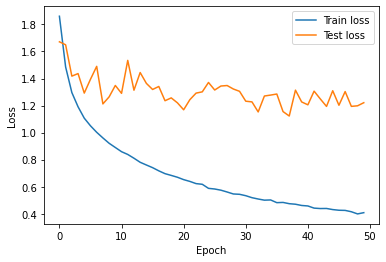

In [41]:
# loss, accuracy 추이 확인 with plt.plot

plt.plot(range(num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()





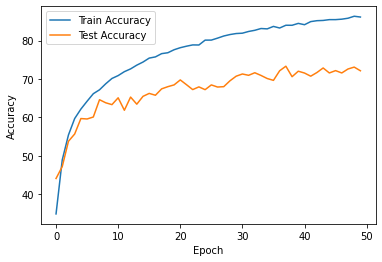

In [42]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()